# Adding all relevant imports and tables


In [980]:
import pandas as pd
import matplotlib.pyplot as plt

In [981]:
url = "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=drive_link" # products.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)

url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing" # orderlines.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)

url = "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=drive_link" # products.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)

url = "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=drive_link" # brands.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)


# Changing date types to Datetime

In [982]:
orders.created_date = pd.to_datetime(orders['created_date'])
orderlines.date = pd.to_datetime(orderlines['date'])

# Cleaning Products Table



Deleting of duplicate rows & missing values in 'price'

In [983]:
products.info()                # Check: how many rows in the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [984]:
products_cl = products.copy()
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [985]:
products_cl.duplicated().sum()          # Check: how many duplicated rows in the table


8746

In [986]:
products_cl.drop_duplicates(inplace = True)           # Drop duplicated rows
products_cl.duplicated().sum()                        # Check: how many duplicated rows

0

In [987]:
products_cl.info()                  # Check: how many rows in the table?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10580 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10580 non-null  object
 1   name         10580 non-null  object
 2   desc         10573 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10580 non-null  object
 5   in_stock     10580 non-null  int64 
 6   type         10530 non-null  object
dtypes: int64(1), object(6)
memory usage: 661.2+ KB


In [988]:
products_cl.price.isna().value_counts(normalize=True)*100          # Check: percentage of missing values in 'price'

False   99.57
True     0.43
Name: price, dtype: float64

In [989]:
products_cl = products_cl.loc[~products_cl.price.isna(), :]               # Delete rows with missing values in price
products_cl.info()                                                        # Check: how many rows in the table?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10534 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10534 non-null  object
 1   name         10534 non-null  object
 2   desc         10527 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10534 non-null  object
 5   in_stock     10534 non-null  int64 
 6   type         10484 non-null  object
dtypes: int64(1), object(6)
memory usage: 658.4+ KB


Issues with 'price'

In [990]:
problems_number_products = products_cl.loc[(products_cl.price.str.contains("\d+\.\d+\.\d+")) | (products_cl.price.str.contains("\d+\.\d{3,}")), :].shape[0]           # Check: how many cells contain prices with two dots & 3 decimals
problems_number_products

542

In [991]:
products_cl = products_cl.loc[(~products_cl.price.astype(str).str.contains("\d+\.\d+\.\d+")) & (~products_cl.price.astype(str).str.contains("\d+\.\d{3,}")),:]          # Delete cels with two dots & three decimals
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          9992 non-null   object
 1   name         9992 non-null   object
 2   desc         9986 non-null   object
 3   price        9992 non-null   object
 4   promo_price  9992 non-null   object
 5   in_stock     9992 non-null   int64 
 6   type         9946 non-null   object
dtypes: int64(1), object(6)
memory usage: 624.5+ KB


In [992]:
products_cl.price = pd.to_numeric(products_cl.price)                # Convert price to float
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          9992 non-null   object 
 1   name         9992 non-null   object 
 2   desc         9986 non-null   object 
 3   price        9992 non-null   float64
 4   promo_price  9992 non-null   object 
 5   in_stock     9992 non-null   int64  
 6   type         9946 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 624.5+ KB


In [993]:
print(len(products_cl))
print(products_cl['sku'].str.len())


9992
0        7
1        7
2        7
3        7
4        7
        ..
19321    7
19322    7
19323    7
19324    7
19325    7
Name: sku, Length: 9992, dtype: int64


In [994]:
products_cl["short_brand"] = products_cl["sku"].str[:3]
products_cl

sku                                           name  \
0      RAI0007              Silver Rain Design mStand Support   
1      APP0023              Apple Mac Keyboard Keypad Spanish   
2      APP0025               Mighty Mouse Apple Mouse for Mac   
3      APP0072  Apple Dock to USB Cable iPhone and iPod white   
4      KIN0007    Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM   
...        ...                                            ...   
19321  BEL0376        Belkin Travel Support Apple Watch Black   
19322  THU0060   Enroute Thule 14L Backpack MacBook 13 "Black   
19323  THU0061    Enroute Thule 14L Backpack MacBook 13 "Blue   
19324  THU0062     Enroute Thule 14L Backpack MacBook 13 "Red   
19325  THU0063   Enroute Thule 14L Backpack MacBook 13 "Green   

                                                    desc  price promo_price  \
0           Aluminum support compatible with all MacBook  59.99     499.899   
1              USB ultrathin keyboard Apple Mac Spanish.  59.00     589.996   
2                                 mouse Apple USB cable.  59.00     569.898   
3                  IPhone dock and USB Cable Apple iPod.  25.00     229.997   
4      2GB RAM Mac mini and iMac (2006/07) MacBook Pr...  34.99       31.99   
...                                                  ...    ...         ...   
19321  compact and portable stand vertically or horiz...  29.99     269.903   
19322  Backpack with capacity of 14 liter compartment...  69.95     649.903   
19323  Backpack with capacity of 14 liter compartment...  69.95     649.903   
19324  Backpack with capacity of 14 liter compartment...  69.95     649.903   
19325  Backpack with capacity of 14 liter compartment...  69.95     649.903   

       in_stock      type short_brand  
0             1      8696         RAI  
1             0  13855401         APP  
2             0      1387         APP  
3             0      1230         APP  
4             1      1364         KIN  
...         ...       ...         ...  
19321         1     12282         BEL  
19322         1      1392         THU  
19323         1      1392         THU  
19324         0      1392         THU  
19325         1      1392         THU  

[9992 rows x 8 columns]

# Cleaning Orderlines table

In [995]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.7+ MB


In [996]:
orderlines_cl = orderlines.copy()
orderlines_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.7+ MB


In [997]:
two_dot_order_ids_list = orderlines_cl.loc[orderlines_cl.unit_price.str.contains("\d+\.\d+\.\d+"), "id_order"]                        # Delete unit_price with two dots
orderlines_cl = orderlines_cl.loc[~orderlines_cl.id_order.isin(two_dot_order_ids_list)]

orderlines_cl.unit_price = pd.to_numeric(orderlines_cl.unit_price)                                                                              # Convert unit price to float
orderlines_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216250 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                216250 non-null  int64         
 1   id_order          216250 non-null  int64         
 2   product_id        216250 non-null  int64         
 3   product_quantity  216250 non-null  int64         
 4   sku               216250 non-null  object        
 5   unit_price        216250 non-null  float64       
 6   date              216250 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 13.2+ MB


In [998]:
# orderlines_cl = orderlines_cl.rename(columns={'id_order': 'order_id'})

# Cleaning Orders table

In [999]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [1000]:
orders_cl = orders.copy()
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [1001]:
orders_cl = orders_cl.loc[~orders_cl.total_paid.isna(), :]                  # Delete rows with NaNs in total_paid
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226904 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226904 non-null  int64         
 1   created_date  226904 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226904 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 8.7+ MB


In [1002]:
orders_cl.nunique()

order_id        226904
created_date    224823
total_paid       31236
state                5
dtype: int64

In [1003]:
orders_cl.state.value_counts()

Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14374
Cancelled            7233
Name: state, dtype: int64

In [1004]:
orders_cl = orders_cl.loc[~((orders_cl.state == 'Shopping Basket') | (orders_cl.state == 'Cancelled') | (orders_cl.state == 'Pending') | (orders_cl.state == 'Place Order'))]
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      46605 non-null  int64         
 1   created_date  46605 non-null  datetime64[ns]
 2   total_paid    46605 non-null  float64       
 3   state         46605 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.8+ MB


# Cleaning Brands table

In [1005]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [1006]:
brands_cl = brands.copy()
brands_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


# Data Quality

In [1007]:
# Define Pandas display format
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_rows", 1000)

In [1008]:
# Exclude unwanted orders (only completed orders)
actual_purchases_df = orders_cl.copy()
actual_purchases_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      46605 non-null  int64         
 1   created_date  46605 non-null  datetime64[ns]
 2   total_paid    46605 non-null  float64       
 3   state         46605 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.8+ MB


In [1009]:
# List of order_ids that are Completed
actual_purchases_list = list(actual_purchases_df["order_id"].unique())


In [1010]:
# Delete id_orders in orderlines_cl which are not in Completed orders
orderlines_cl.loc[~ orderlines_cl.id_order.isin(actual_purchases_list)]
orders_qu = orders_cl.loc[orders_cl["order_id"].isin(actual_purchases_df["order_id"]), :].copy()

In [1011]:
# Delete orders_id in orders_cl which are not in Completed orders
orderlines_qu = orderlines_cl.loc[orderlines_cl["id_order"].isin(actual_purchases_list), :].copy()

In [1012]:
len(orders_qu.order_id.unique())

46605

In [1013]:
len(orderlines_qu.id_order.unique())
# --> in orders_qu are more unique order_ids than id_orders in irderlines_qu --> delete them!

43064

In [1014]:
#How many order_ids are in orders_qu, that are not in the orderlines_qu
orders_qu.loc[~orders_qu.order_id.isin(orderlines_qu.id_order.unique())]

order_id        created_date  total_paid      state
8         245941 2017-01-01 10:32:23      183.52  Completed
31        257847 2017-11-23 23:46:54     1367.11  Completed
35        258985 2017-07-31 12:52:38     2264.60  Completed
40        259668 2017-10-06 22:06:58     1132.33  Completed
46        262016 2017-08-18 01:05:38     3109.57  Completed
...          ...                 ...         ...        ...
225865    526357 2018-03-13 12:01:26     1405.99  Completed
225887    526380 2018-03-13 12:16:06     1436.99  Completed
226012    526505 2018-03-13 15:56:14     1421.99  Completed
226014    526507 2018-03-13 16:04:20     1137.97  Completed
226155    526648 2018-03-13 21:07:19     1205.99  Completed

[3541 rows x 4 columns]

In [1015]:
#How many id_orders are in orderlines_qu, that are not in the orders_qu
orderlines_qu.loc[~orderlines_qu.id_order.isin(orders_qu.order_id.unique())]

Empty DataFrame
Columns: [id, id_order, product_id, product_quantity, sku, unit_price, date]
Index: []

In [1016]:
# Merge orders_qu & orderlines_qu to get the order_ids that are in both dfs
orders_lines_merged_df = orders_qu.merge(orderlines_qu, how="inner", left_on="order_id", right_on="id_order")
orders_lines_merged_df.head(5)
orders_lines_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56714 entries, 0 to 56713
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          56714 non-null  int64         
 1   created_date      56714 non-null  datetime64[ns]
 2   total_paid        56714 non-null  float64       
 3   state             56714 non-null  object        
 4   id                56714 non-null  int64         
 5   id_order          56714 non-null  int64         
 6   product_id        56714 non-null  int64         
 7   product_quantity  56714 non-null  int64         
 8   sku               56714 non-null  object        
 9   unit_price        56714 non-null  float64       
 10  date              56714 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(5), object(2)
memory usage: 5.2+ MB


In [1017]:
# List theese ids
o_ids_in_both_list = list(orders_lines_merged_df["order_id"].unique())

In [1018]:
# Delete them
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(o_ids_in_both_list), :]
orderlines_qu = orderlines_qu.loc[orderlines_cl["id_order"].isin(o_ids_in_both_list), :]

In [1019]:
#Check
len(orders_qu["order_id"].unique()), len(orderlines_qu["id_order"].unique())

(43064, 43064)

In [1020]:
# Exclude orders with unknown products
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 19325
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          9992 non-null   object 
 1   name         9992 non-null   object 
 2   desc         9986 non-null   object 
 3   price        9992 non-null   float64
 4   promo_price  9992 non-null   object 
 5   in_stock     9992 non-null   int64  
 6   type         9946 non-null   object 
 7   short_brand  9992 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 702.6+ KB


In [1021]:
#How many skus are in orderlines_qu that are not in products_qu
skus_to_remove = orderlines_qu[~orderlines_qu['sku'].isin(products_cl['sku'])]['sku'].unique().tolist()

In [1022]:
# Delete them in orders_qu
orders_qu = orders_qu[~orders_qu['order_id'].isin(orderlines_qu[orderlines_qu['sku'].isin(skus_to_remove)]['id_order'])]
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41701 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      41701 non-null  int64         
 1   created_date  41701 non-null  datetime64[ns]
 2   total_paid    41701 non-null  float64       
 3   state         41701 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [1023]:
# Delete them in orderlines_qu
orderlines_qu = orderlines_qu[~orderlines_qu['id_order'].isin(orderlines_qu[orderlines_qu['sku'].isin(skus_to_remove)]['id_order'])]
orderlines_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54324 entries, 7 to 293661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                54324 non-null  int64         
 1   id_order          54324 non-null  int64         
 2   product_id        54324 non-null  int64         
 3   product_quantity  54324 non-null  int64         
 4   sku               54324 non-null  object        
 5   unit_price        54324 non-null  float64       
 6   date              54324 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.3+ MB


In [1024]:
len(orders_qu["order_id"].unique()), len(orderlines_qu["id_order"].unique())

(41701, 41701)

# How many orders are there?
# How many products are there?
# What is the time period?

In [1025]:
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41701 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      41701 non-null  int64         
 1   created_date  41701 non-null  datetime64[ns]
 2   total_paid    41701 non-null  float64       
 3   state         41701 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [1026]:
orderlines_qu[["sku"]].nunique()

sku    5140
dtype: int64

In [1027]:
orders_qu["created_date"].min(), orders_qu["created_date"].max()

(Timestamp('2017-01-01 01:51:47'), Timestamp('2018-03-14 12:03:52'))

# Revenues + deleting outliers

In [1028]:
orderlines_qu_copy = orderlines_qu.copy()

In [1029]:
# Adding colum unit_price_total
orderlines_qu_copy["unit_price_total"] = orderlines_qu_copy["product_quantity"] * orderlines_qu_copy["unit_price"]
orderlines_qu_copy

id  id_order  product_id  product_quantity        sku  \
7       1119116    299545           0                 1    OWC0100   
8       1119119    299546           0                 1    IOT0014   
9       1119120    295347           0                 1    APP0700   
18      1119134    299556           0                 1  CRU0039-A   
24      1119145    299561           0                 1    PEB0015   
...         ...       ...         ...               ...        ...   
293599  1649474    525664           0                 1    TUC0207   
293616  1649512    527070           0                 2    APP0698   
293621  1649522    527074           0                 2    APP0698   
293644  1649565    527096           0                 3    APP0698   
293661  1649593    527112           0                 1    APP0698   

        unit_price                date  unit_price_total  
7            47.49 2017-01-01 01:46:16             47.49  
8            18.99 2017-01-01 01:50:34             18.99  
9            72.19 2017-01-01 01:54:11             72.19  
18           60.90 2017-01-01 02:20:14             60.90  
24          142.49 2017-01-01 02:38:50            142.49  
...            ...                 ...               ...  
293599       16.52 2018-03-14 11:45:05             16.52  
293616        9.99 2018-03-14 11:49:01             19.98  
293621        9.99 2018-03-14 11:49:36             19.98  
293644        9.99 2018-03-14 11:54:35             29.97  
293661        9.99 2018-03-14 11:58:13              9.99  

[54324 rows x 8 columns]

In [1030]:
# Group by order_ids
orderlines_qu_group_order_df = orderlines_qu_copy.groupby("id_order", as_index=False)["unit_price_total"].sum()
orderlines_qu_group_order_df

id_order  unit_price_total
0        241423            129.16
1        242832             10.77
2        243330             77.99
3        245275            149.00
4        245595            105.98
...         ...               ...
41696    527042             13.99
41697    527070             19.98
41698    527074             19.98
41699    527096             29.97
41700    527112              9.99

[41701 rows x 2 columns]

In [1031]:
#Avergae difference between total_paid and unit_price_total
orders_qu_copy = orders_qu.copy()

In [1032]:
diff_df = orders_qu_copy.merge(orderlines_qu_group_order_df,
                               how = 'inner',
                               left_on="order_id",
                               right_on="id_order"
                               )

diff_df

order_id        created_date  total_paid      state  id_order  \
0        241423 2017-11-06 13:10:02      136.15  Completed    241423   
1        242832 2017-12-31 17:40:03       15.76  Completed    242832   
2        243330 2017-02-16 10:59:38       84.98  Completed    243330   
3        245275 2017-06-28 11:35:37      149.00  Completed    245275   
4        245595 2017-01-21 12:52:47      112.97  Completed    245595   
...         ...                 ...         ...        ...       ...   
41696    527042 2018-03-14 11:47:50       18.98  Completed    527042   
41697    527070 2018-03-14 11:50:48       24.97  Completed    527070   
41698    527074 2018-03-14 11:51:42       24.97  Completed    527074   
41699    527096 2018-03-14 11:58:40       34.96  Completed    527096   
41700    527112 2018-03-14 12:03:52       14.98  Completed    527112   

       unit_price_total  
0                129.16  
1                 10.77  
2                 77.99  
3                149.00  
4                105.98  
...                 ...  
41696             13.99  
41697             19.98  
41698             19.98  
41699             29.97  
41700              9.99  

[41701 rows x 6 columns]

In [1033]:
# Add column with difference
diff_df["difference"] = diff_df["total_paid"] - diff_df["unit_price_total"]
diff_df.head()

order_id        created_date  total_paid      state  id_order  \
0    241423 2017-11-06 13:10:02      136.15  Completed    241423   
1    242832 2017-12-31 17:40:03       15.76  Completed    242832   
2    243330 2017-02-16 10:59:38       84.98  Completed    243330   
3    245275 2017-06-28 11:35:37      149.00  Completed    245275   
4    245595 2017-01-21 12:52:47      112.97  Completed    245595   

   unit_price_total  difference  
0            129.16        6.99  
1             10.77        4.99  
2             77.99        6.99  
3            149.00        0.00  
4            105.98        6.99

In [1034]:
# Avg. difference
diff_df.difference.mean().round(2)

4.47

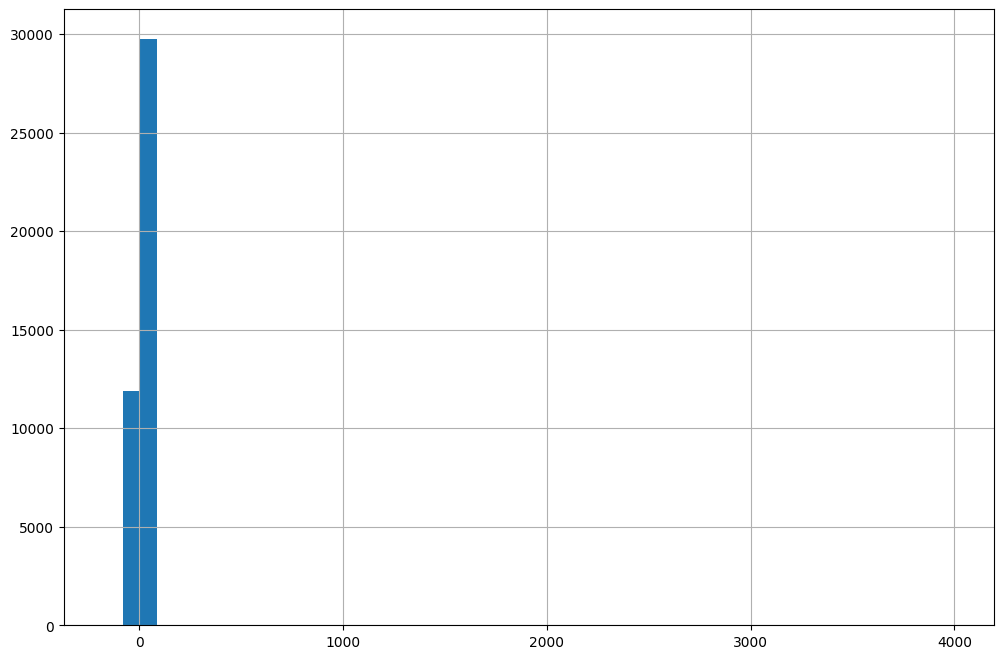

In [1035]:
# Distribution of these differences
diff_df.difference.hist(bins= 50, figsize=(12,8));

In [1036]:
# Looking at outliers etc.
diff_df.difference.describe()

count   41701.00
mean        4.47
std        26.05
min      -165.00
25%         0.00
50%         4.99
75%         6.99
max      3984.99
Name: difference, dtype: float64

In [1037]:
# Delete outliers
# calculate the quartiles
Q1 = diff_df["difference"].quantile(0.25)
Q3 = diff_df["difference"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
diff_no_outliers_df = diff_df.loc[(diff_df["difference"] >= (Q1 - 1.5*IQR)) & (diff_df["difference"] <= (Q3 + 1.5*IQR))]
diff_no_outliers_df

order_id        created_date  total_paid      state  id_order  \
0        241423 2017-11-06 13:10:02      136.15  Completed    241423   
1        242832 2017-12-31 17:40:03       15.76  Completed    242832   
2        243330 2017-02-16 10:59:38       84.98  Completed    243330   
3        245275 2017-06-28 11:35:37      149.00  Completed    245275   
4        245595 2017-01-21 12:52:47      112.97  Completed    245595   
...         ...                 ...         ...        ...       ...   
41696    527042 2018-03-14 11:47:50       18.98  Completed    527042   
41697    527070 2018-03-14 11:50:48       24.97  Completed    527070   
41698    527074 2018-03-14 11:51:42       24.97  Completed    527074   
41699    527096 2018-03-14 11:58:40       34.96  Completed    527096   
41700    527112 2018-03-14 12:03:52       14.98  Completed    527112   

       unit_price_total  difference  
0                129.16        6.99  
1                 10.77        4.99  
2                 77.99        6.99  
3                149.00        0.00  
4                105.98        6.99  
...                 ...         ...  
41696             13.99        4.99  
41697             19.98        4.99  
41698             19.98        4.99  
41699             29.97        4.99  
41700              9.99        4.99  

[40985 rows x 7 columns]

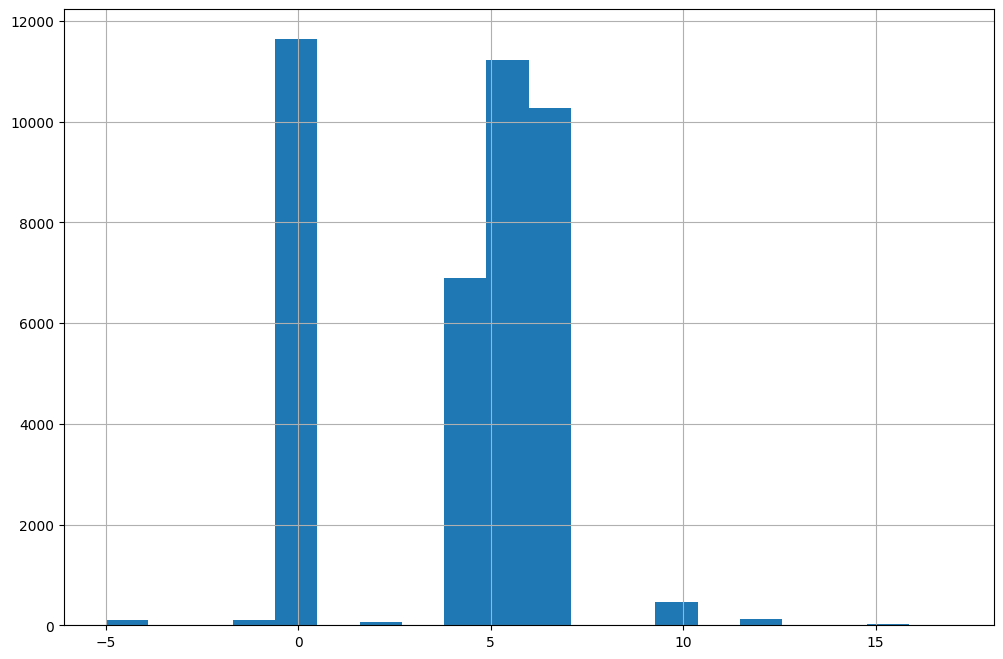

In [1038]:
diff_no_outliers_df.difference.hist(bins= 20, figsize=(12,8));

In [1039]:
# Delete outliers from orders_qu and orderlines_qu
normal_diff_list = list(diff_no_outliers_df["order_id"].unique())

orders_qu = orders_qu.loc[orders_qu["order_id"].isin(normal_diff_list), :]
orderlines_qu = orderlines_qu.loc[orderlines_cl["id_order"].isin(normal_diff_list), :]

In [1040]:
len(orders_qu["order_id"].unique()), len(orderlines_qu["id_order"].unique())

(40985, 40985)

# How should products be classified into different categories to simplify reports and analysis?

In [1041]:
# per brand?

# What is the distribution of product prices across different categories?

# What are the most sold products?

In [1042]:
orderlines_qu.groupby("sku")[["product_quantity"]].sum().sort_values(by="product_quantity", ascending=False).head(10)

product_quantity
sku                      
APP1190               955
APP0698               820
APP1922               537
APP0927               489
WDT0183               476
SAM0074               329
CRU0051               328
APP2446               270
NTE0013               252
CRU0050               248

# What are the products that generate the most revenue?

In [1043]:
orderlines_qu_copy.groupby("sku")[["unit_price_total"]].sum().sort_values(by="unit_price_total", ascending=False).head(10)

unit_price_total
sku                      
LGE0044         136270.35
APP2446         104560.64
APP1922          89419.24
APP2477          86624.52
APP1970          81608.03
APP2072          75764.89
APP2485          73678.87
WDT0183          66040.91
APP2483          60824.79
APP2479          53648.41

# How big are the offered discounts as a percentage of the product prices

In [1044]:
orderlines_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 7 to 293661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.2+ MB


In [1045]:
# Merge orderlines_qu and products_cl
ol_p= orderlines_qu.merge(
    products_cl,
    on="sku",
    how="inner"
)
ol_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 0 to 53230
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   name              53231 non-null  object        
 8   desc              53228 non-null  object        
 9   price             53231 non-null  float64       
 10  promo_price       53231 non-null  object        
 11  in_stock          53231 non-null  int64         
 12  type              53220 non-null  object        
 13  short_brand       53231 non-null  object        
dtypes: datetime64[ns](1), 

In [1046]:
# Add a column Discount
ol_p["Discount"] = (ol_p["price"] - ol_p["unit_price"]).round()
ol_p.head()

id  id_order  product_id  product_quantity      sku  unit_price  \
0  1119116    299545           0                 1  OWC0100       47.49   
1  1120182    299404           0                 1  OWC0100       47.49   
2  1121550    300650           0                 1  OWC0100       49.99   
3  1121801    300760           0                 1  OWC0100       49.99   
4  1124334    301975           0                 1  OWC0100       49.99   

                 date                                               name  \
0 2017-01-01 01:46:16  OWC In-line Digital Temperature Sensor Kit HDD...   
1 2017-01-01 22:50:39  OWC In-line Digital Temperature Sensor Kit HDD...   
2 2017-01-02 15:31:09  OWC In-line Digital Temperature Sensor Kit HDD...   
3 2017-01-02 17:20:31  OWC In-line Digital Temperature Sensor Kit HDD...   
4 2017-01-03 20:04:54  OWC In-line Digital Temperature Sensor Kit HDD...   

                                                desc  price promo_price  \
0  Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
1  Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
2  Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
3  Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
4  Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   

   in_stock      type short_brand  Discount  
0         1  12755395         OWC     14.00  
1         1  12755395         OWC     14.00  
2         1  12755395         OWC     11.00  
3         1  12755395         OWC     11.00  
4         1  12755395         OWC     11.00

In [1047]:
# Add a column Discount_%
ol_p["Discount_%"] = (ol_p["Discount"] * 100 / ol_p["price"]).round()
ol_p.head(30)

id  id_order  product_id  product_quantity      sku  unit_price  \
0   1119116    299545           0                 1  OWC0100       47.49   
1   1120182    299404           0                 1  OWC0100       47.49   
2   1121550    300650           0                 1  OWC0100       49.99   
3   1121801    300760           0                 1  OWC0100       49.99   
4   1124334    301975           0                 1  OWC0100       49.99   
5   1129468    302293           0                 5  OWC0100       49.99   
6   1132204    303599           0                 1  OWC0100       49.99   
7   1134856    296253           0                 1  OWC0100       49.99   
8   1137101    305687           0                 1  OWC0100       49.99   
9   1142486    307908           0                 1  OWC0100       49.99   
10  1149159    310777           0                 1  OWC0100       49.99   
11  1150016    311130           0                 2  OWC0100       49.99   
12  1151661    311748           0                 1  OWC0100       49.99   
13  1153322    312438           0                 1  OWC0100       49.99   
14  1155020    313155           0                 1  OWC0100       49.99   
15  1156602    313791           0                 1  OWC0100       49.99   
16  1157428    313937           0                 1  OWC0100       49.99   
17  1160984    315605           0                 1  OWC0100       49.99   
18  1163354    316667           0                 1  OWC0100       49.99   
19  1165689    317548           0                 1  OWC0100       47.49   
20  1165911    317637           0                 1  OWC0100       47.49   
21  1167818    318332           0                 1  OWC0100       47.49   
22  1170962    319772           0                 1  OWC0100       49.99   
23  1171308    319924           0                 1  OWC0100       49.99   
24  1177846    322986           0                 1  OWC0100       49.99   
25  1178696    323402           0                 1  OWC0100       47.49   
26  1180706    324190           0                 1  OWC0100       47.49   
27  1181638    324601           0                 1  OWC0100       49.99   
28  1184057    325637           0                 1  OWC0100       49.99   
29  1185403    326291           0                 1  OWC0100       41.31   

                  date                                               name  \
0  2017-01-01 01:46:16  OWC In-line Digital Temperature Sensor Kit HDD...   
1  2017-01-01 22:50:39  OWC In-line Digital Temperature Sensor Kit HDD...   
2  2017-01-02 15:31:09  OWC In-line Digital Temperature Sensor Kit HDD...   
3  2017-01-02 17:20:31  OWC In-line Digital Temperature Sensor Kit HDD...   
4  2017-01-03 20:04:54  OWC In-line Digital Temperature Sensor Kit HDD...   
5  2017-01-04 09:32:44  OWC In-line Digital Temperature Sensor Kit HDD...   
6  2017-01-06 13:20:43  OWC In-line Digital Temperature Sensor Kit HDD...   
7  2017-01-08 12:11:12  OWC In-line Digital Temperature Sensor Kit HDD...   
8  2017-01-09 13:18:35  OWC In-line Digital Temperature Sensor Kit HDD...   
9  2017-01-12 12:23:49  OWC In-line Digital Temperature Sensor Kit HDD...   
10 2017-01-17 02:39:03  OWC In-line Digital Temperature Sensor Kit HDD...   
11 2017-01-17 19:00:15  OWC In-line Digital Temperature Sensor Kit HDD...   
12 2017-01-18 18:29:39  OWC In-line Digital Temperature Sensor Kit HDD...   
13 2017-01-20 11:16:20  OWC In-line Digital Temperature Sensor Kit HDD...   
14 2017-01-22 11:18:20  OWC In-line Digital Temperature Sensor Kit HDD...   
15 2017-01-23 13:40:04  OWC In-line Digital Temperature Sensor Kit HDD...   
16 2017-01-23 23:38:12  OWC In-line Digital Temperature Sensor Kit HDD...   
17 2017-01-27 10:05:57  OWC In-line Digital Temperature Sensor Kit HDD...   
18 2017-01-29 14:54:51  OWC In-line Digital Temperature Sensor Kit HDD...   
19 2017-01-30 14:59:17  OWC In-line Digital Temperature Sensor Kit HDD...   
20 2017-01-30 17:05:07  OWC In-line

In [1048]:
# Which products have the biggest discount_%?
ol_p.groupby(["sku", "name"])[["Discount_%"]].mean().round().sort_values(by="Discount_%", ascending = False)

Discount_%
sku       name                                                          
MOP0108   Mophie Powerstation Mini Universal 4000mAh Batt...       90.00
MOP0107   Mophie Powerstation 4000mAh Battery Plus Mini U...       90.00
MOP0109   Mophie Powerstation Mini Universal 4000mAh Batt...       89.00
MOP0106   Mophie Powerstation 6000mAh battery Universal P...       89.00
MOP0105   Mophie Powerstation 6000mAh battery Universal P...       89.00
...                                                                  ...
REP0396   Full screen repair iPhone 7 Plus                        -40.00
PRY0008   Prynt White iPhone Case Portable Printer                -40.00
KIN0149-2 Mac memory Kingston 16GB (2x8GB) SO-DIMM DDR3åÊ...      -41.00
REP0301   battery repair iPhone 6 Plus                            -50.00
IFX0074   iFixit piece Earpiece Speaker iPhone 6                  -91.00

[5098 rows x 1 columns]

In [1049]:
#ol_p.groupby(["sku", "name"])[["Discount_%"]].mean().round().sort_values(by="Discount_%", ascending = False).query('Discount_% == -91.00')

# How many products are being discounted?

In [1050]:
ol_p.info()          # All?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 0 to 53230
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   name              53231 non-null  object        
 8   desc              53228 non-null  object        
 9   price             53231 non-null  float64       
 10  promo_price       53231 non-null  object        
 11  in_stock          53231 non-null  int64         
 12  type              53220 non-null  object        
 13  short_brand       53231 non-null  object        
 14  Discount          5323

In [1051]:
sum(ol_p.Discount > 0), sum(ol_p.Discount <= 0)

(49164, 4067)

49164 discounted products

In [1052]:
# ol_p.query("(Discount == 0) | Discount < 0").count()

In [1053]:
ol_p.Discount.describe()

count   53231.00
mean       26.12
std        45.54
min      -171.00
25%         5.00
50%        15.00
75%        31.00
max      1320.00
Name: Discount, dtype: float64

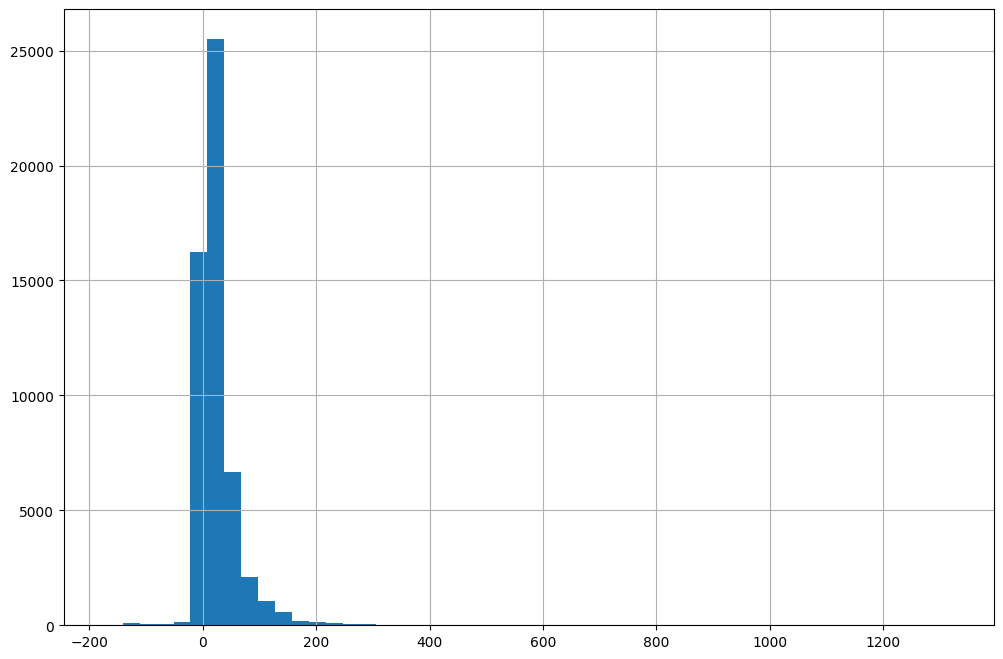

In [1054]:
ol_p.Discount.hist(bins= 50, figsize=(12,8));

#Deleting outliners
Discounts between 5 euros and 31 euros\
There's a rule of thumb, that anything:
+ lower than the 25% quartile - (1.5 x interquartile range), or
+ higher than the 75% quartile + (1.5 x interquartile range)

In [1055]:
# calculate the quartiles
Q1 = ol_p["Discount"].quantile(0.25)
Q3 = ol_p["Discount"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
ol_p_no_outliers_df = ol_p.loc[(ol_p["Discount"] >= (Q1 - 1.5*IQR)) & (ol_p["Discount"] <= (Q3 + 1.5*IQR))]

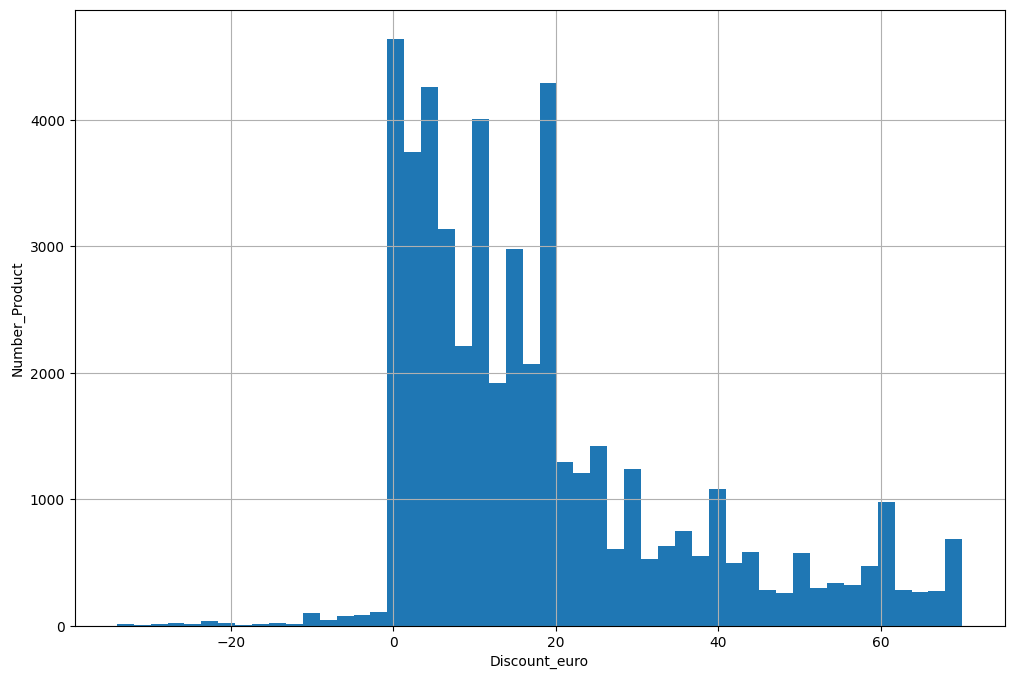

In [1056]:
ol_p_no_outliers_df.Discount.hist(bins= 50, figsize=(12,8))
plt.xlabel("Discount_euro")  # Ajouter un nom à l'axe x
plt.ylabel("Number_Product");  # Ajouter un nom à l'axe y;

In [1057]:
ol_p_no_outliers_df.Discount.describe()

count   49232.00
mean       18.32
std        17.60
min       -34.00
25%         5.00
50%        14.00
75%        25.00
max        70.00
Name: Discount, dtype: float64

In [1058]:
normal_ol_p_df = list(ol_p_no_outliers_df["sku"].unique())
orderlines_qu = orderlines_qu.loc[orderlines_qu["sku"].isin(normal_ol_p_df), :].copy()
new_order_id_list = list(orderlines_qu['id_order'].unique())
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(orderlines_qu["id_order"]), :].copy()

In [1059]:
len(orders_qu["order_id"].unique()), len(orderlines_qu["id_order"].unique())

(39404, 39404)

#

# How do seasonality and special dates (Christmas, Black Friday) affect sales?

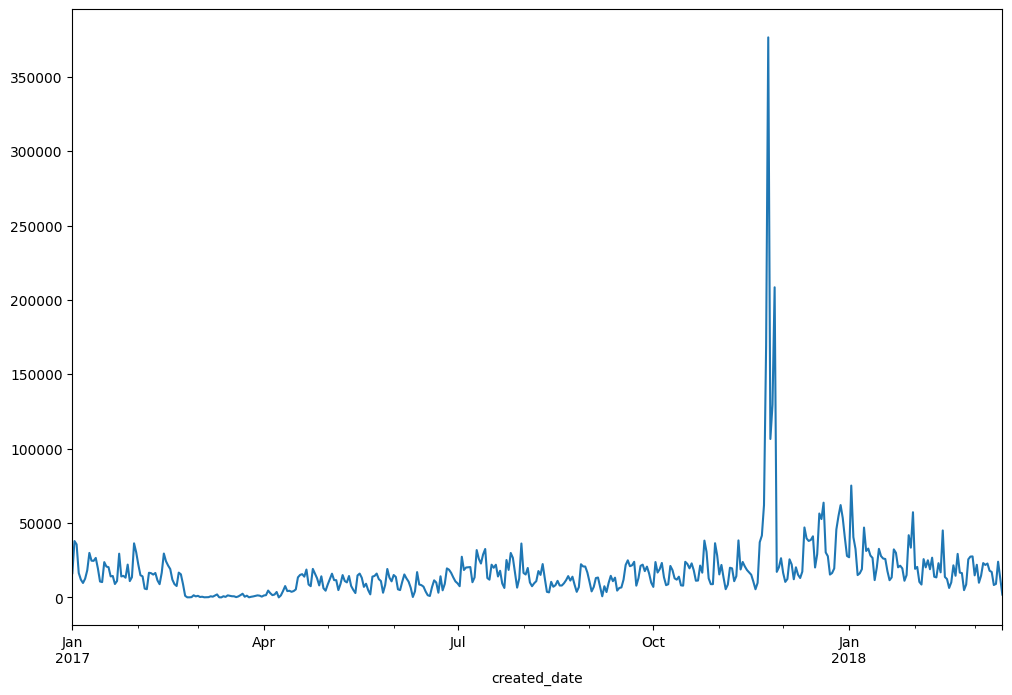

In [1060]:
# total_paid per day
(
    diff_no_outliers_df.resample("D", on="created_date")
    .sum()["unit_price_total"]
    .plot(figsize=(12, 8))
);

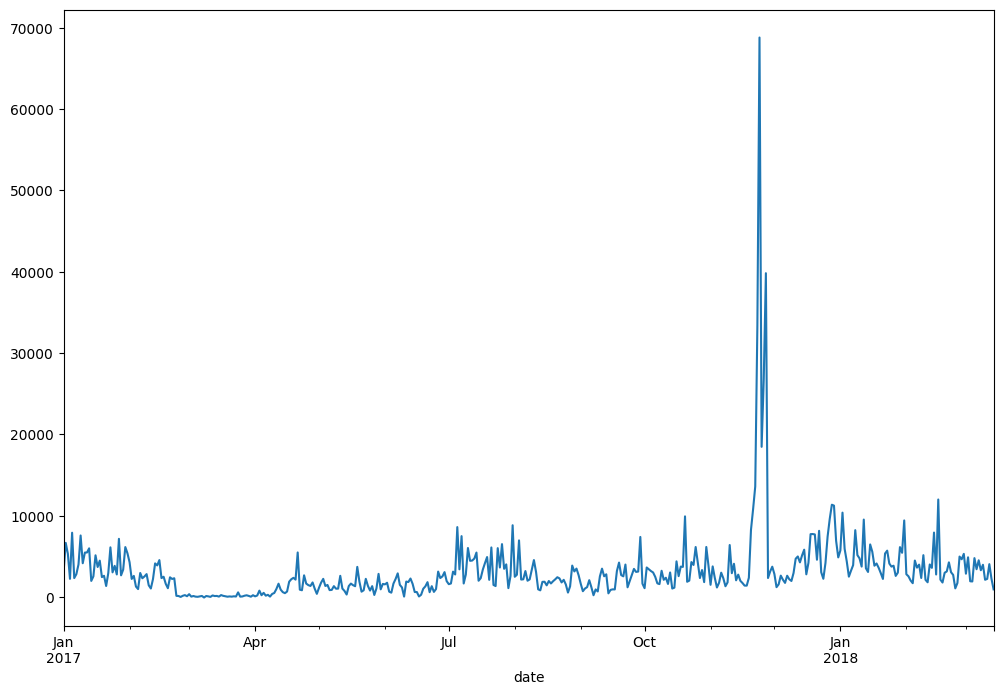

In [1061]:
 # Disocunt per day
(
    ol_p.resample("D", on="date")
    .sum()["Discount"]
    .plot(figsize=(12, 8))
);

In [1062]:
# Delete time frame around peek to have a closer look at rest of the year
start_date = pd.to_datetime('2017-11-10')
end_date = pd.to_datetime('2017-12-02')

# for orders_qu
filtered_data_o = orders_qu[(orders_qu["created_date"] < start_date) | (orders_qu["created_date"] > end_date)]
 # for diff_no_outliers_df
filtered_data_d = diff_no_outliers_df[(diff_no_outliers_df["created_date"] < start_date) | (diff_no_outliers_df["created_date"] > end_date)]
 # for ol_p
filtered_data_ol = ol_p[(ol_p["date"] < start_date) | (ol_p["date"] > end_date)]

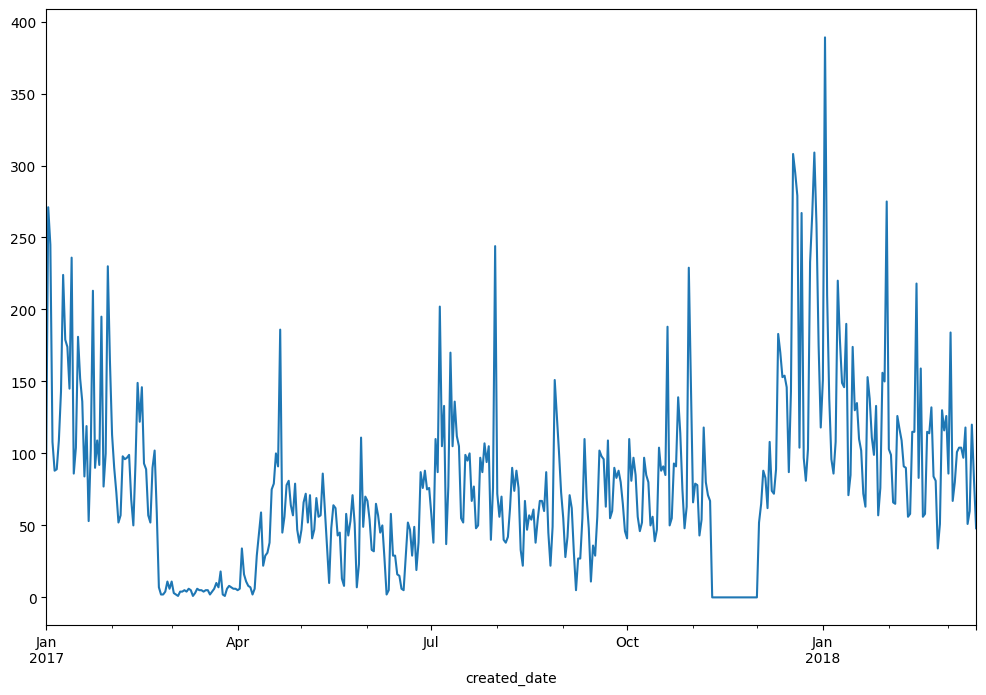

In [1063]:
(
    filtered_data_o.resample("D", on="created_date")
    .count()["order_id"]
    .plot(figsize=(12, 8))
);

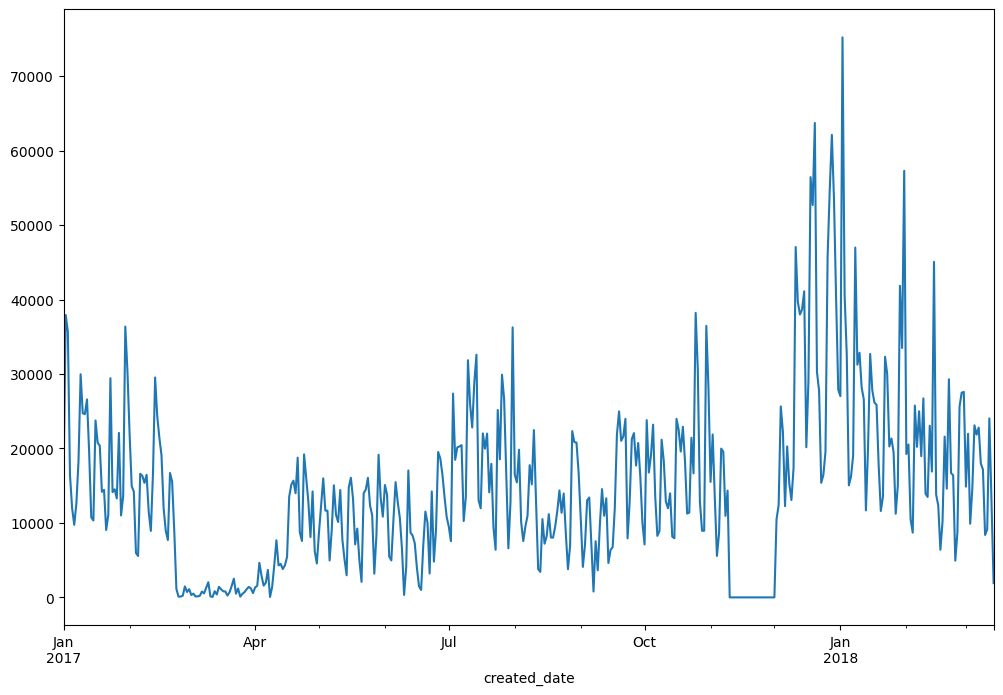

In [1064]:
(
    filtered_data_d.resample("D", on="created_date")
    .sum()["unit_price_total"]
    .plot(figsize=(12, 8))
);

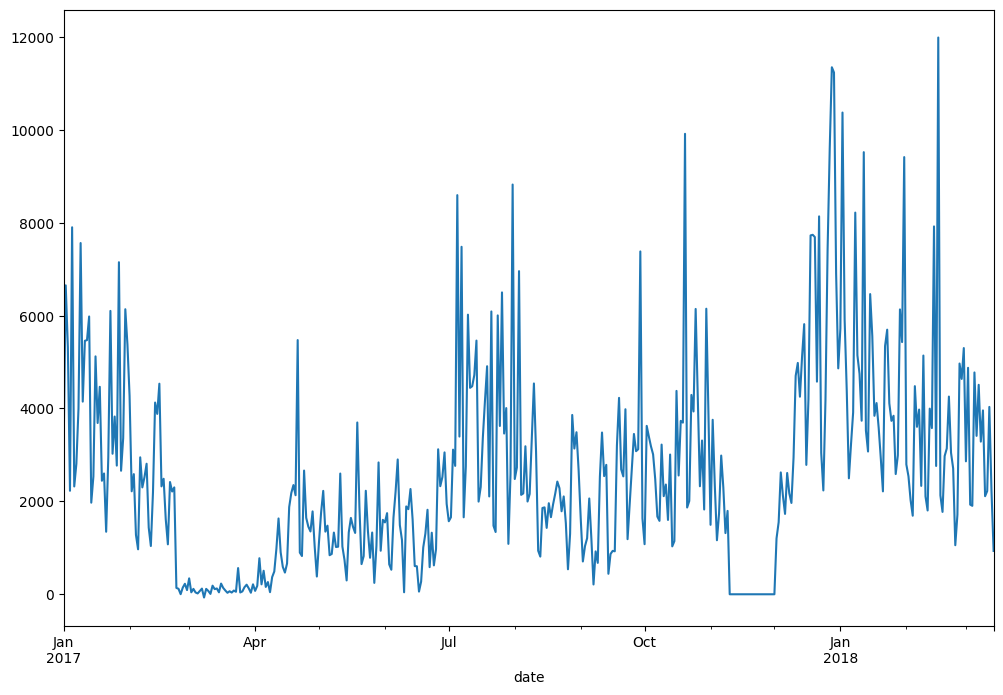

In [1065]:
(
    filtered_data_ol.resample("D", on="date")
    .sum()["Discount"]
    .plot(figsize=(12, 8))
);

# Other Graphs

<Axes: >

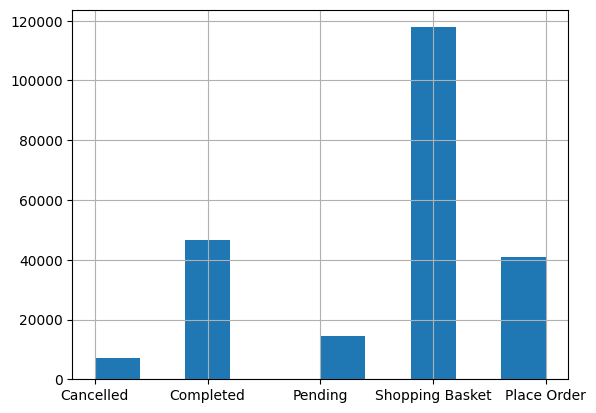

In [1066]:
orders.state.hist()

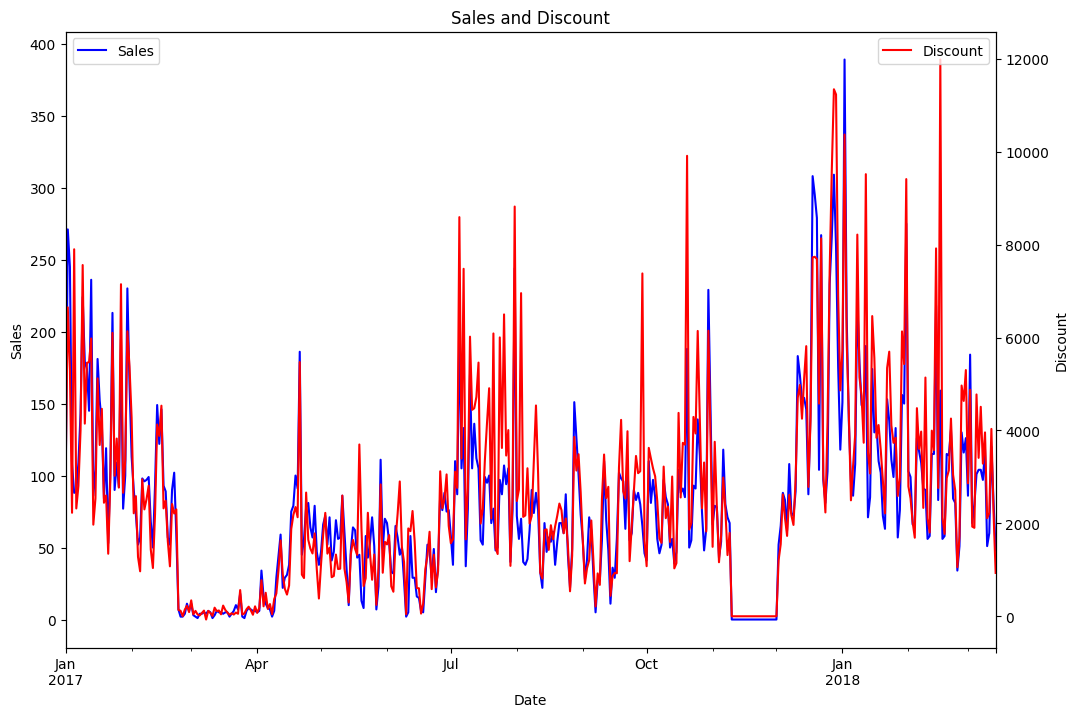

In [1067]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'filtered_data_o' and 'filtered_data_ol' are the filtered DataFrames
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting sales
filtered_data_o.resample("D", on="created_date").count()["order_id"].plot(
    kind='line', color='blue', label='Sales', ax=ax1
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales')

# Creating a second y-axis
ax2 = ax1.twinx()

# Plotting discounts
filtered_data_ol.resample("D", on="date").sum()["Discount"].plot(
    kind='line', color='red', label='Discount', ax=ax2
)
ax2.set_ylabel('Discount')

# Setting title and legends
plt.title('Sales and Discount')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


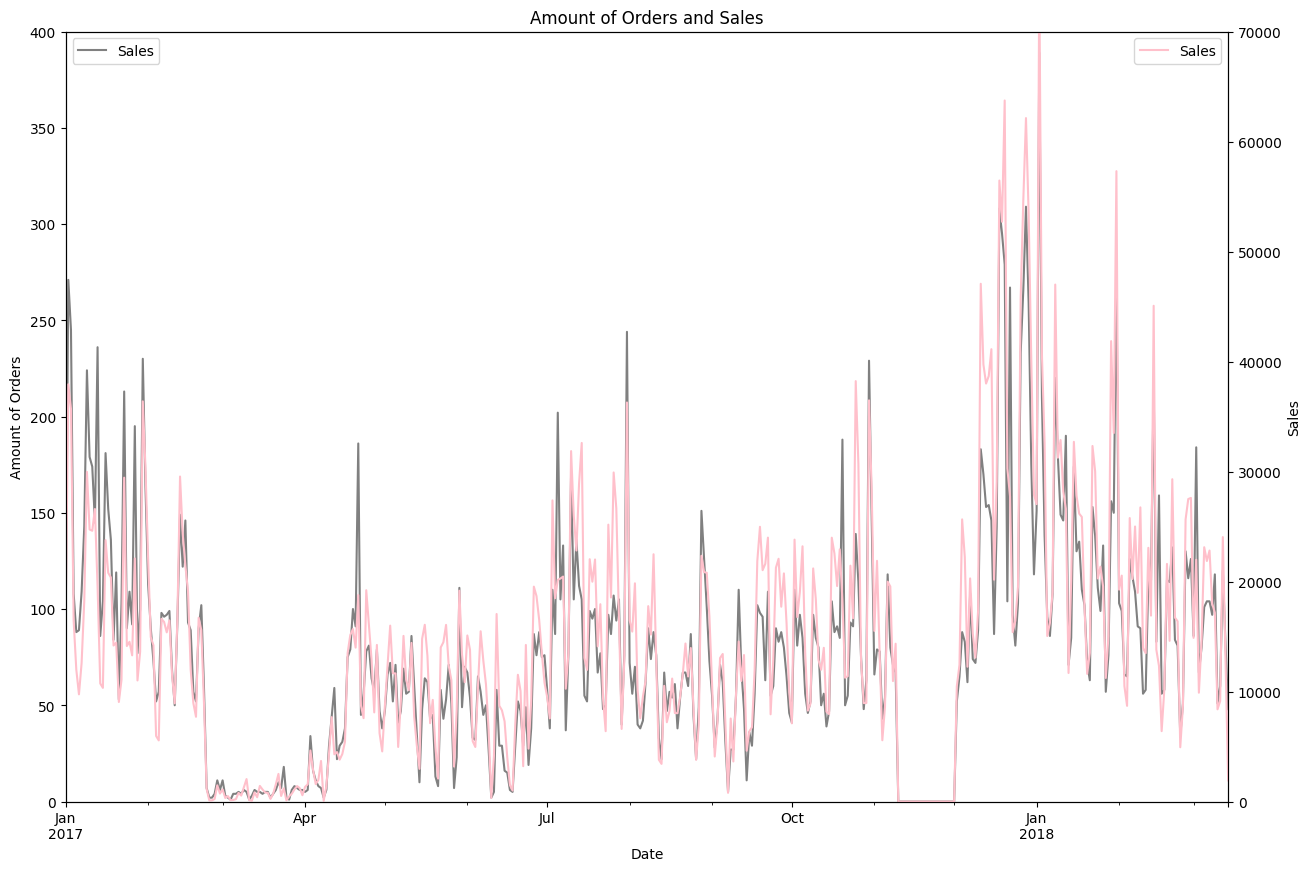

In [1068]:
fig, ax1 = plt.subplots(figsize=(15, 10))
filtered_data_o.resample("D", on="created_date").count()["order_id"].plot(
    kind='line', color='grey', label='Sales', ax=ax1
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Amount of Orders')
ax1.set_ylim([0, 400])  # Set the y-axis limit for sales

ax2 = ax1.twinx()
filtered_data_d.resample("D", on="created_date").sum()["unit_price_total"].plot(
    kind='line', color='pink', label='Sales', ax=ax2
)
ax2.set_ylabel('Sales')
ax2.set_ylim([0, 70000])  # Set the y-axis limit for discount

plt.title('Amount of Orders and Sales')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

#PROPER PLOTS

In [1069]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [1070]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#10 brands based on the amount of products sold.

In [1071]:
ol_df = orderlines_qu.copy()

In [1072]:
ol_df["short"] = ol_df["sku"].str[:3]

In [1073]:
ol_with_brands_df = ol_df.merge(brands,
                                how="left",
                                left_on="short",
                                right_on="short")
ol_with_brands_df.head(3)

id  id_order  product_id  product_quantity      sku  unit_price  \
0  1119116    299545           0                 1  OWC0100       47.49   
1  1119119    299546           0                 1  IOT0014       18.99   
2  1119120    295347           0                 1  APP0700       72.19   

                  date short    long  
0  2017-01-01 01:46:16   OWC     OWC  
1  2017-01-01 01:50:34   IOT  iOttie  
2  2017-01-01 01:54:11   APP   Apple

In [1074]:
brands_10_most_sold_df = (
                         ol_with_brands_df.groupby("long", as_index=False)
                         ["product_quantity"].sum()
                         .nlargest(10, "product_quantity")
                         )
brands_10_most_sold_df

long  product_quantity
5              Apple             11156
99               OWC              3857
161  Western Digital              2404
9             Belkin              2279
67             LaCie              2130
19           Crucial              2070
128          Satechi              1824
160            Wacom              1816
106             Pack              1710
91         NewerTech              1648

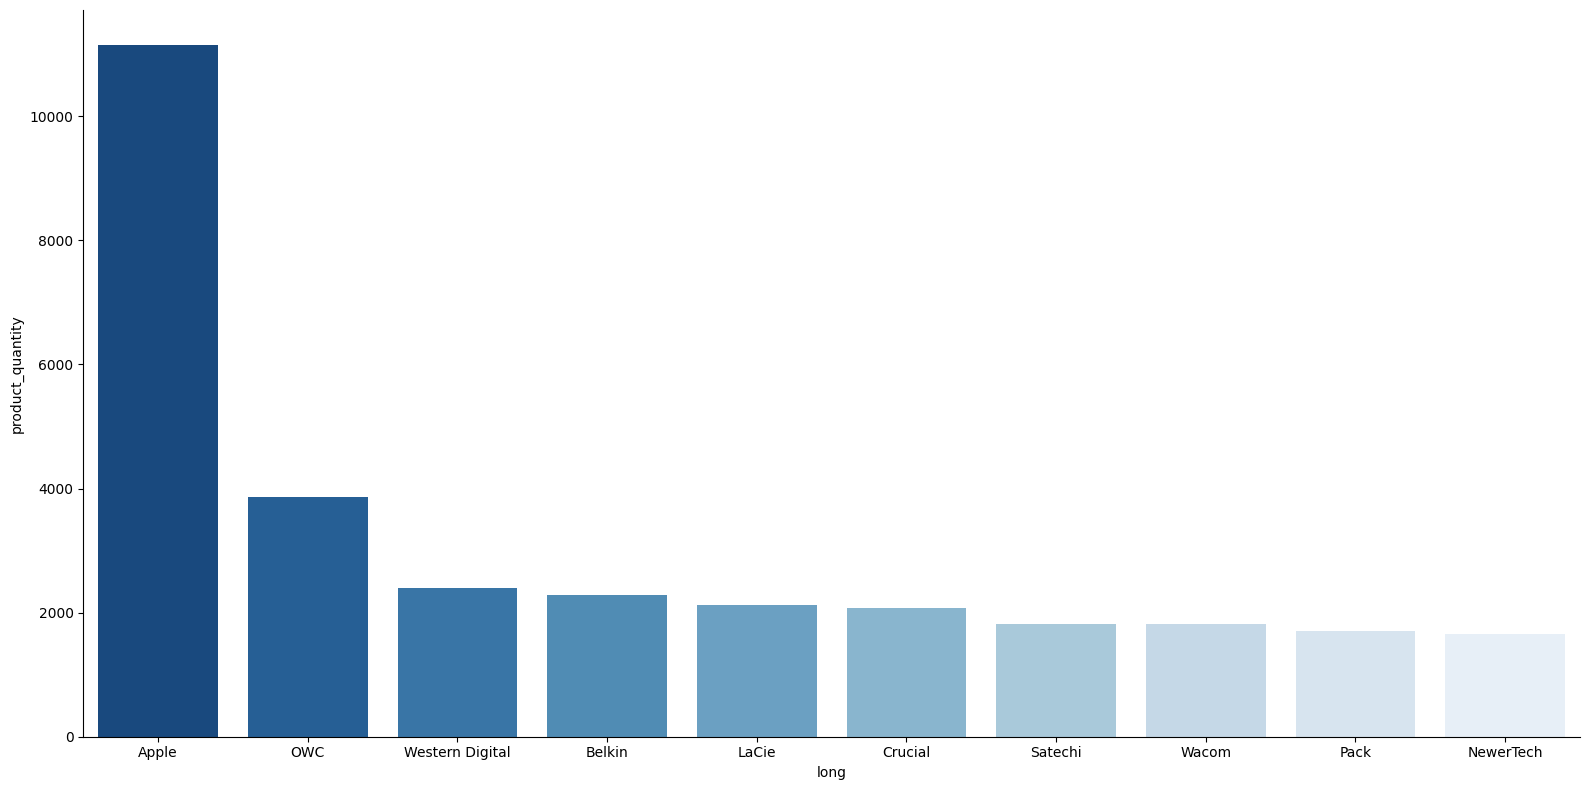

In [1075]:
sns.catplot(kind="bar",
            data=brands_10_most_sold_df,
            x="long",
            y="product_quantity",
            height=8,
            aspect=2,
            palette="Blues_r");

## Relationship between the recommended price for a product (products.price) and the price that products actually sold


In [1076]:
# your code here
ol_p_df = ol_df.merge(products_cl,
                               how = 'inner',
                               left_on="sku",
                               right_on="sku"
                               )

In [1077]:
ol_p_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53231 entries, 0 to 53230
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
 7   short             53231 non-null  object 
 8   name              53231 non-null  object 
 9   desc              53231 non-null  object 
 10  price             53231 non-null  float64
 11  in_stock          53231 non-null  int64  
 12  type              53220 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 5.7+ MB


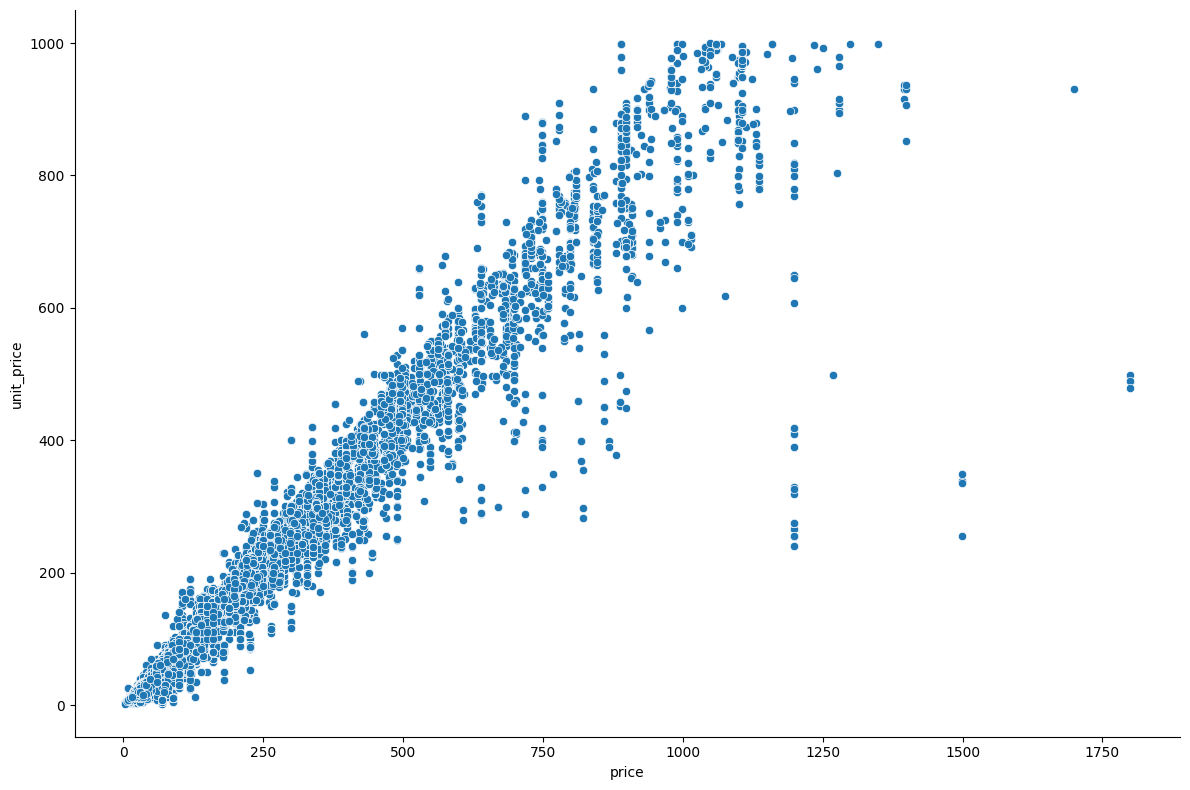

In [1078]:
sns.relplot(data=ol_p_df,
            x="price",
            y="unit_price",
            height=8,
            aspect=1.5,
            );

In [1079]:
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.5+ KB


In [1080]:
ol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
 7   short             53231 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 3.2+ MB


## average daily price of an order

In [1081]:
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      40985 non-null  int64  
 1   created_date  40985 non-null  object 
 2   total_paid    40985 non-null  float64
 3   state         40985 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [1082]:
#avg_total

In [1083]:
# your code here
orders_qu.created_date = pd.to_datetime(orders_qu['created_date'])

In [1084]:
avg_total = orders_qu.groupby(orders_qu['created_date'].dt.date)['total_paid'].mean().round(2)

In [1085]:
avg_total_df = avg_total.to_frame()

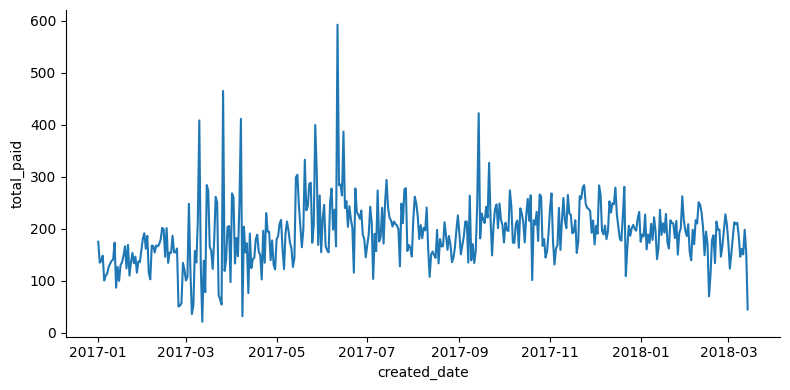

In [1086]:
sns.relplot(kind='line',
            data=avg_total_df,
             x='created_date',
             y='total_paid',
             height=4,
             aspect=2);

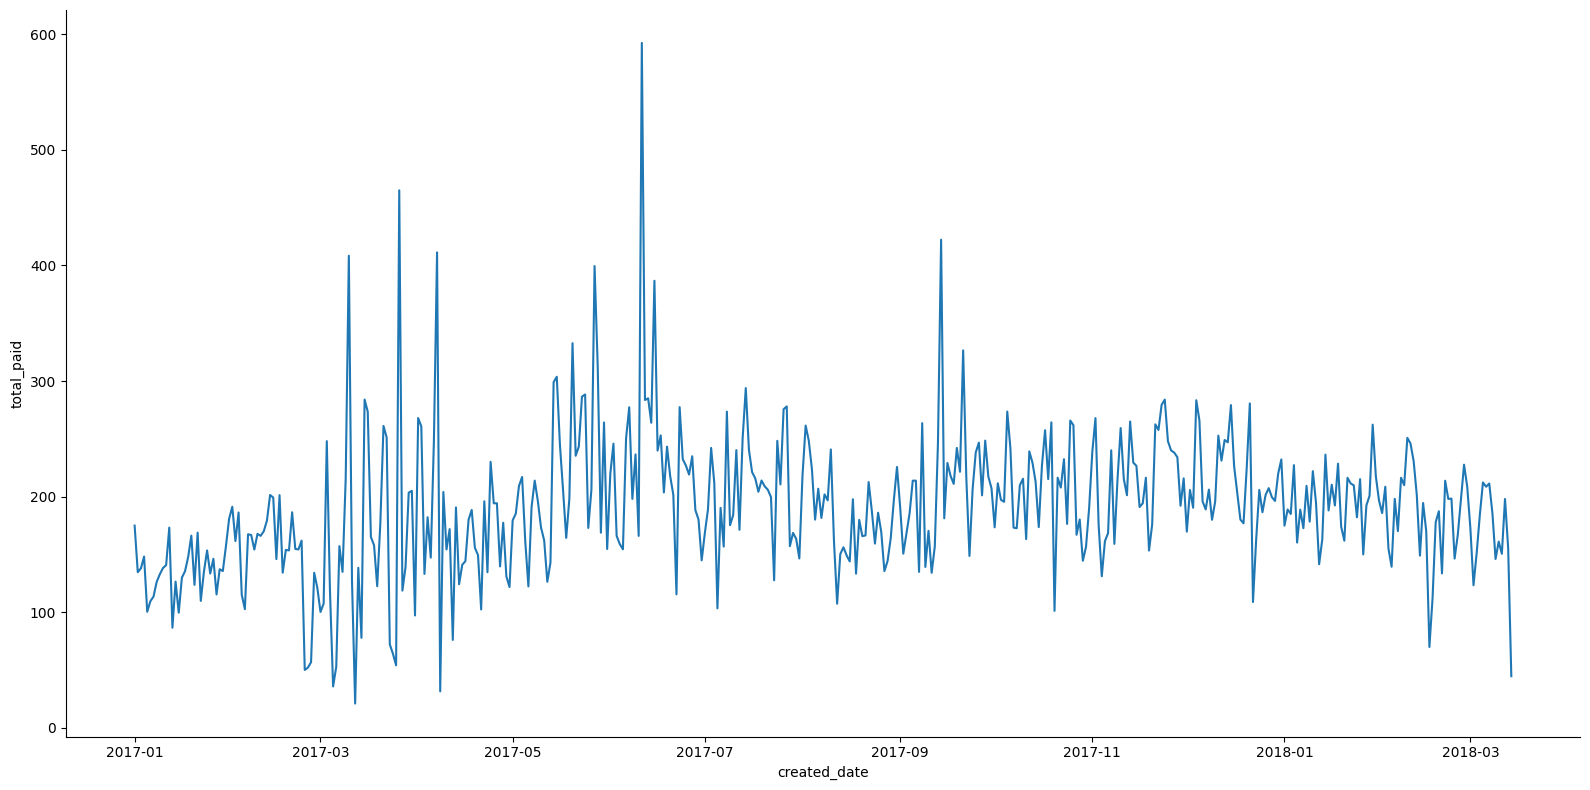

In [1087]:
# reponse tout collé

orders_qu.created_date = pd.to_datetime(orders_qu['created_date'])
avg_total = orders_qu.groupby(orders_qu['created_date'].dt.date)['total_paid'].mean().round(2)
avg_total_df = avg_total.to_frame()

sns.relplot(kind='line',
            data=avg_total_df,
             x='created_date',
             y='total_paid',
             height=8,
             aspect=2);

In [1088]:
# autre reponse

#orders_qu.created_date = pd.to_datetime(orders_qu.created_date) avg_d_p_o = orders_qu.resample("D", on="created_date")["total_paid"].mean()
#avg_d_p_o = pd.DataFrame(avg_d_p_o) sns.lineplot(data=avg_d_p_o, x="created_date", y="total_paid");

## top 10 products sold in January 2017 & the top 10 products sold in January 2018:

In [1089]:
ol_df

id  id_order  product_id  product_quantity        sku  unit_price  \
0      1119116    299545           0                 1    OWC0100       47.49   
1      1119119    299546           0                 1    IOT0014       18.99   
2      1119120    295347           0                 1    APP0700       72.19   
3      1119134    299556           0                 1  CRU0039-A       60.90   
4      1119145    299561           0                 1    PEB0015      142.49   
...        ...       ...         ...               ...        ...         ...   
53226  1649447    527035           0                 1    APP0698        9.99   
53227  1649512    527070           0                 2    APP0698        9.99   
53228  1649522    527074           0                 2    APP0698        9.99   
53229  1649565    527096           0                 3    APP0698        9.99   
53230  1649593    527112           0                 1    APP0698        9.99   

                      date short  
0      2017-01-01 01:46:16   OWC  
1      2017-01-01 01:50:34   IOT  
2      2017-01-01 01:54:11   APP  
3      2017-01-01 02:20:14   CRU  
4      2017-01-01 02:38:50   PEB  
...                    ...   ...  
53226  2018-03-14 11:42:41   APP  
53227  2018-03-14 11:49:01   APP  
53228  2018-03-14 11:49:36   APP  
53229  2018-03-14 11:54:35   APP  
53230  2018-03-14 11:58:13   APP  

[53231 rows x 8 columns]

In [1090]:
ol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
 7   short             53231 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 3.2+ MB


In [1091]:
# Change date to datetime Dtype
ol_df.date = pd.to_datetime(ol_df['date'])

In [1092]:
products_10_most_sold_jan17 = (
    ol_df.query('date.dt.year == 2017 and date.dt.month == 1')
    .groupby('sku', as_index=False)
    .agg({'date': 'first', 'product_quantity': 'sum'})
    .nlargest(10, 'product_quantity')
    [['date', 'sku', 'product_quantity']]
)
products_10_most_sold_jan17

date      sku  product_quantity
55   2017-01-01 18:25:21  APP0698               208
207  2017-01-13 08:37:40  BEL0198               138
560  2017-01-03 09:48:42  JAW0048               117
66   2017-01-01 21:10:46  APP0927               113
99   2017-01-02 23:46:35  APP1190                81
559  2017-01-05 08:38:52  JAW0040                62
702  2017-01-07 20:58:20  LEX0026                59
614  2017-01-10 12:51:41  KIN0072                53
1605 2017-01-02 13:27:43  WAC0171                51
487  2017-01-02 18:19:15  IFX0022                50

In [1093]:
products_10_most_sold_jan18 = (
    ol_df.query('date.dt.year == 2018 and date.dt.month == 1')
    .groupby('sku', as_index=False)
    .agg({'date': 'first', 'product_quantity': 'sum'})
    .nlargest(10, 'product_quantity')
    [['date', 'sku', 'product_quantity']]
)
products_10_most_sold_jan18

date      sku  product_quantity
1827 2018-01-01 22:30:01  ZAG0032               176
149  2018-01-01 13:33:13  APP1190               112
903  2018-01-01 13:54:23  MAT0010               103
1755 2018-01-02 10:39:17  WDT0183                89
366  2018-01-24 12:30:46  BEL0270                61
112  2018-01-01 17:29:45  APP0698                58
1545 2018-01-06 00:34:45  STA0016                56
1370 2018-01-01 17:50:32  SAM0074                50
401  2018-01-01 22:19:47  BEL0371                49
771  2018-01-23 22:09:13  KOO0007                42

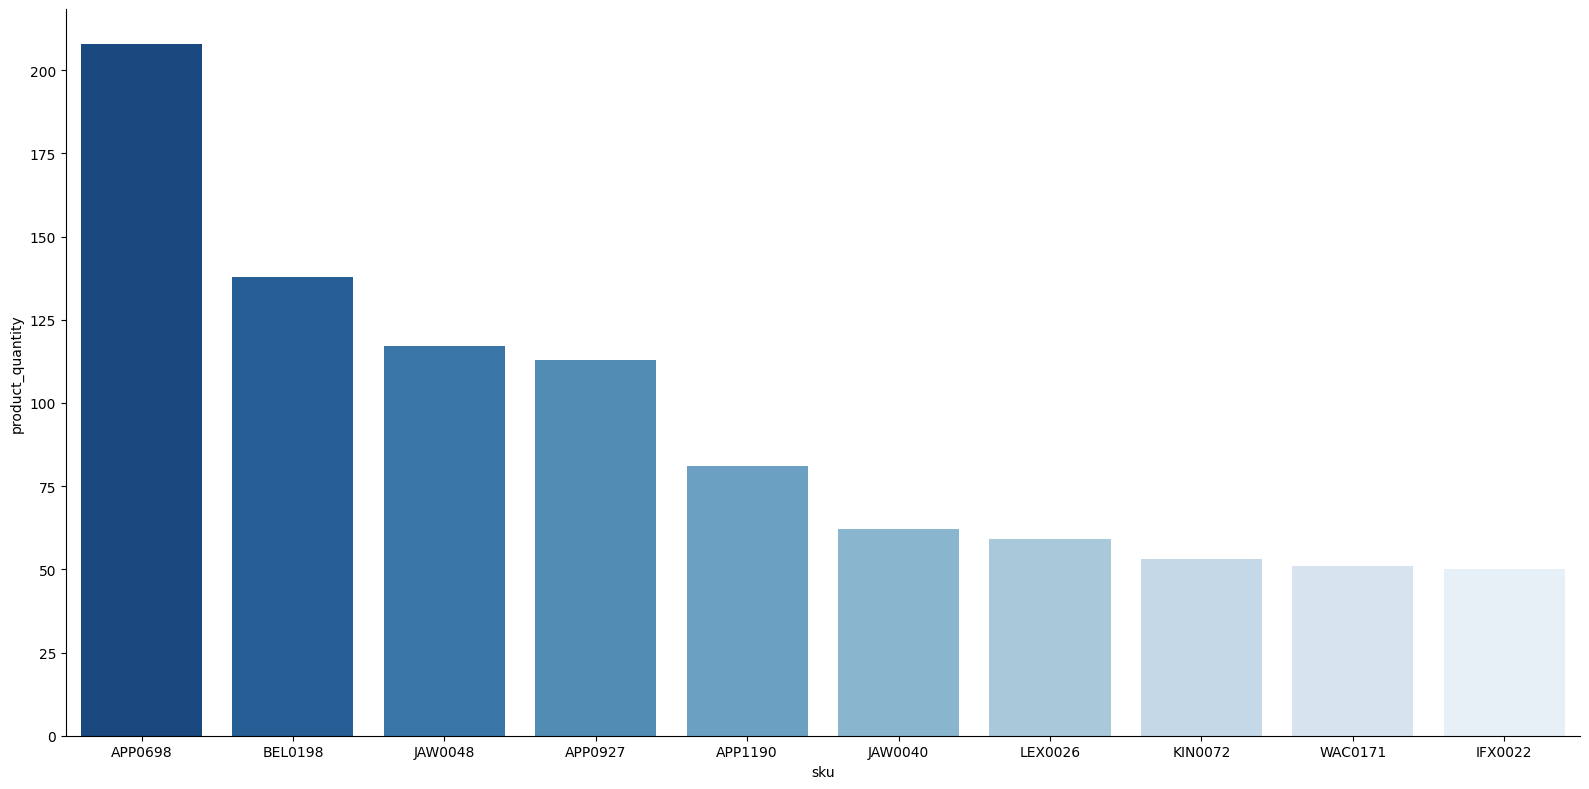

In [1094]:
sns.catplot(kind="bar",
            data=products_10_most_sold_jan17,
            x="sku",
            y="product_quantity",
            height=8,
            aspect=2,
            palette="Blues_r");

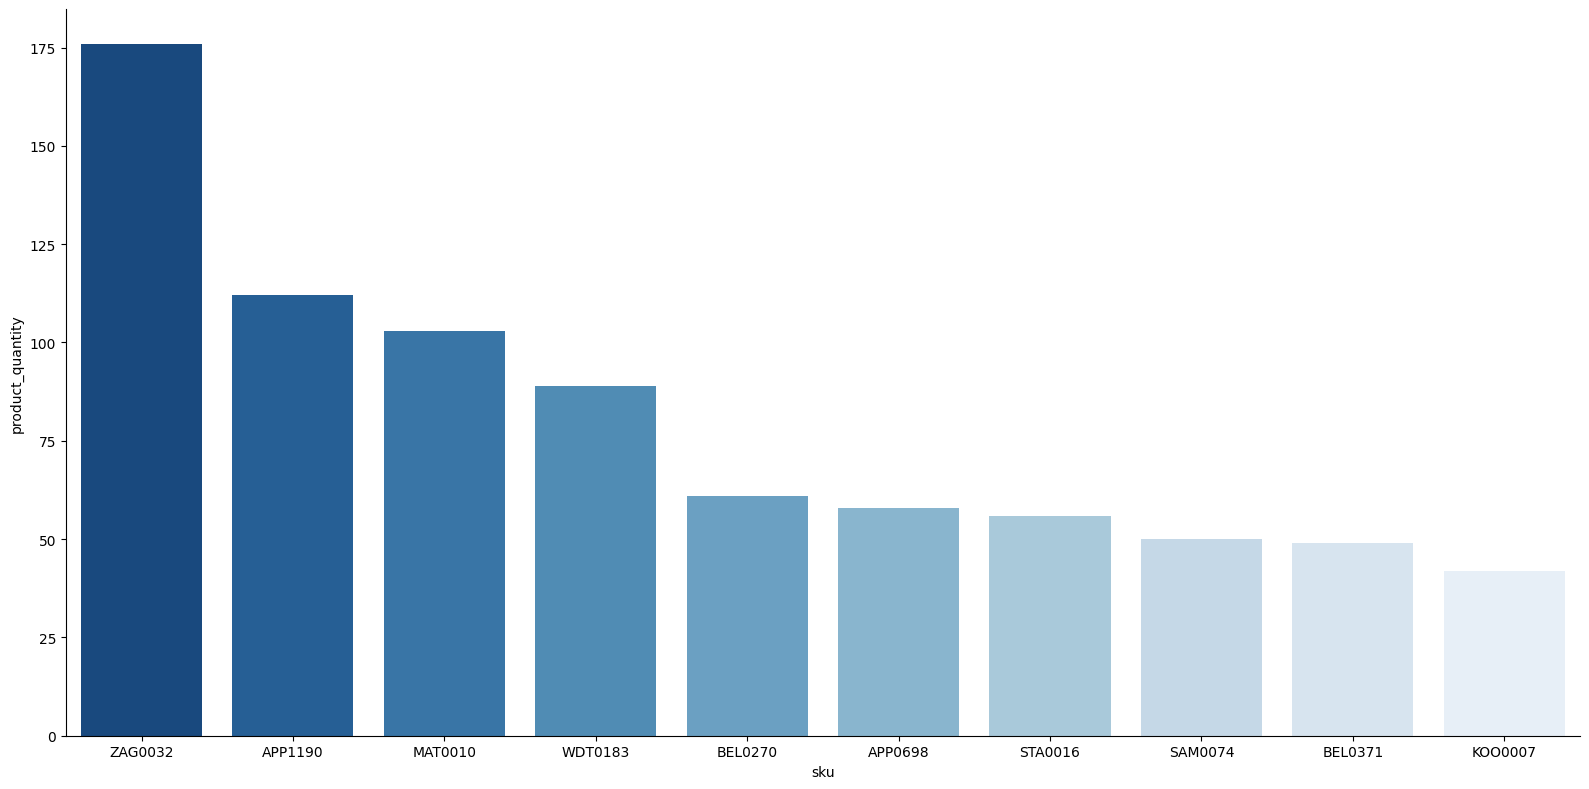

In [1095]:
sns.catplot(kind="bar",
            data=products_10_most_sold_jan18,
            x="sku",
            y="product_quantity",
            height=8,
            aspect=2,
            palette="Blues_r");

In [1096]:
#products_10_most_sold_jan17_jan18 = pd.concat([products_10_most_sold_jan17, products_10_most_sold_jan18])

In [1097]:
#sns.catplot(kind="bar",
            #data=products_10_most_sold_jan17_jan18,
            #x="sku",
            #y="product_quantity",
            #height=8,
            #aspect=2,
            #palette="Blues_r");

In [1098]:
# Fro more clarity I want a hue per year
# gonna try the same concat and just add .assign at the end of each df

products_10_most_sold_jan17['year']='2017'
products_10_most_sold_jan18['year']='2018'

products_10_most_sold_jan17_jan18 = pd.concat([products_10_most_sold_jan17, products_10_most_sold_jan18],axis=0)

In [1099]:
# ma méthode de base pour rajouter une colonne dans les df
# products_10_most_sold_jan17_jan18 = pd.concat([products_10_most_sold_jan17.assign(year=2017), products_10_most_sold_jan18.assign(year=2018)],axis=0)

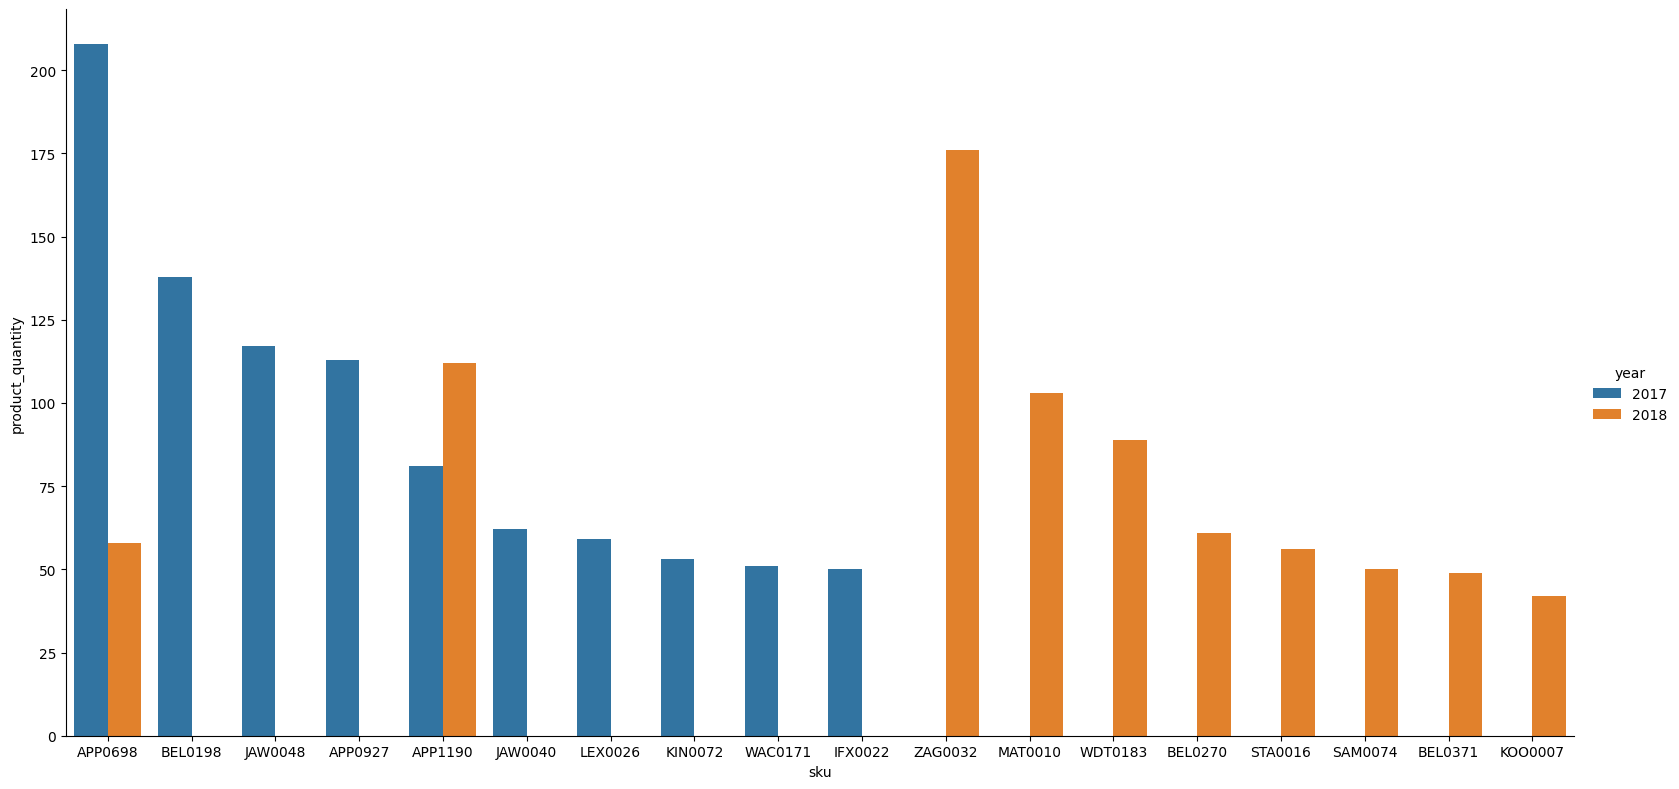

In [1100]:
sns.catplot(kind="bar",
            data=products_10_most_sold_jan17_jan18,
            x="sku",
            y="product_quantity",
            hue='year',
            height=8,
            aspect=2);

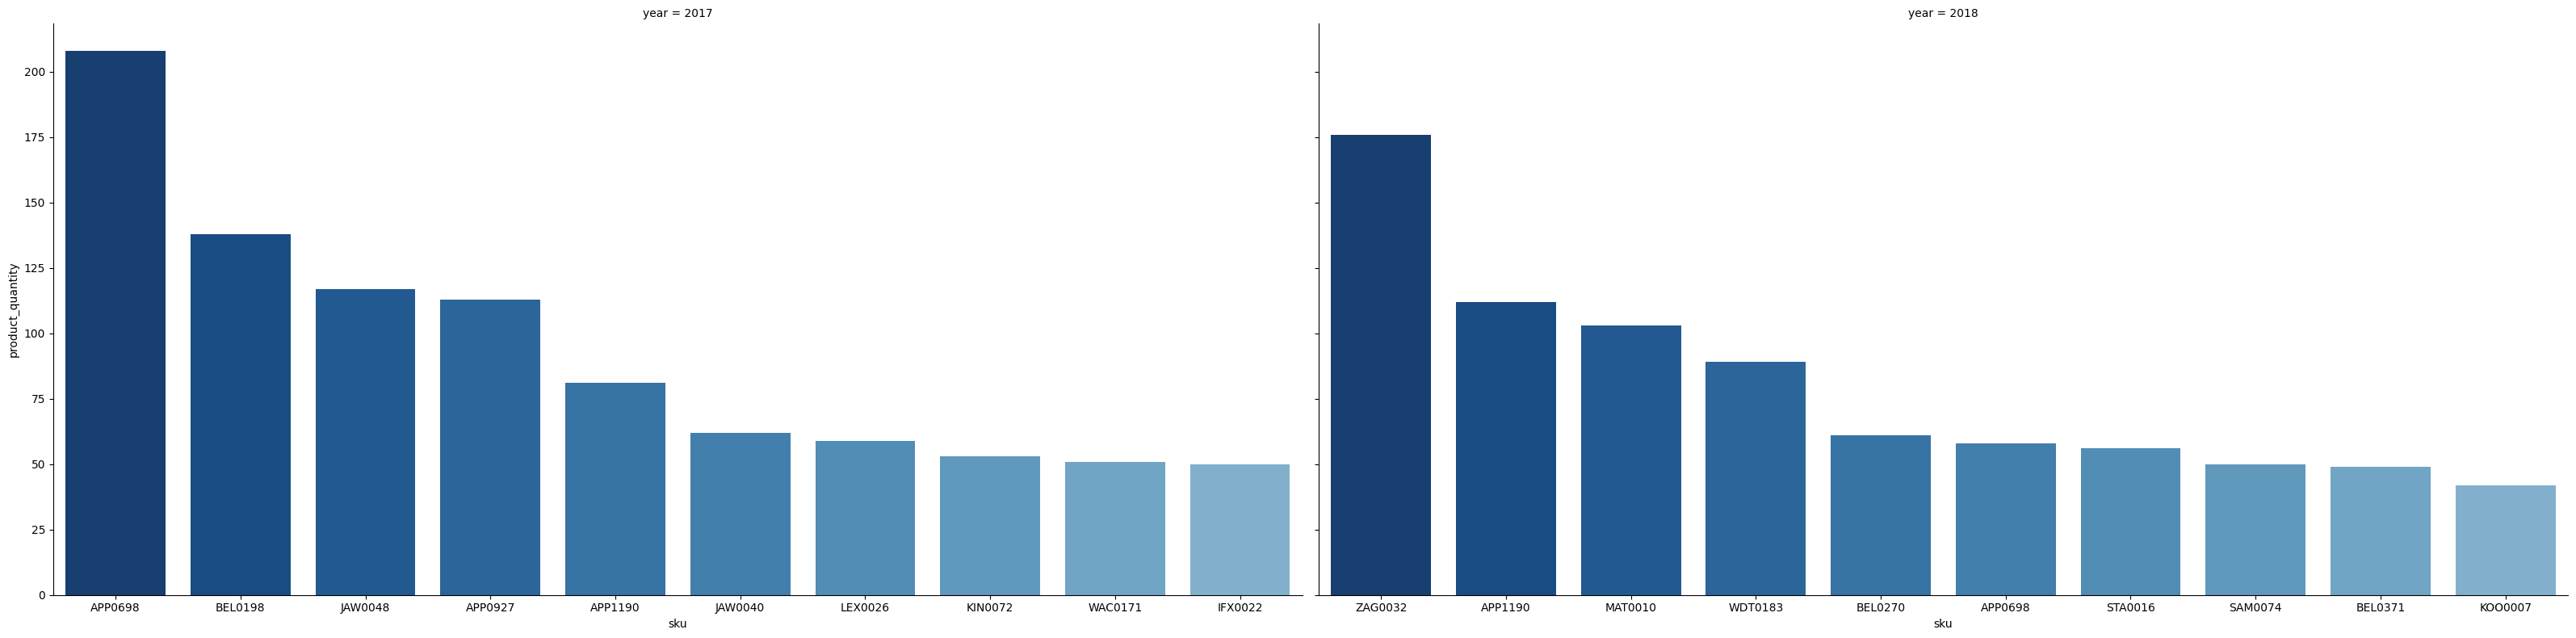

In [1101]:
sns.catplot(kind="bar",
            data=products_10_most_sold_jan17_jan18,
            x="sku",
            y="product_quantity",
            height=8,
            aspect=2,
            col='year',
            palette="Blues_r",
            sharex=False);

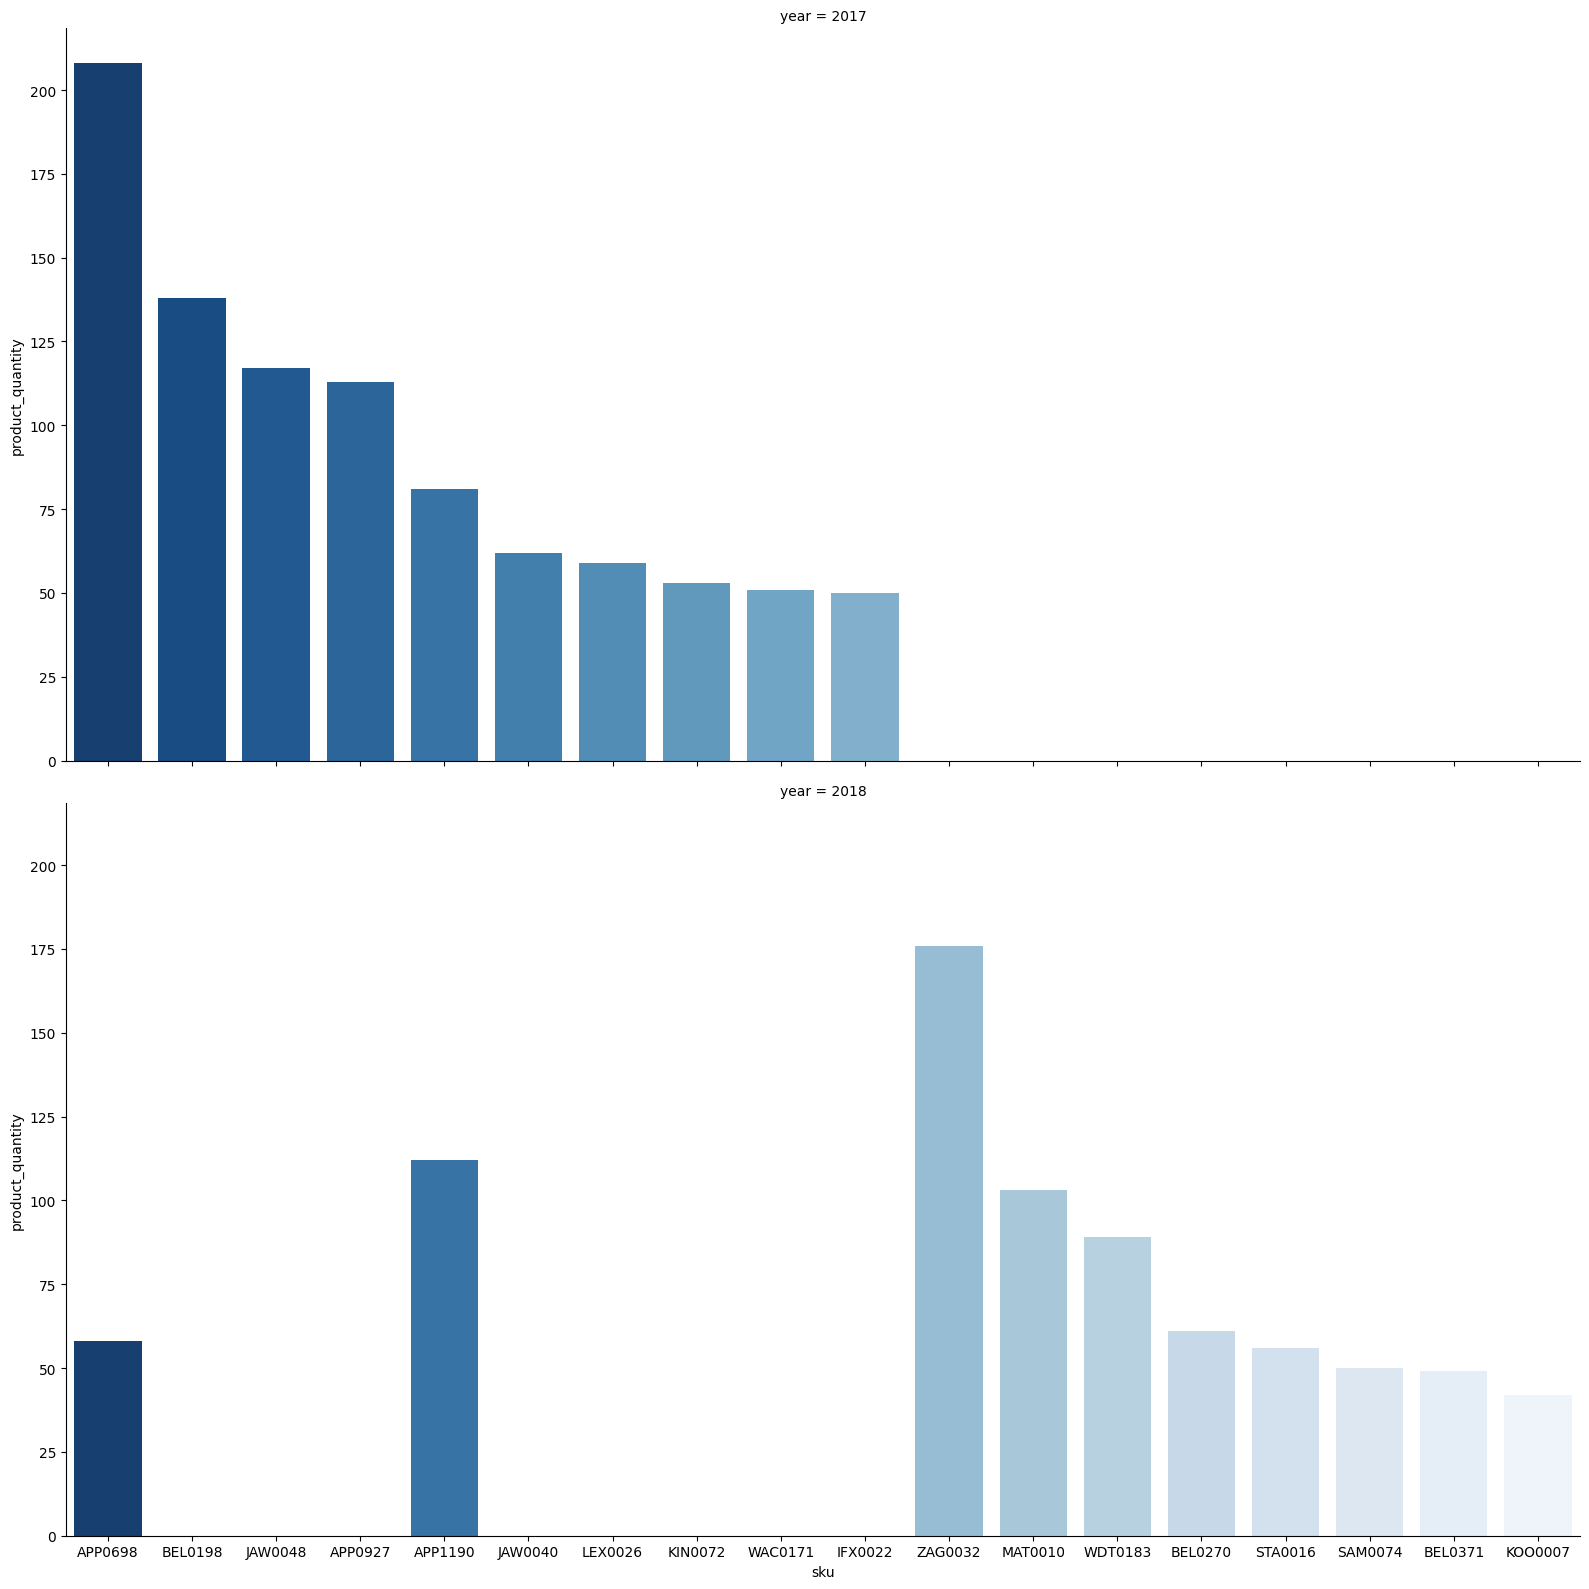

In [1102]:
sns.catplot(kind="bar",
            data=products_10_most_sold_jan17_jan18,
            x="sku",
            y="product_quantity",
            height=8,
            aspect=2,
            row='year',
            palette="Blues_r",
            sharex=True);

In [1103]:
ol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                53231 non-null  int64         
 1   id_order          53231 non-null  int64         
 2   product_id        53231 non-null  int64         
 3   product_quantity  53231 non-null  int64         
 4   sku               53231 non-null  object        
 5   unit_price        53231 non-null  float64       
 6   date              53231 non-null  datetime64[ns]
 7   short             53231 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.2+ MB


In [1104]:
ol_df

id  id_order  product_id  product_quantity        sku  unit_price  \
0      1119116    299545           0                 1    OWC0100       47.49   
1      1119119    299546           0                 1    IOT0014       18.99   
2      1119120    295347           0                 1    APP0700       72.19   
3      1119134    299556           0                 1  CRU0039-A       60.90   
4      1119145    299561           0                 1    PEB0015      142.49   
...        ...       ...         ...               ...        ...         ...   
53226  1649447    527035           0                 1    APP0698        9.99   
53227  1649512    527070           0                 2    APP0698        9.99   
53228  1649522    527074           0                 2    APP0698        9.99   
53229  1649565    527096           0                 3    APP0698        9.99   
53230  1649593    527112           0                 1    APP0698        9.99   

                     date short  
0     2017-01-01 01:46:16   OWC  
1     2017-01-01 01:50:34   IOT  
2     2017-01-01 01:54:11   APP  
3     2017-01-01 02:20:14   CRU  
4     2017-01-01 02:38:50   PEB  
...                   ...   ...  
53226 2018-03-14 11:42:41   APP  
53227 2018-03-14 11:49:01   APP  
53228 2018-03-14 11:49:36   APP  
53229 2018-03-14 11:54:35   APP  
53230 2018-03-14 11:58:13   APP  

[53231 rows x 8 columns]

In [1105]:
products_10_most_sold_jan17

date      sku  product_quantity  year
55   2017-01-01 18:25:21  APP0698               208  2017
207  2017-01-13 08:37:40  BEL0198               138  2017
560  2017-01-03 09:48:42  JAW0048               117  2017
66   2017-01-01 21:10:46  APP0927               113  2017
99   2017-01-02 23:46:35  APP1190                81  2017
559  2017-01-05 08:38:52  JAW0040                62  2017
702  2017-01-07 20:58:20  LEX0026                59  2017
614  2017-01-10 12:51:41  KIN0072                53  2017
1605 2017-01-02 13:27:43  WAC0171                51  2017
487  2017-01-02 18:19:15  IFX0022                50  2017

In [1106]:
products_10_most_sold_jan17_jan18

date      sku  product_quantity  year
55   2017-01-01 18:25:21  APP0698               208  2017
207  2017-01-13 08:37:40  BEL0198               138  2017
560  2017-01-03 09:48:42  JAW0048               117  2017
66   2017-01-01 21:10:46  APP0927               113  2017
99   2017-01-02 23:46:35  APP1190                81  2017
559  2017-01-05 08:38:52  JAW0040                62  2017
702  2017-01-07 20:58:20  LEX0026                59  2017
614  2017-01-10 12:51:41  KIN0072                53  2017
1605 2017-01-02 13:27:43  WAC0171                51  2017
487  2017-01-02 18:19:15  IFX0022                50  2017
1827 2018-01-01 22:30:01  ZAG0032               176  2018
149  2018-01-01 13:33:13  APP1190               112  2018
903  2018-01-01 13:54:23  MAT0010               103  2018
1755 2018-01-02 10:39:17  WDT0183                89  2018
366  2018-01-24 12:30:46  BEL0270                61  2018
112  2018-01-01 17:29:45  APP0698                58  2018
1545 2018-01-06 00:34:45  STA0016                56  2018
1370 2018-01-01 17:50:32  SAM0074                50  2018
401  2018-01-01 22:19:47  BEL0371                49  2018
771  2018-01-23 22:09:13  KOO0007                42  2018

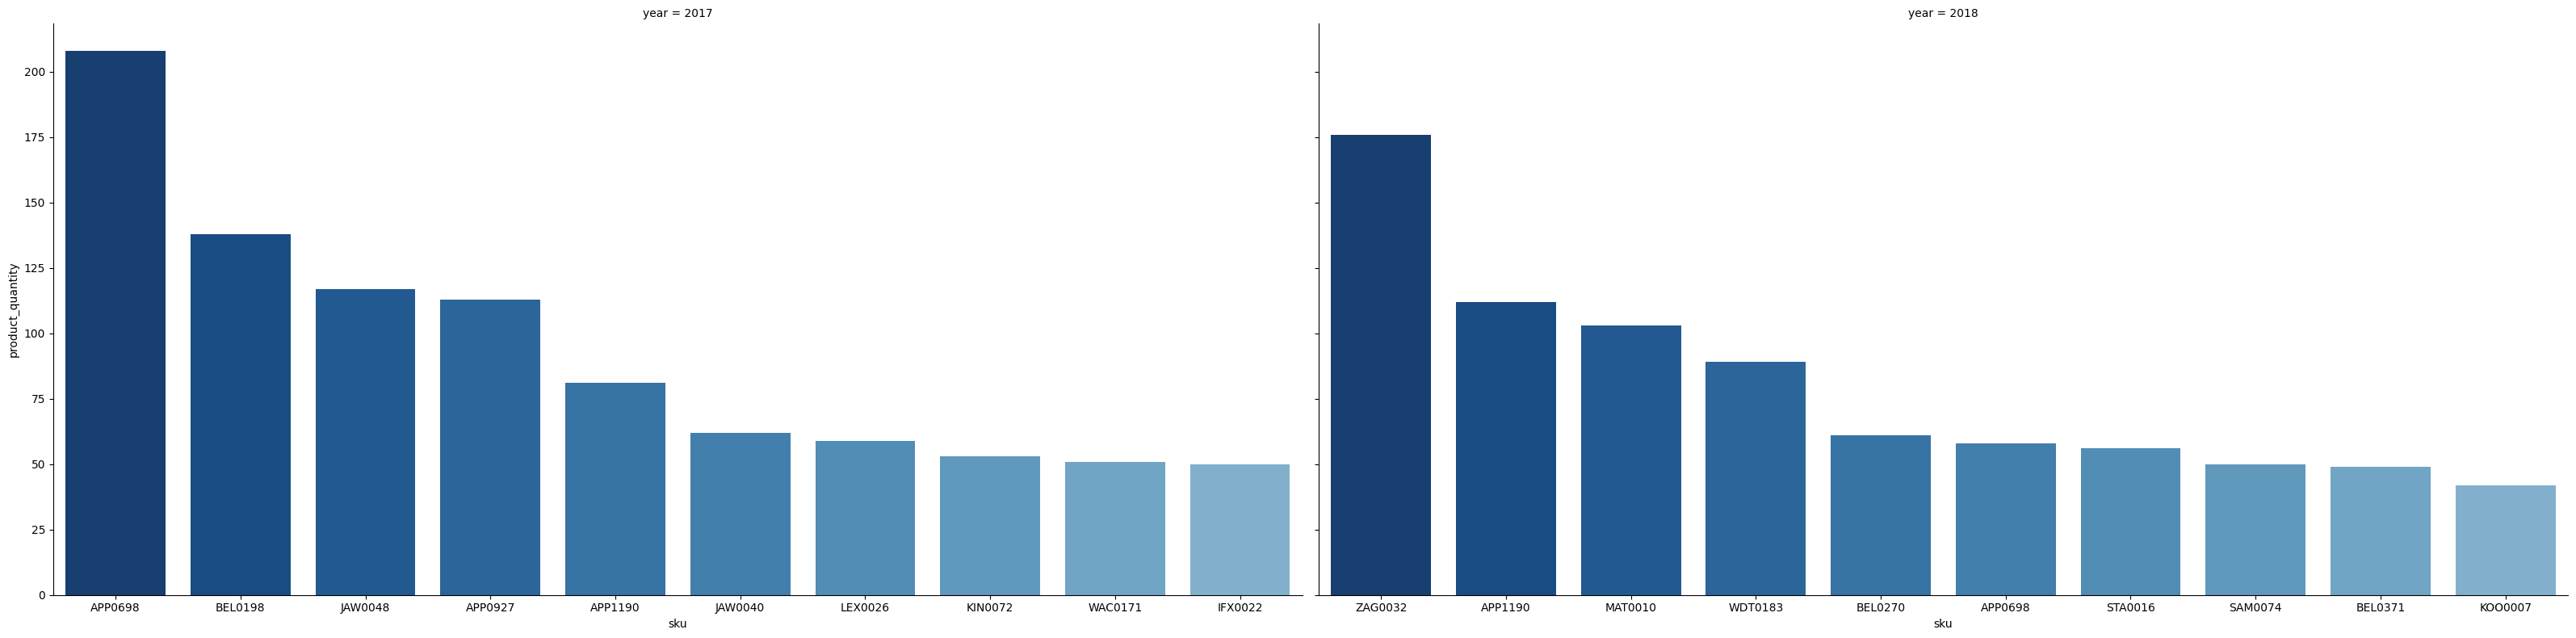

In [1107]:
# Solution entier

ol_df.date = pd.to_datetime(ol_df['date'])

products_10_most_sold_jan17 = (
    ol_df.query('date.dt.year == 2017 and date.dt.month == 1')
    .groupby('sku', as_index=False)
    .agg({'date': 'first', 'product_quantity': 'sum'})
    .nlargest(10, 'product_quantity')
    [['date', 'sku', 'product_quantity']]
)

products_10_most_sold_jan18 = (
    ol_df.query('date.dt.year == 2018 and date.dt.month == 1')
    .groupby('sku', as_index=False)
    .agg({'date': 'first', 'product_quantity': 'sum'})
    .nlargest(10, 'product_quantity')
    [['date', 'sku', 'product_quantity']]
)

products_10_most_sold_jan17_jan18 = pd.concat([products_10_most_sold_jan17
                                               .assign(year=2017),
                                               products_10_most_sold_jan18
                                               .assign(year=2018)])

sns.catplot(kind="bar",
            data=products_10_most_sold_jan17_jan18,
            x="sku",
            y="product_quantity",
            height=8,
            aspect=2,
            col='year',
            palette="Blues_r",
            sharex=False);

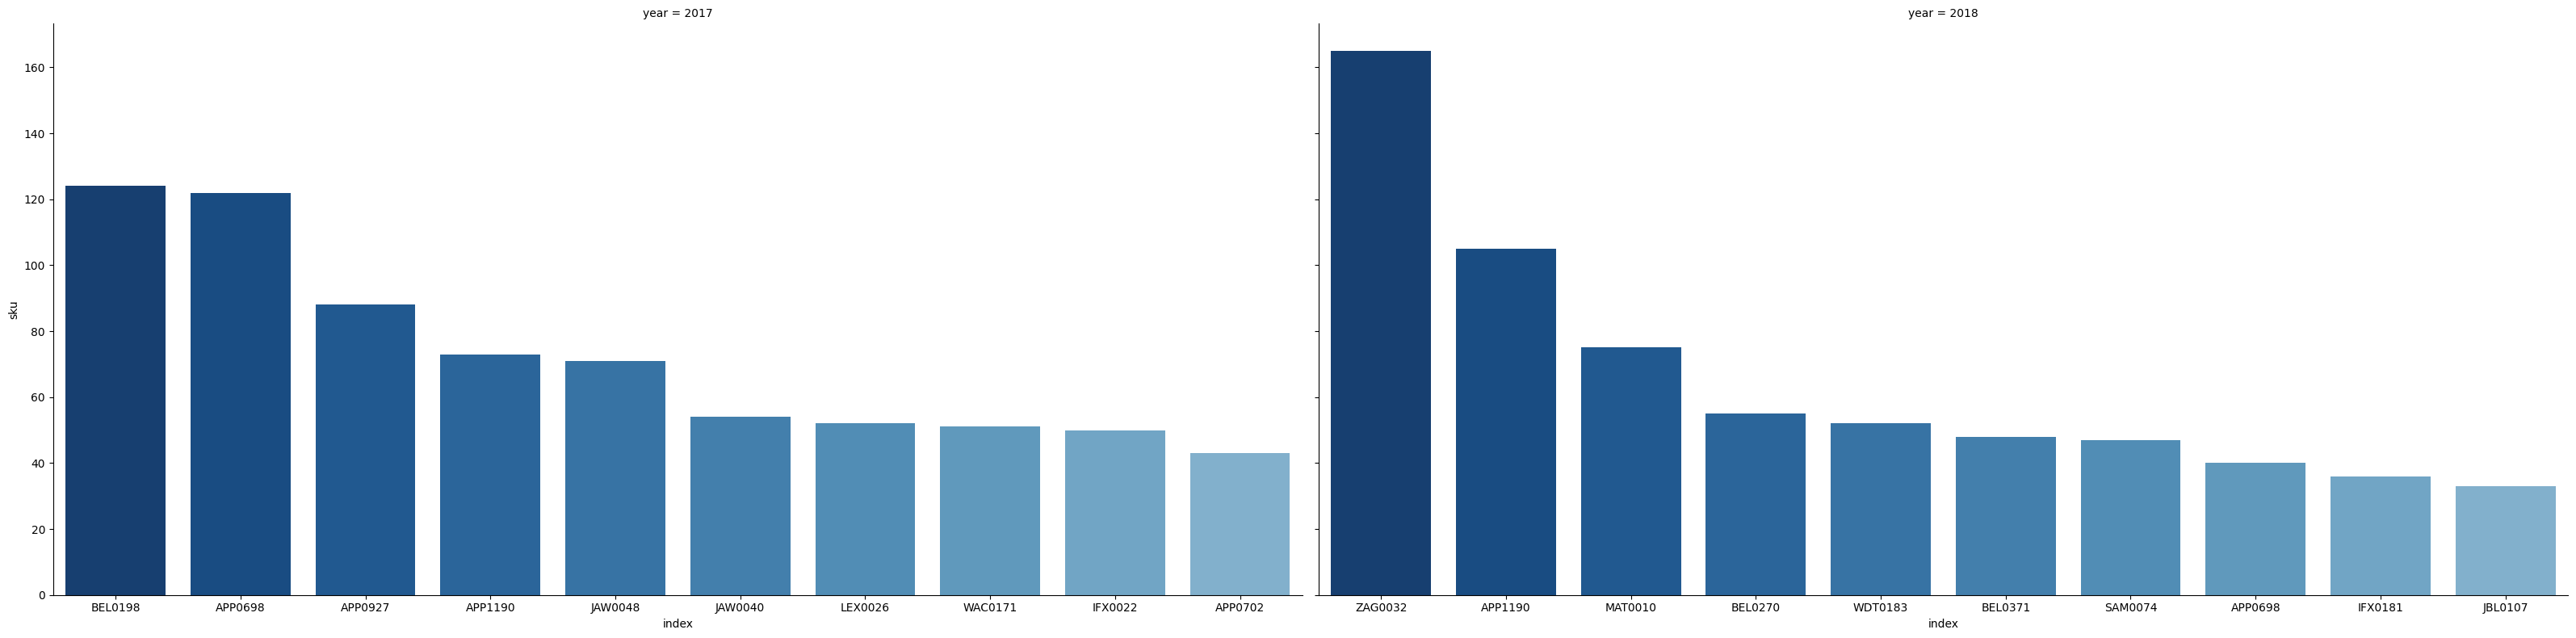

In [1108]:
# Solution de Ivan pas juste car il fait value_counts

orderlines_qu['date'] = pd.to_datetime(orderlines_qu['date'])
orders_2017 = orderlines_qu[(orderlines_qu['date'].dt.year == 2017) & (orderlines_qu['date'].dt.month == 1)]

orders_2018 = orderlines_qu[(orderlines_qu['date'].dt.year == 2018) & (orderlines_qu['date'].dt.month == 1)]
top_10_2017 = orders_2017['sku'].value_counts().nlargest(10).to_frame()
top_10_2018 = orders_2018['sku'].value_counts().nlargest(10).to_frame()
top_10_2017["year"]="2017"
top_10_2018["year"]="2018"

top_10_products = pd.concat([top_10_2017, top_10_2018], axis=0)
#brands_10_most_sold_df
top_10_products.reset_index(inplace=True)
sns.catplot(kind="bar",
            data=top_10_products,
            x="index",
            y="sku",
            height=8,
            aspect=2,
            col="year",
            sharex=False,
            palette="Blues_r");

# 10 MOST SOLD PRODUCTS (in quantity)

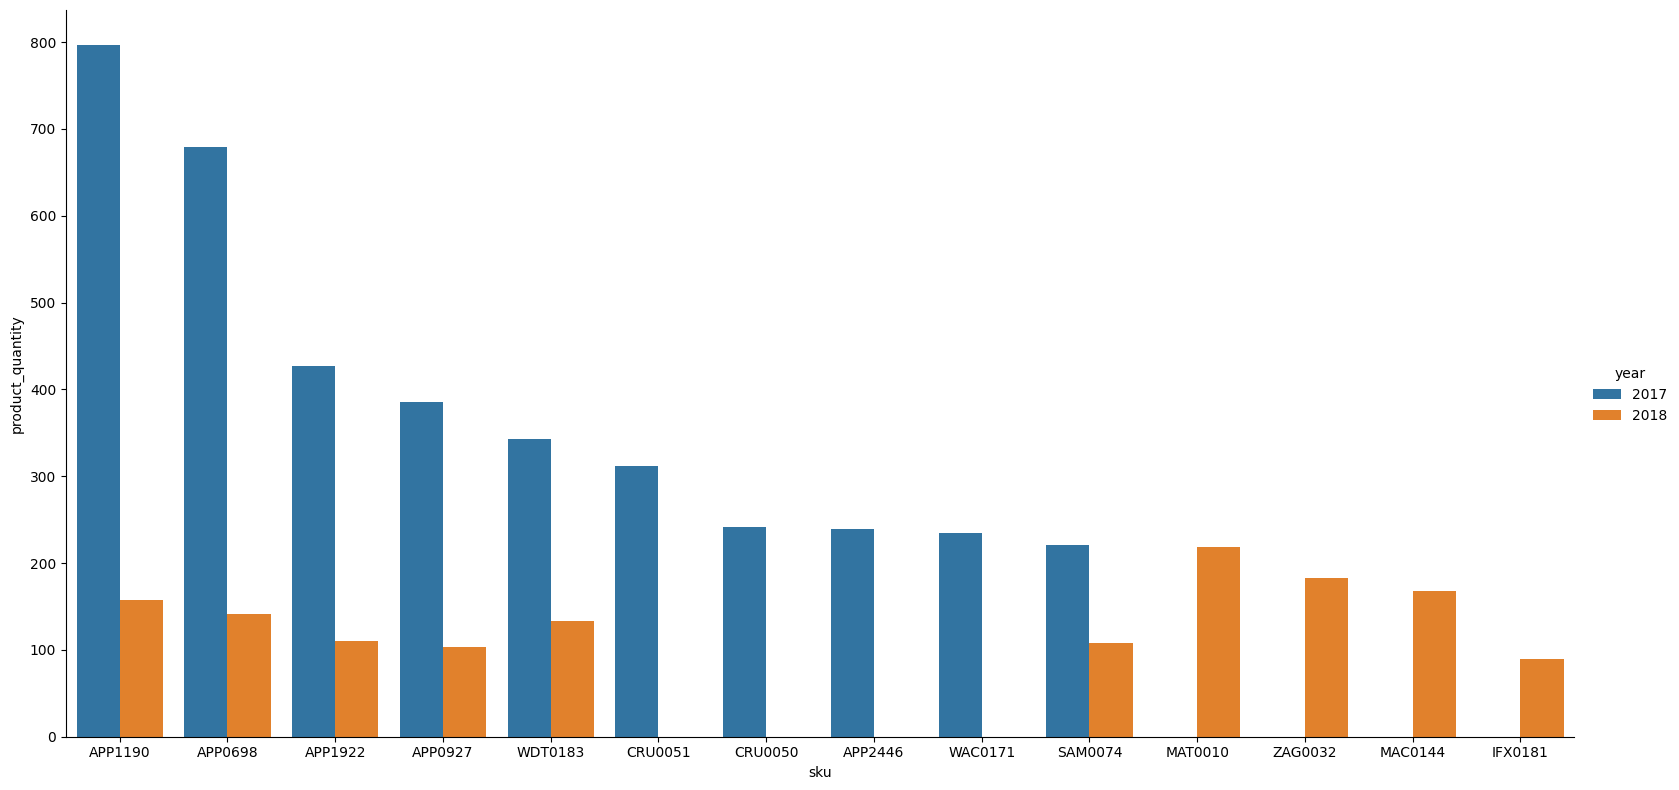

In [1109]:
ol_df.date = pd.to_datetime(ol_df['date'])

products_10_most_sold_17 = (
    ol_df.query('date.dt.year == 2017')
    .groupby('sku', as_index=False)
    .agg({'date': 'first', 'product_quantity': 'sum'})
    .nlargest(10, 'product_quantity')
    [['date', 'sku', 'product_quantity']]
)

products_10_most_sold_18 = (
    ol_df.query('date.dt.year == 2018')
    .groupby('sku', as_index=False)
    .agg({'date': 'first', 'product_quantity': 'sum'})
    .nlargest(10, 'product_quantity')
    [['date', 'sku', 'product_quantity']]
)

products_10_most_sold_17_18 = pd.concat([products_10_most_sold_17
                                               .assign(year=2017),
                                               products_10_most_sold_18
                                               .assign(year=2018)])

sns.catplot(kind="bar",
            data=products_10_most_sold_17_18,
            x="sku",
            y="product_quantity",
            hue='year',
            height=8,
            aspect=2);

In [1110]:
products_10_most_sold = (
    ol_df.groupby('sku', as_index=False)
    .agg({'product_quantity': 'sum'})
    .nlargest(10, 'product_quantity')
    [['sku', 'product_quantity']])

In [1111]:
products_10_most_sold

sku  product_quantity
448   APP1190               955
360   APP0698               820
655   APP1922               537
378   APP0927               489
4906  WDT0183               476
3922  SAM0074               329
1226  CRU0051               328
765   APP2446               270
2904  NTE0013               252
1225  CRU0050               248

In [1112]:
ol_p_no_outliers_df.nlargest(100, "Discount_%")

id  id_order  product_id  product_quantity        sku  unit_price  \
52617  1616752    512862           0                 2    MOP0109        2.00   
52603  1616321    512680           0                 2    MOP0109        3.99   
52608  1616631    512807           0                 2    MOP0109        3.99   
52610  1616643    511204           0                 2    MOP0109        3.99   
52796  1615967    512522           0                 2    MOP0107        3.99   
52798  1615984    512531           0                 2    MOP0107        3.99   
52799  1615998    512536           0                 2    MOP0107        3.99   
52805  1616180    512618           0                 2    MOP0107        3.99   
52807  1616190    256799           0                 2    MOP0107        3.99   
52875  1616455    512739           0                 2    MOP0108        3.99   
52876  1616465    512742           0                 2    MOP0108        3.99   
52878  1616569    512773           0                 2    MOP0108        3.99   
52601  1615950    512513           0                 1    MOP0109        7.99   
52602  1615963    512519           0                 1    MOP0109        7.99   
52604  1616380    512708           0                 1    MOP0109        7.99   
52605  1616431    512722           0                 1    MOP0109        7.99   
52606  1616457    512701           0                 1    MOP0109        7.99   
52607  1616580    512773           0                 1    MOP0109        7.99   
52609  1616633    512804           0                 1    MOP0109        7.99   
52611  1616695    512836           0                 1    MOP0109        7.99   
52612  1616702    512838           0                 1    MOP0109        7.99   
52613  1616708    512842           0                 1    MOP0109        7.99   
52614  1616729    512847           0                 1    MOP0109        7.99   
52615  1616745    512851           0                 1    MOP0109        7.99   
52616  1616750    512861           0                 1    MOP0109        7.99   
52618  1616785    512489           0                 1    MOP0109        7.99   
52619  1616800    512884           0                 1    MOP0109        7.99   
52620  1616804    512885           0                 1    MOP0109        7.99   
52621  1616836    512899           0                 1    MOP0109        7.99   
52622  1616840    512900           0                 1    MOP0109        7.99   
52623  1616900    512801           0                 1    MOP0109        7.99   
52624  1616906    512586           0                 1    MOP0109        7.99   
52789  1615556    512297           0                 1    MOP0107        7.99   
52790  1615788    512430           0                 1    MOP0107        7.99   
52791  1615799    512436           0                 1    MOP0107        7.99   
52792  1615802    512439           0                 1    MOP0107        7.99   
52793  1615885    512432           0                 1    MOP0107        7.99   
52794  1615910    512494           0                 1    MOP0107        7.99   
52795  1615949    512513           0                 1    MOP0107        7.99   
52797  1615968    512523           0                 1    MOP0107        7.99   
52800  1616004    512541           0                 1    MOP0107        7.99   
52801  1616045    512555           0                 1    MOP0107        7.99   
52802  1616116    512583           0                 1    MOP0107        7.99   
52803  1616120    512587           0                 1    MOP0107        7.99   
52804  1616171    512613           0                 1    MOP0107        7.99   
52806  1616184    512619           0                 1    MOP0107        7.99   
52808  1616252    512645           0                 1    MOP0107        7.99   
52809  1616270    512655           0                 1    MOP0107        7.99   
52810  1616483    512751           0       

In [1113]:
ol_p_no_outliers_df.nlargest(100, "Discount_%").info('type')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 52617 to 34272
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                100 non-null    int64         
 1   id_order          100 non-null    int64         
 2   product_id        100 non-null    int64         
 3   product_quantity  100 non-null    int64         
 4   sku               100 non-null    object        
 5   unit_price        100 non-null    float64       
 6   date              100 non-null    datetime64[ns]
 7   name              100 non-null    object        
 8   desc              100 non-null    object        
 9   price             100 non-null    float64       
 10  promo_price       100 non-null    object        
 11  in_stock          100 non-null    int64         
 12  type              100 non-null    object        
 13  short_brand       100 non-null    object        
 14  Discount          10

In [1114]:
ol_p_no_outliers_df.nlargest(10,'Discount_%')

id  id_order  product_id  product_quantity      sku  unit_price  \
52617  1616752    512862           0                 2  MOP0109        2.00   
52603  1616321    512680           0                 2  MOP0109        3.99   
52608  1616631    512807           0                 2  MOP0109        3.99   
52610  1616643    511204           0                 2  MOP0109        3.99   
52796  1615967    512522           0                 2  MOP0107        3.99   
52798  1615984    512531           0                 2  MOP0107        3.99   
52799  1615998    512536           0                 2  MOP0107        3.99   
52805  1616180    512618           0                 2  MOP0107        3.99   
52807  1616190    256799           0                 2  MOP0107        3.99   
52875  1616455    512739           0                 2  MOP0108        3.99   

                     date                                               name  \
52617 2018-02-16 12:47:23  Mophie Powerstation Mini Universal 4000mAh Bat...   
52603 2018-02-16 10:09:30  Mophie Powerstation Mini Universal 4000mAh Bat...   
52608 2018-02-16 11:54:59  Mophie Powerstation Mini Universal 4000mAh Bat...   
52610 2018-02-16 11:58:55  Mophie Powerstation Mini Universal 4000mAh Bat...   
52796 2018-02-16 09:03:35  Mophie Powerstation 4000mAh Battery Plus Mini ...   
52798 2018-02-16 09:06:25  Mophie Powerstation 4000mAh Battery Plus Mini ...   
52799 2018-02-16 09:08:53  Mophie Powerstation 4000mAh Battery Plus Mini ...   
52805 2018-02-16 09:40:49  Mophie Powerstation 4000mAh Battery Plus Mini ...   
52807 2018-02-16 09:42:27  Mophie Powerstation 4000mAh Battery Plus Mini ...   
52875 2018-02-16 10:50:02  Mophie Powerstation Mini Universal 4000mAh Bat...   

                                                    desc  price promo_price  \
52617  external battery capacity 4000mAh output volta...  69.95     269.903   
52603  external battery capacity 4000mAh output volta...  69.95     269.903   
52608  external battery capacity 4000mAh output volta...  69.95     269.903   
52610  external battery capacity 4000mAh output volta...  69.95     269.903   
52796  external battery capacity 4000mAh output volta...  69.95     269.903   
52798  external battery capacity 4000mAh output volta...  69.95     269.903   
52799  external battery capacity 4000mAh output volta...  69.95     269.903   
52805  external battery capacity 4000mAh output volta...  69.95     269.903   
52807  external battery capacity 4000mAh output volta...  69.95     269.903   
52875  external battery capacity 4000mAh output volta...  69.95      79.896   

       in_stock  type short_brand  Discount  Discount_%  
52617         0  1515         MOP     68.00       97.00  
52603         0  1515         MOP     66.00       94.00  
52608         0  1515         MOP     66.00       94.00  
52610         0  1515         MOP     66.00       94.00  
52796         0  1515         MOP     66.00       94.00  
52798         0  1515         MOP     66.00       94.00  
52799         0  1515         MOP     66.00       94.00  
52805         0  1515         MOP     66.00       94.00  
52807         0  1515         MOP     66.00       94.00  
52875         0  1515         MOP     66.00       94.00

#10 MOST SOLD PRODUCTS (ALL YEARS)

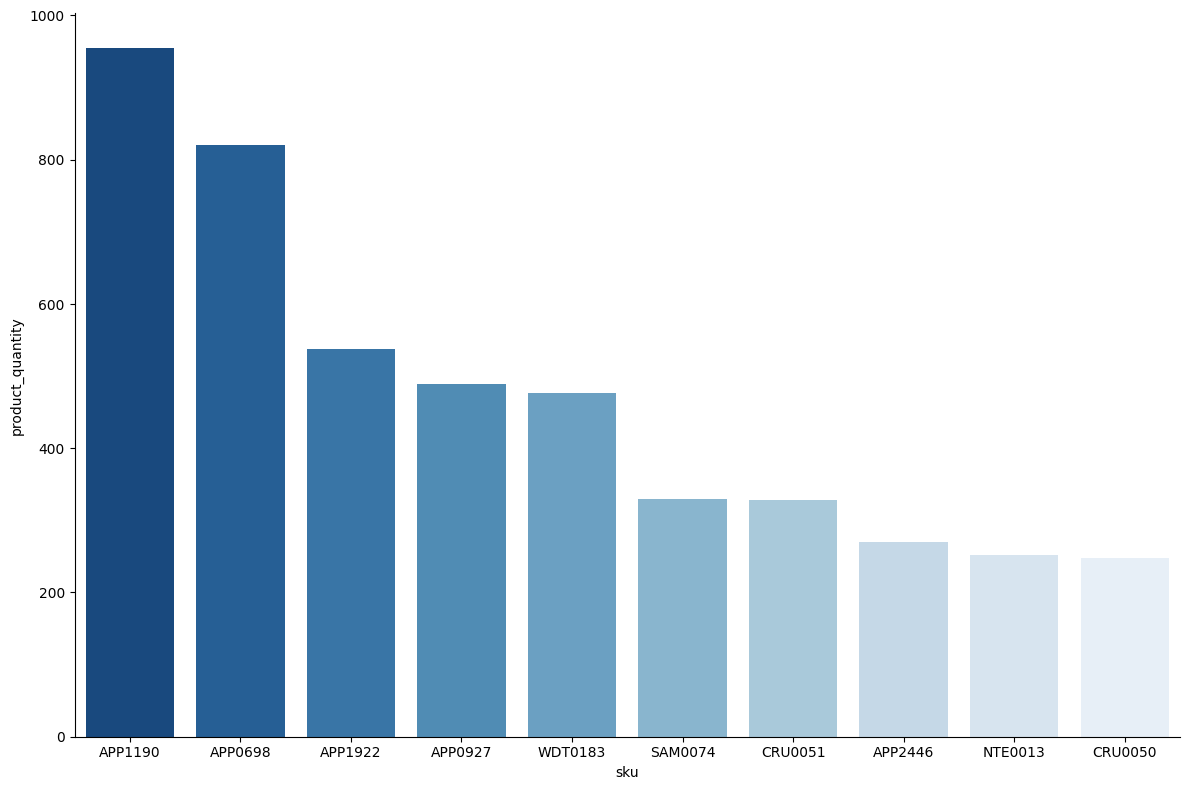

In [1115]:
ol_df.date = pd.to_datetime(ol_df['date'])

products_10_most_sold = (
    ol_df.groupby('sku', as_index=False)
    .agg({'product_quantity': 'sum'})
    .nlargest(10, 'product_quantity')
    [['sku', 'product_quantity']]
)

sns.catplot(kind="bar",
            data=products_10_most_sold,
            x="sku",
            y="product_quantity",
            palette = 'Blues_r',
            height=8,
            aspect=1.5);

# **10** MOST DISCOUNT PRODUCTS

In [1116]:
top_10_discount = ol_p_no_outliers_df.groupby('sku').mean('Discount_%').nlargest(10, 'Discount_%')


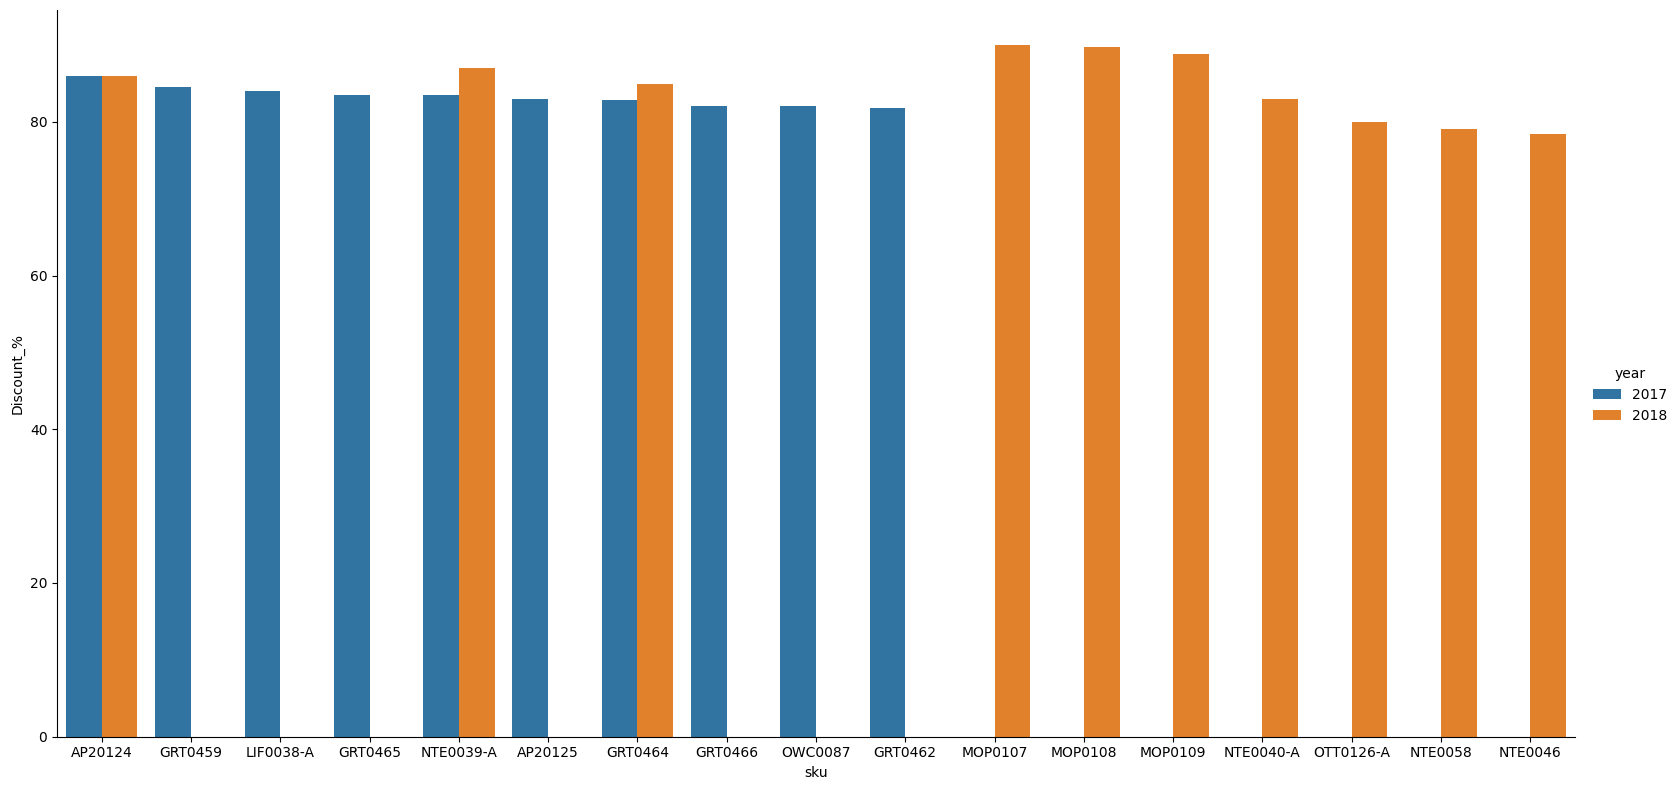

In [1117]:
ol_df.date = pd.to_datetime(ol_df['date'])

products_10_most_disc_17 = (
    ol_p_no_outliers_df.query('date.dt.year == 2017')
    .groupby('sku', as_index=False)
    .agg({'date': 'first', 'Discount_%': 'mean'})
    .nlargest(10, 'Discount_%')

)

products_10_most_disc_18 = (
    ol_p_no_outliers_df.query('date.dt.year == 2018')
    .groupby('sku', as_index=False)
    .agg({'date': 'first', 'Discount_%': 'mean'})
    .nlargest(10, 'Discount_%')
)

products_10_most_disc_17_18 = pd.concat([products_10_most_disc_17
                                               .assign(year=2017),
                                               products_10_most_disc_18
                                               .assign(year=2018)])

sns.catplot(kind="bar",
            data=products_10_most_disc_17_18,
            x="sku",
            y="Discount_%",
            hue='year',
            height=8,
            aspect=2);

In [1118]:
top_10_discount

id  id_order  product_id  product_quantity  unit_price  \
sku                                                                        
MOP0107   1616069.88 501896.79        0.00              1.21        7.16   
MOP0108   1619698.50 513548.20        0.00              1.20        7.39   
MOP0109   1616162.48 512503.40        0.00              1.16        8.03   
AP20124   1483130.36 458036.55        0.00              1.18        4.94   
GRT0459   1324585.00 390779.15        0.00              1.05        5.07   
LIF0038-A 1163253.00 316622.00        0.00              1.00       12.54   
NTE0039-A 1283452.57 369511.43        0.00              1.00        9.85   
GRT0464   1447785.93 441499.00        0.00              1.09        5.17   
GRT0465   1348941.45 398464.75        0.00              1.05        5.27   
AP20125   1354918.00 401268.00        0.00              1.00        5.99   

           price  in_stock  Discount  Discount_%  
sku                                               
MOP0107    69.95      0.00     62.83       90.04  
MOP0108    69.95      0.00     62.60       89.75  
MOP0109    69.95      0.00     61.96       88.80  
AP20124    35.00      1.00     30.00       86.00  
GRT0459    29.99      0.00     25.30       84.50  
LIF0038-A  79.99      0.00     67.00       84.00  
NTE0039-A  60.99      0.00     51.29       84.00  
GRT0464    29.99      1.00     25.00       83.52  
GRT0465    29.99      0.00     25.00       83.50  
AP20125    35.00      0.00     29.00       83.00

## average monthly price of an order

In [1119]:
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      40985 non-null  int64         
 1   created_date  40985 non-null  datetime64[ns]
 2   total_paid    40985 non-null  float64       
 3   state         40985 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [1120]:
# your code here
orders_qu.created_date = pd.to_datetime(orders_qu['created_date'])

In [1121]:
avg_total = orders_qu.groupby(orders_qu['created_date'].dt.date)['total_paid'].mean().round(2)

In [1122]:
avg_total_df = avg_total.to_frame()
avg_total_df

total_paid
created_date            
2017-01-01        174.87
2017-01-02        134.55
2017-01-03        137.97
2017-01-04        148.12
2017-01-05        100.33
2017-01-06        109.46
2017-01-07        113.47
2017-01-08        126.23
2017-01-09        132.79
2017-01-10        138.19
2017-01-11        140.70
2017-01-12        173.16
2017-01-13         86.54
2017-01-14        126.39
2017-01-15         99.55
2017-01-16        129.84
2017-01-17        135.43
2017-01-18        147.83
2017-01-19        166.22
2017-01-20        123.60
2017-01-21        168.80
2017-01-22        109.74
2017-01-23        135.05
2017-01-24        153.39
2017-01-25        133.42
2017-01-26        146.18
2017-01-27        115.32
2017-01-28        137.11
2017-01-29        135.59
2017-01-30        157.46
2017-01-31        180.93
2017-02-01        191.21
2017-02-02        161.51
2017-02-03        186.20
2017-02-04        115.14
2017-02-05        102.59
2017-02-06        167.40
2017-02-07        166.75
2017-02-08        154.15
2017-02-09        167.74
2017-02-10        166.02
2017-02-11        170.03
2017-02-12        179.23
2017-02-13        201.39
2017-02-14        199.18
2017-02-15        145.93
2017-02-16        201.24
2017-02-17        134.15
2017-02-18        153.88
2017-02-19        153.44
2017-02-20        186.42
2017-02-21        154.73
2017-02-22        154.24
2017-02-23        161.94
2017-02-24         49.99
2017-02-25         51.99
2017-02-26         56.72
2017-02-27        134.08
2017-02-28        120.97
2017-03-01        100.18
2017-03-02        107.46
2017-03-03        247.98
2017-03-04        118.99
2017-03-05         35.74
2017-03-06         52.73
2017-03-07        157.11
2017-03-08        134.89
2017-03-09        215.48
2017-03-10        408.38
2017-03-11        126.99
2017-03-12         20.93
2017-03-13        138.39
2017-03-14         77.78
2017-03-15        283.92
2017-03-16        273.48
2017-03-17        165.09
2017-03-18        157.86
2017-03-19        122.48
2017-03-20        177.24
2017-03-21        261.12
2017-03-22        251.17
2017-03-23         72.09
2017-03-24         63.98
2017-03-25         53.98
2017-03-26        464.99
2017-03-27        118.65
2017-03-28        139.10
2017-03-29        203.34
2017-03-30        204.98
2017-03-31         97.14
2017-04-01        267.99
2017-04-02        260.68
2017-04-03        133.07
2017-04-04        182.14
2017-04-05        147.16
2017-04-06        248.22
2017-04-07        411.31
2017-04-08         31.48
2017-04-09        203.98
2017-04-10        154.22
2017-04-11        171.87
2017-04-12         75.98
2017-04-13        190.66
2017-04-14        124.18
2017-04-15        141.03
2017-04-16        144.13
2017-04-17        179.96
2017-04-18        188.45
2017-04-19        155.78
2017-04-20        149.36
2017-04-21        102.32
2017-04-22        195.91
2017-04-23        134.55
2017-04-24        230.10
2017-04-25        194.17
2017-04-26        194.23
2017-04-27        139.57
2017-04-28        177.38
2017-04-29        130.97
2017-04-30        121.76
2017-05-01        179.48
2017-05-02        185.31
2017-05-03        209.15
2017-05-04        216.98
2017-05-05        161.15
2017-05-06        122.26
2017-05-07        190.96
2017-05-08        213.82
2017-05-09        196.04
2017-05-10        173.26
2017-05-11        162.15
2017-05-12        126.31
2017-05-13        142.95
2017-05-14        298.99
2017-05-15        303.71
2017-05-16        244.92
2017-05-17        205.48
2017-05-18        164.24
2017-05-19        198.34
2017-05-20        332.72
2017-05-21        235.32
2017-05-22        243.27
2017-05-23        286.49
2017-05-24        288.34
2017-05-25        172.87
2017-05-26        206.06
2017-05-27        399.47
2017-05-28        312.37
2017-05-29        168.75
2017-05-30        264.15
2017-05-31        154.61
2017-06-01        219.93
2017-06-02        245.79
2017-06-03        166.04
2017-06-04        158.91
2017-06-05        154.36
2017-06-06        250.44
2017-06-07        277.30
2017-06-08    

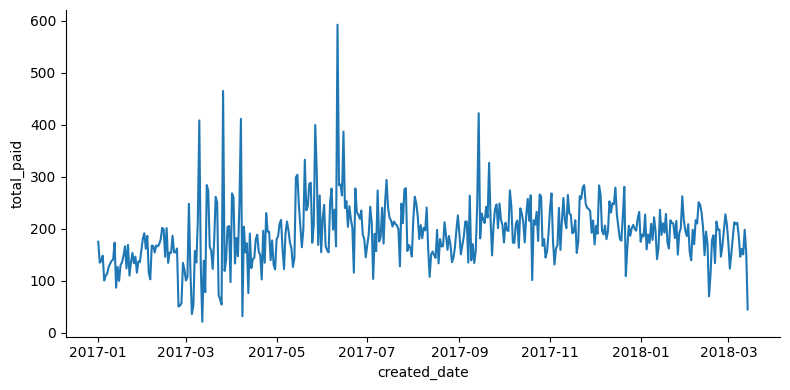

In [1123]:
sns.relplot(kind='line',
            data=avg_total_df,
             x='created_date',
             y='total_paid',
             height=4,
             aspect=2);

In [1124]:
orders_qu['created_date'] = pd.to_datetime(orders_qu['created_date'])
avg_total = orders_qu.groupby(orders_qu['created_date'].dt.to_period('M'))['total_paid'].mean().round(2)
avg_total_month_df = avg_total.to_frame()
avg_total_month_df

total_paid
created_date            
2017-01           135.01
2017-02           167.16
2017-03           153.23
2017-04           158.22
2017-05           202.26
2017-06           219.90
2017-07           198.61
2017-08           183.94
2017-09           210.62
2017-10           201.63
2017-11           244.05
2017-12           207.15
2018-01           195.24
2018-02           183.98
2018-03           168.56

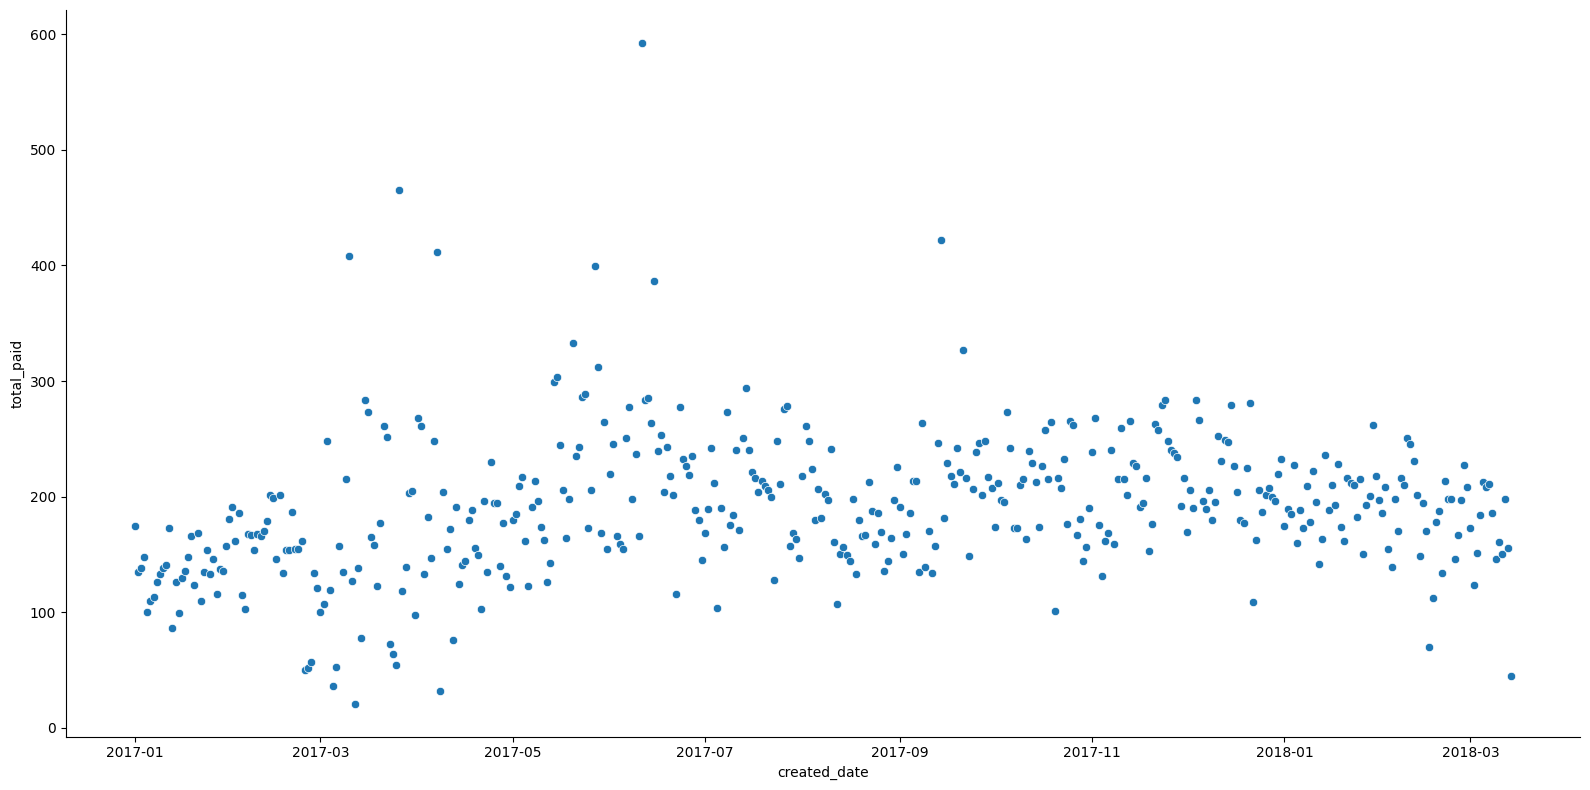

In [1125]:
# reponse tout collé

orders_qu['created_date'] = pd.to_datetime(orders_qu['created_date'])
avg_total = orders_qu.groupby(orders_qu['created_date'].dt.date)['total_paid'].mean().round(2)
avg_total_month_df = avg_total.to_frame()
avg_total_month_df

sns.relplot(data=avg_total_month_df,
             x='created_date',
             y='total_paid',
             height=8,
             aspect=2);

# 10 MOST REVENUE

In [1126]:
orders_qu

order_id        created_date  total_paid      state
0        241423 2017-11-06 13:10:02      136.15  Completed
1        242832 2017-12-31 17:40:03       15.76  Completed
2        243330 2017-02-16 10:59:38       84.98  Completed
3        245275 2017-06-28 11:35:37      149.00  Completed
4        245595 2017-01-21 12:52:47      112.97  Completed
...         ...                 ...         ...        ...
40980    527042 2018-03-14 11:47:50       18.98  Completed
40981    527070 2018-03-14 11:50:48       24.97  Completed
40982    527074 2018-03-14 11:51:42       24.97  Completed
40983    527096 2018-03-14 11:58:40       34.96  Completed
40984    527112 2018-03-14 12:03:52       14.98  Completed

[40985 rows x 4 columns]

In [1127]:
ol_p_no_outliers_df.product_quantity.value_counts()

1     45305
2      3011
3       440
4       251
5        82
6        46
10       26
8        17
7        13
9         9
12        5
27        3
20        3
18        3
14        2
16        2
21        2
35        2
15        2
33        1
11        1
30        1
50        1
32        1
37        1
13        1
72        1
Name: product_quantity, dtype: int64

In [1128]:
ol_p_no_outliers_df.query('product_quantity == 72')

id  id_order  product_id  product_quantity      sku  unit_price  \
49809  1436657    438871           0                72  SAN0186        8.65   

                     date                                         name  \
49809 2017-11-24 12:44:49  SanDisk Ultra 16GB microSDHC Memory Card A1   

                                                    desc  price promo_price  \
49809  Micro Memory Card with Adapter reading speed 9...   9.99     100.007   

       in_stock      type short_brand  Discount  Discount_%  
49809         1  57445397         SAN      1.00       10.00

In [1129]:
ol_p_no_outliers_df_revenue = ol_p_no_outliers_df.copy()

In [1130]:
ol_p_no_outliers_df_revenue['revenue'] = ol_p_no_outliers_df_revenue['unit_price'] * ol_p_no_outliers_df_revenue['product_quantity']

In [1131]:
ol_p_no_outliers_df_revenue.query('product_quantity == 72')

id  id_order  product_id  product_quantity      sku  unit_price  \
49809  1436657    438871           0                72  SAN0186        8.65   

                     date                                         name  \
49809 2017-11-24 12:44:49  SanDisk Ultra 16GB microSDHC Memory Card A1   

                                                    desc  price promo_price  \
49809  Micro Memory Card with Adapter reading speed 9...   9.99     100.007   

       in_stock      type short_brand  Discount  Discount_%  revenue  
49809         1  57445397         SAN      1.00       10.00   622.80

In [1132]:
most_revenue = ol_p_no_outliers_df.groupby("sku")[["unit_price"]].sum().sort_values(by="unit_price", ascending=False).head(10)

In [1133]:
ol_p_no_outliers_df_revenue

id  id_order  product_id  product_quantity        sku  unit_price  \
0      1119116    299545           0                 1    OWC0100       47.49   
1      1120182    299404           0                 1    OWC0100       47.49   
2      1121550    300650           0                 1    OWC0100       49.99   
3      1121801    300760           0                 1    OWC0100       49.99   
4      1124334    301975           0                 1    OWC0100       49.99   
...        ...       ...         ...               ...        ...         ...   
53225  1647125    525925           0                 1  GRT0371-A       35.09   
53226  1647280    526003           0                 1    NET0028      404.99   
53227  1647425    526066           0                 1    WAC0254       83.99   
53228  1647495    526093           0                 1    WAC0252       83.99   
53230  1648457    526512           0                 1  DLK0044-A       84.32   

                     date                                               name  \
0     2017-01-01 01:46:16  OWC In-line Digital Temperature Sensor Kit HDD...   
1     2017-01-01 22:50:39  OWC In-line Digital Temperature Sensor Kit HDD...   
2     2017-01-02 15:31:09  OWC In-line Digital Temperature Sensor Kit HDD...   
3     2017-01-02 17:20:31  OWC In-line Digital Temperature Sensor Kit HDD...   
4     2017-01-03 20:04:54  OWC In-line Digital Temperature Sensor Kit HDD...   
...                   ...                                                ...   
53225 2018-03-12 13:37:34  Open - Griffin Survivor All-Terrain iPad Mini ...   
53226 2018-03-12 15:59:19  Netgear Wifi Orbi System kit and satellite net...   
53227 2018-03-12 17:45:42  Education - Wacom Intuos Graphics Tablet S Blu...   
53228 2018-03-12 18:32:29  Education - Wacom Intuos Graphics Tablet S Blu...   
53230 2018-03-13 16:19:18  Open - D-Link DCS-5020L wireless surveillance ...   

                                                    desc  price promo_price  \
0      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
1      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
2      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
3      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
4      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
...                                                  ...    ...         ...   
53225  Reconditioned Case iPad Mini 4 ultra resistant...  59.99       35.09   
53226  System RBK50 Mesh WiFi network kit compact and... 429.99     404.987   
53227  small-edge graphics tablet with Bluetooth inte...  99.00     839.897   
53228  small-edge graphics tablet with Bluetooth inte...  99.00     839.897   
53230  Reconditioned surveillance camera with Wi-Fi r... 139.99     843.179   

       in_stock      type short_brand  Discount  Discount_%  revenue  
0             1  12755395         OWC     14.00       23.00    47.49  
1             1  12755395         OWC     14.00       23.00    47.49  
2             1  12755395         OWC     11.00       18.00    49.99  
3             1  12755395         OWC     11.00       18.00    49.99  
4             1  12755395         OWC     11.00       18.00    49.99  
...         ...       ...         ...       ...         ...      ...  
53225         0  12635403         GRT     25.00       42.00    35.09  
53226         0      1334         NET     25.00        6.00   404.99  
53227         1      1405         WAC     15.00       15.00    83.99  
53228         1      1405         WAC     15.00       15.00    83.99  
53230         0      9094         DLK     56.00       40.00    84.32  

[49232 rows x 17 columns]

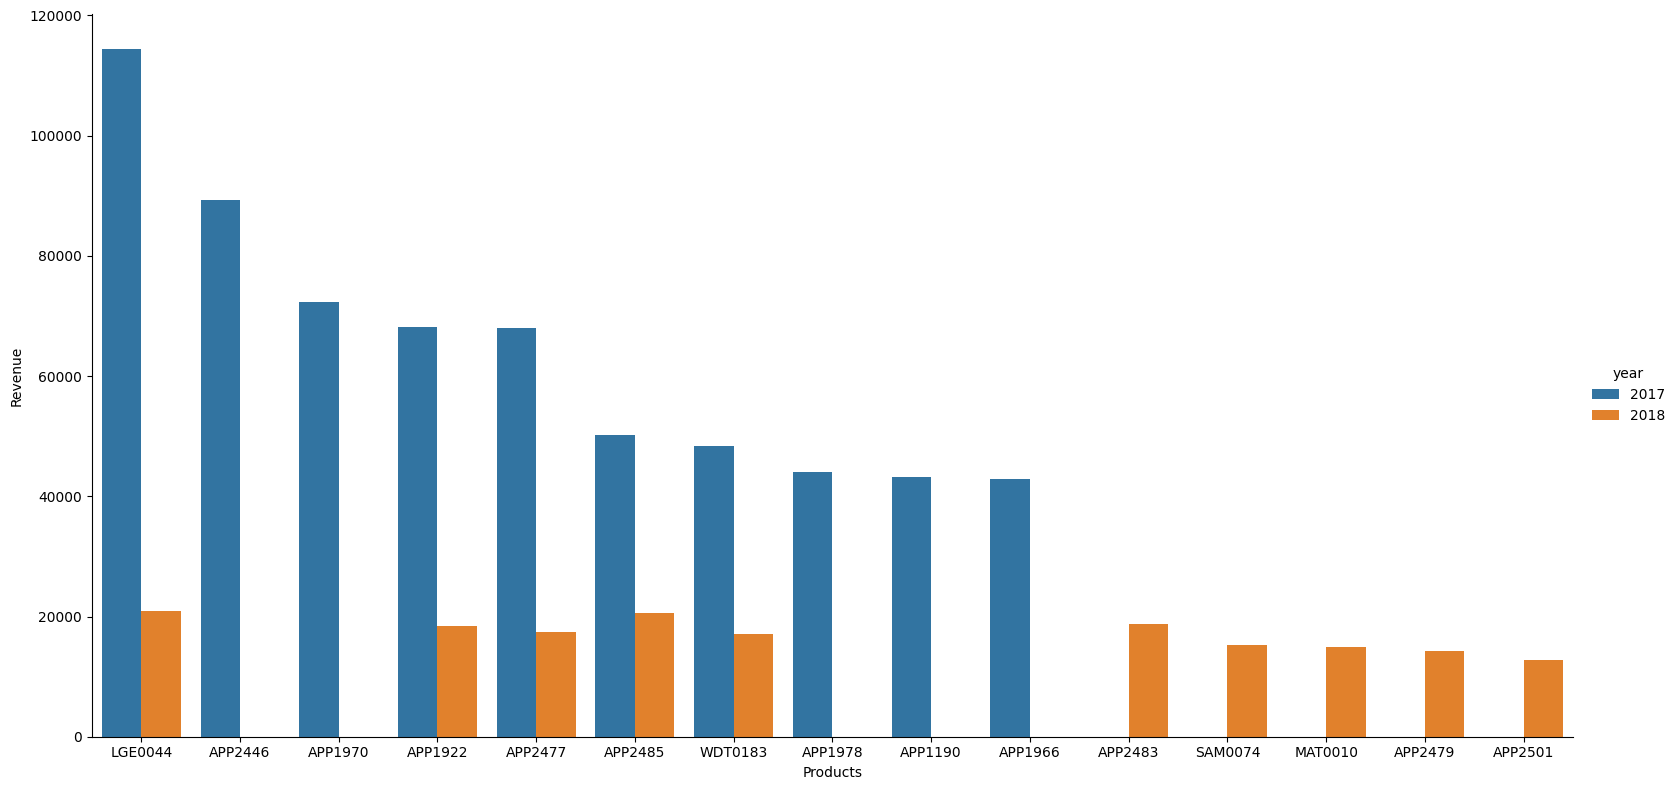

In [1134]:
ol_df.date = pd.to_datetime(ol_df['date'])

most_revenue_17 = (
    ol_p_no_outliers_df_revenue.query('date.dt.year == 2017')
    .groupby('sku', as_index=False)
    .agg({'date': 'first', 'revenue': 'sum'})
    .sort_values(by="revenue", ascending=False)
    .nlargest(10, 'revenue')

)

most_revenue_18 = (
    ol_p_no_outliers_df_revenue.query('date.dt.year == 2018')
    .groupby('sku', as_index=False)
    .agg({'date': 'first', 'revenue': 'sum'})
    .sort_values(by="revenue", ascending=False)
    .nlargest(10, 'revenue')
)

most_revenue_17_18 = pd.concat([most_revenue_17
                                               .assign(year=2017),
                                               most_revenue_18
                                               .assign(year=2018)])

sns.catplot(kind="bar",
            data=most_revenue_17_18,
            x="sku",
            y="revenue",
            hue='year',
            height=8,
            aspect=2)
plt.xlabel("Products")  # Ajouter un nom à l'axe x
plt.ylabel("Revenue");  # Ajouter un nom à l'axe y;

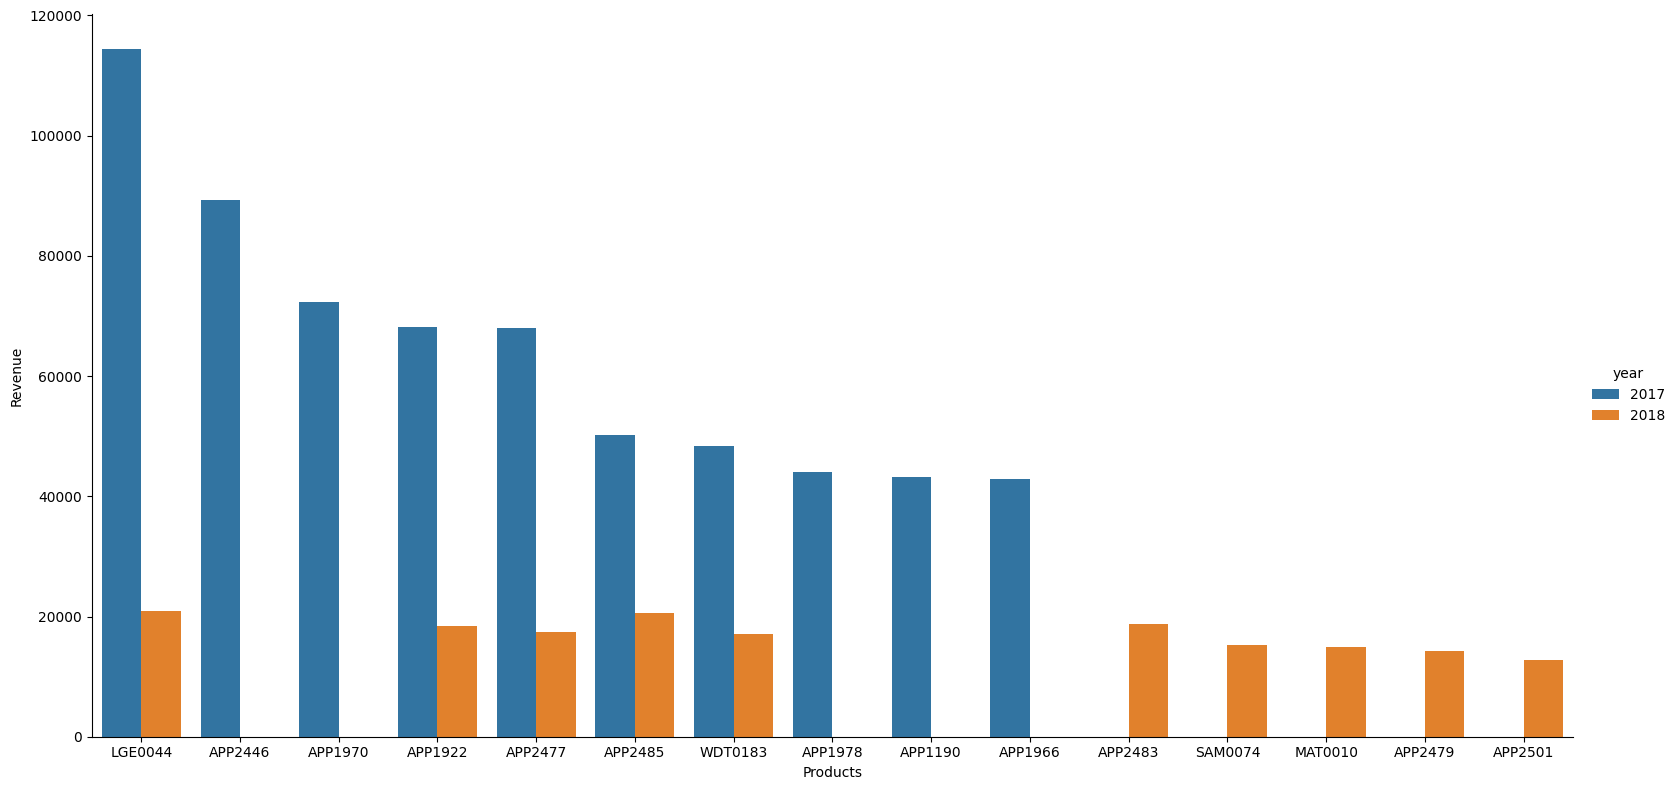

In [1135]:
ol_df.date = pd.to_datetime(ol_df['date'])

most_revenue_17 = (
    ol_p_no_outliers_df_revenue.query('date.dt.year == 2017')
    .groupby('sku', as_index=False)
    .agg({'date': 'first', 'revenue': 'sum'})
    .sort_values(by="revenue", ascending=False)
    .nlargest(10, 'revenue')

)

most_revenue_18 = (
    ol_p_no_outliers_df_revenue.query('date.dt.year == 2018')
    .groupby('sku', as_index=False)
    .agg({'date': 'first', 'revenue': 'sum'})
    .sort_values(by="revenue", ascending=False)
    .nlargest(10, 'revenue')
)

most_revenue_17_18 = pd.concat([most_revenue_17
                                               .assign(year=2017),
                                               most_revenue_18
                                               .assign(year=2018)])

sns.catplot(kind="bar",
            data=most_revenue_17_18,
            x="sku",
            y="revenue",
            hue='year',
            height=8,
            aspect=2)
plt.xlabel("Products")  # Ajouter un nom à l'axe x
plt.ylabel("Revenue");  # Ajouter un nom à l'axe y;

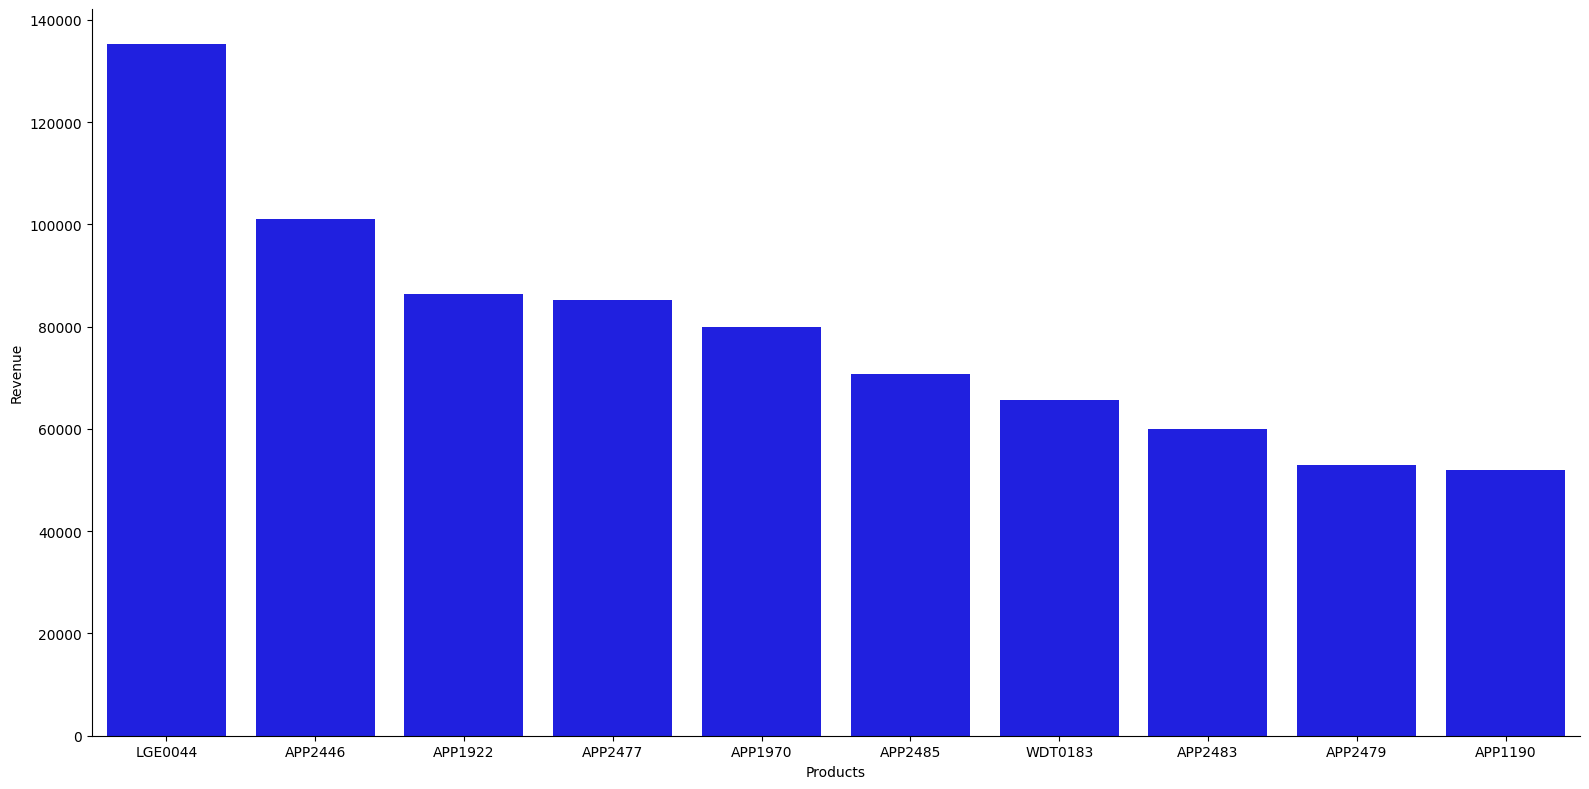

In [1136]:
most_revenue = (
    ol_p_no_outliers_df_revenue
    .groupby('sku', as_index=False)
    .agg({'revenue': 'sum'})
    .sort_values(by="revenue", ascending=False)
    .nlargest(10, 'revenue')
)

sns.catplot(kind="bar",
            data=most_revenue,
            x="sku",
            y="revenue",
            color = 'blue',
            height=8,
            aspect=2)
plt.xlabel("Products")  # Ajouter un nom à l'axe x
plt.ylabel("Revenue");  # Ajouter un nom à l'axe y;

In [1137]:
ol_p_no_outliers_df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49232 entries, 0 to 53230
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                49232 non-null  int64         
 1   id_order          49232 non-null  int64         
 2   product_id        49232 non-null  int64         
 3   product_quantity  49232 non-null  int64         
 4   sku               49232 non-null  object        
 5   unit_price        49232 non-null  float64       
 6   date              49232 non-null  datetime64[ns]
 7   name              49232 non-null  object        
 8   desc              49229 non-null  object        
 9   price             49232 non-null  float64       
 10  promo_price       49232 non-null  object        
 11  in_stock          49232 non-null  int64         
 12  type              49225 non-null  object        
 13  short_brand       49232 non-null  object        
 14  Discount          4923

#EXO QUE JE FAIS

In [1138]:
x = ol_p_no_outliers_df_revenue[ol_p_no_outliers_df_revenue['sku'].isin(most_revenue['sku'])][['sku','product_quantity','unit_price','price','Discount','Discount_%']]
x

sku  product_quantity  unit_price  price  Discount  Discount_%
710    WDT0183                 1      151.99 169.00     17.00       10.00
711    WDT0183                 3      151.99 169.00     17.00       10.00
712    WDT0183                 1      159.99 169.00      9.00        5.00
713    WDT0183                 1      159.99 169.00      9.00        5.00
714    WDT0183                 1      159.99 169.00      9.00        5.00
...        ...               ...         ...    ...       ...         ...
45535  APP2479                 1      786.00 809.00     23.00        3.00
45536  APP2479                 1      786.00 809.00     23.00        3.00
45537  APP2479                 1      786.00 809.00     23.00        3.00
45538  APP2479                 1      793.00 809.00     16.00        2.00
45539  APP2479                 1      793.00 809.00     16.00        2.00

[2646 rows x 6 columns]

In [1139]:
x.groupby("sku")[["Discount","Discount_%"]].mean()

Discount  Discount_%
sku                          
APP1190     15.56       22.16
APP1922     17.86        9.99
APP1970     56.84       13.40
APP2446     61.53       13.48
APP2477     19.15        2.36
APP2479     18.36        2.27
APP2483     23.10        2.32
APP2485     23.90        2.41
LGE0044     31.85        5.28
WDT0183     31.04       18.34

In [1140]:
x['total_paid'] = x['unit_price'] * x['product_quantity']
x

sku  product_quantity  unit_price  price  Discount  Discount_%  \
710    WDT0183                 1      151.99 169.00     17.00       10.00   
711    WDT0183                 3      151.99 169.00     17.00       10.00   
712    WDT0183                 1      159.99 169.00      9.00        5.00   
713    WDT0183                 1      159.99 169.00      9.00        5.00   
714    WDT0183                 1      159.99 169.00      9.00        5.00   
...        ...               ...         ...    ...       ...         ...   
45535  APP2479                 1      786.00 809.00     23.00        3.00   
45536  APP2479                 1      786.00 809.00     23.00        3.00   
45537  APP2479                 1      786.00 809.00     23.00        3.00   
45538  APP2479                 1      793.00 809.00     16.00        2.00   
45539  APP2479                 1      793.00 809.00     16.00        2.00   

       total_paid  
710        151.99  
711        455.97  
712        159.99  
713        159.99  
714        159.99  
...           ...  
45535      786.00  
45536      786.00  
45537      786.00  
45538      793.00  
45539      793.00  

[2646 rows x 7 columns]

In [1141]:
sum(x.Discount > 0), sum(x.Discount <= 0)

(2574, 72)

In [1142]:
filtered_x = x[x['Discount'] > 0]
filtered_x

sku  product_quantity  unit_price  price  Discount  Discount_%  \
710    WDT0183                 1      151.99 169.00     17.00       10.00   
711    WDT0183                 3      151.99 169.00     17.00       10.00   
712    WDT0183                 1      159.99 169.00      9.00        5.00   
713    WDT0183                 1      159.99 169.00      9.00        5.00   
714    WDT0183                 1      159.99 169.00      9.00        5.00   
...        ...               ...         ...    ...       ...         ...   
45535  APP2479                 1      786.00 809.00     23.00        3.00   
45536  APP2479                 1      786.00 809.00     23.00        3.00   
45537  APP2479                 1      786.00 809.00     23.00        3.00   
45538  APP2479                 1      793.00 809.00     16.00        2.00   
45539  APP2479                 1      793.00 809.00     16.00        2.00   

       total_paid  
710        151.99  
711        455.97  
712        159.99  
713        159.99  
714        159.99  
...           ...  
45535      786.00  
45536      786.00  
45537      786.00  
45538      793.00  
45539      793.00  

[2574 rows x 7 columns]

In [1143]:
filtered_x_sku = filtered_x.groupby('sku', as_index=False).agg({'total_paid': 'sum'})
filtered_x_sku = filtered_x_sku.sort_values(by="total_paid", ascending=False).nlargest(10, 'total_paid')

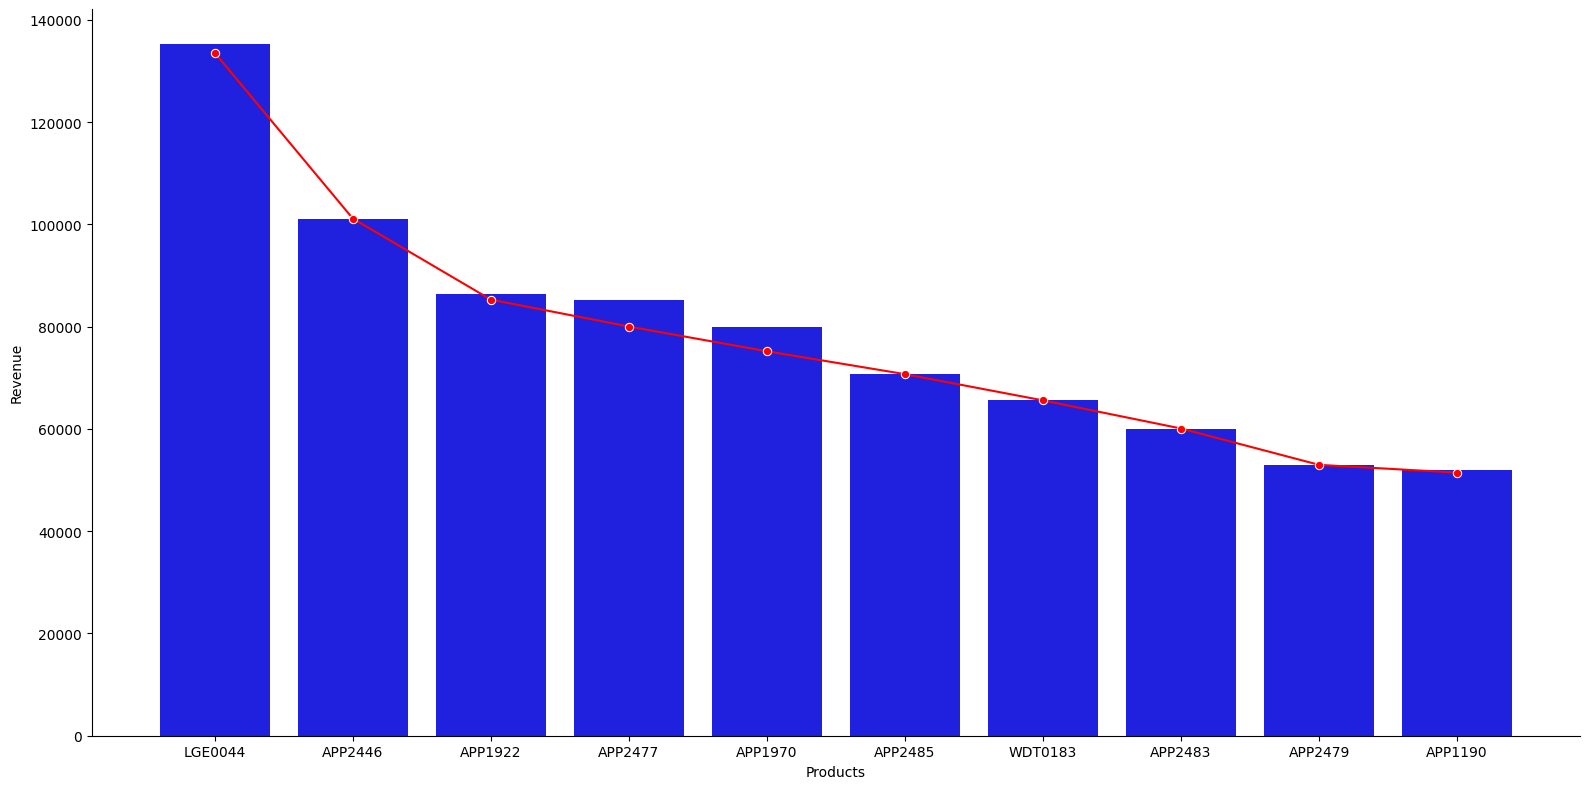

In [1144]:
most_revenue = (
    ol_p_no_outliers_df_revenue
    .groupby('sku', as_index=False)
    .agg({'revenue': 'sum', 'Discount_%': 'mean'})
    .sort_values(by="revenue", ascending=False)
    .nlargest(10, 'revenue')
)

sns.catplot(kind="bar", data=most_revenue, x="sku", y="revenue", color='blue', height=8, aspect=2)
sns.lineplot(data=filtered_x_sku, x="sku", y="total_paid", color='red', marker='o')
plt.xlabel("Products")
plt.ylabel("Revenue")
plt.show()


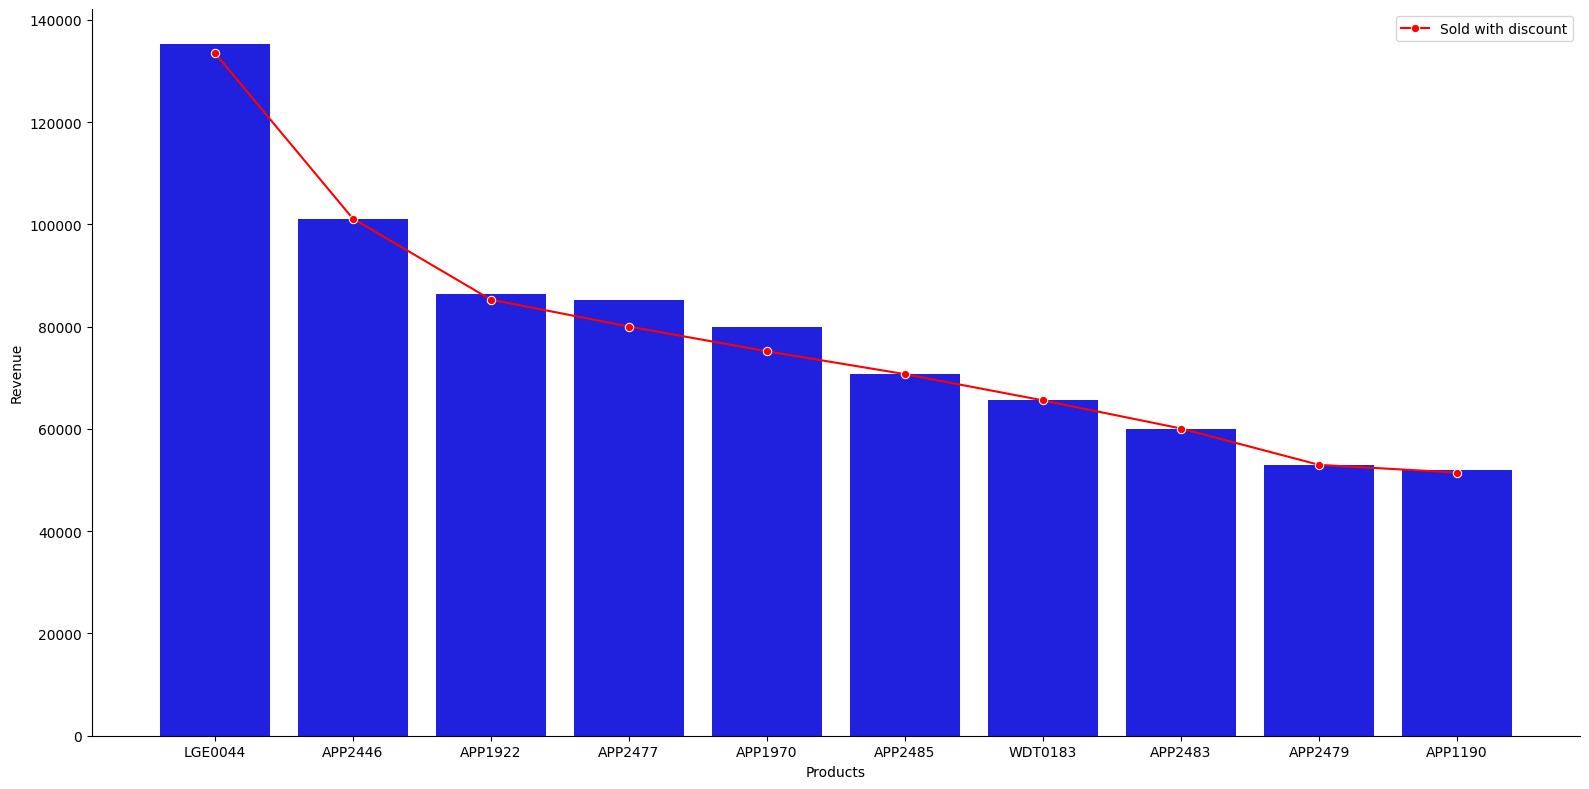

In [1145]:
most_revenue = (
    ol_p_no_outliers_df_revenue
    .groupby('sku', as_index=False)
    .agg({'revenue': 'sum', 'Discount_%': 'mean'})
    .sort_values(by="revenue", ascending=False)
    .nlargest(10, 'revenue')
)

sns.catplot(kind="bar", data=most_revenue, x="sku", y="revenue", color='blue', height=8, aspect=2)
sns.lineplot(data=filtered_x_sku, x="sku", y="total_paid", color='red', marker='o', label='Sold with discount')
plt.xlabel("Products")
plt.ylabel("Revenue")
plt.show()


In [1146]:
filtered_x_fp = x[x['Discount'] <= 0]
filtered_x_fp

sku  product_quantity  unit_price  price  Discount  Discount_%  \
12307  APP1190                 1       70.00  70.00      0.00        0.00   
12336  APP1190                 1       70.00  70.00      0.00        0.00   
12337  APP1190                 1       70.00  70.00      0.00        0.00   
12338  APP1190                 1       70.00  70.00      0.00        0.00   
12339  APP1190                 1       70.00  70.00      0.00        0.00   
12340  APP1190                 1       70.00  70.00      0.00        0.00   
12341  APP1190                 1       70.00  70.00      0.00        0.00   
18143  LGE0044                 1      599.99 599.00     -1.00       -0.00   
18144  LGE0044                 1      599.99 599.00     -1.00       -0.00   
18145  LGE0044                 1      599.99 599.00     -1.00       -0.00   
37449  APP1922                 1      179.00 179.00      0.00        0.00   
37450  APP1922                 1      179.00 179.00      0.00        0.00   
37451  APP1922                 1      179.00 179.00      0.00        0.00   
37452  APP1922                 1      179.00 179.00      0.00        0.00   
37453  APP1922                 1      179.00 179.00      0.00        0.00   
37454  APP1922                 1      179.00 179.00      0.00        0.00   
37455  APP1922                 1      179.00 179.00      0.00        0.00   
37456  APP1922                 1      179.00 179.00      0.00        0.00   
37457  APP1922                 1      179.00 179.00      0.00        0.00   
37458  APP1922                 1      179.00 179.00      0.00        0.00   
37459  APP1922                 1      179.00 179.00      0.00        0.00   
37460  APP1922                 1      179.00 179.00      0.00        0.00   
37461  APP1922                 1      179.00 179.00      0.00        0.00   
37462  APP1922                 1      179.00 179.00      0.00        0.00   
37463  APP1922                 1      179.00 179.00      0.00        0.00   
37464  APP1922                 1      179.00 179.00      0.00        0.00   
37465  APP1922                 1      179.00 179.00      0.00        0.00   
37466  APP1922                 1      179.00 179.00      0.00        0.00   
37467  APP1922                 1      179.00 179.00      0.00        0.00   
37468  APP1922                 1      179.00 179.00      0.00        0.00   
37469  APP1922                 1      179.00 179.00      0.00        0.00   
37470  APP1922                 1      179.00 179.00      0.00        0.00   
37471  APP1922                 1      179.00 179.00      0.00        0.00   
37472  APP1922                 1      179.00 179.00      0.00        0.00   
37473  APP1922                 1      179.00 179.00      0.00        0.00   
37474  APP1922                 1      179.00 179.00      0.00        0.00   
37475  APP1922                 1      179.00 179.00      0.00        0.00   
37476  APP1922                 1      179.00 179.00      0.00        0.00   
37477  APP1922                 1      179.00 179.00      0.00        0.00   
37478  APP1922                 1      179.00 179.00      0.00        0.00   
37479  APP1922                 1      179.00 179.00      0.00        0.00   
37480  APP1922                 1      179.00 179.00      0.00        0.00   
37481  APP1922                 1      179.00 179.00      0.00        0.00   
37482  APP1922                 1      179.00 179.00      0.00        0.00   
37483  APP1922                 1      179.00 179.00      0.00        0.00   
37484  APP1922                 1      179.00 179.00      0.00        0.00   
37485  APP1922                 1      179.00 179.00      0.00        0.00   
37486  APP1922                 1      179.00 179.00      0.00        0.00   
37487  APP1922                 1      179.00 179.00      0.00        0.00   
37488  APP1922                 1      179.00 179.00      0.00        0.00   
37489  APP1922                 1      179.00 179.00      0.00        0.00   
37490  

In [1147]:
filtered_x_fp_sku = filtered_x_fp.groupby('sku', as_index=False).agg({'total_paid': 'sum'})
filtered_x_fp_sku = filtered_x_fp_sku.sort_values(by="total_paid", ascending=False).nlargest(10, 'total_paid')

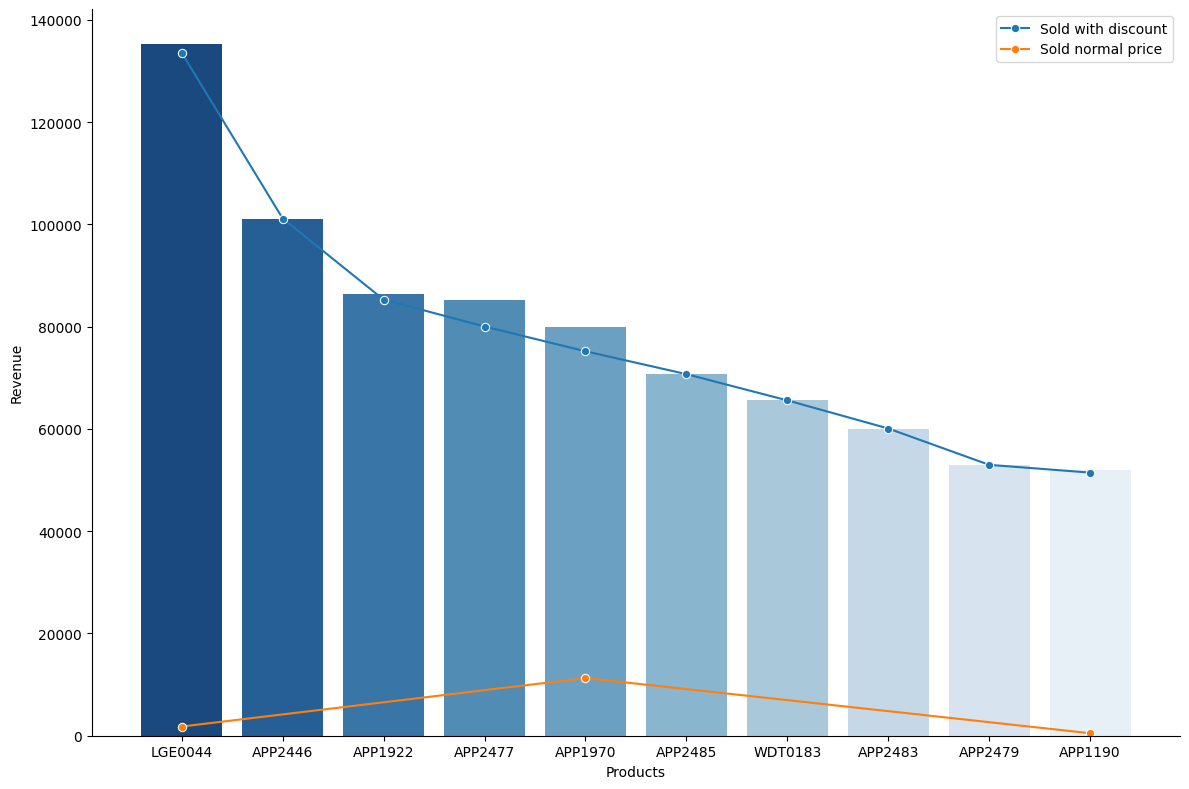

In [1148]:
sns.catplot(kind="bar",
            data=most_revenue,
            x="sku",
            y="revenue",
            color='blue',
            palette='Blues_r',
            height=8,
            aspect=1.5)

sns.lineplot(data=filtered_x_sku,
             x="sku",
             y="total_paid",
             marker='o',
             label='Sold with discount')

sns.lineplot(data=filtered_x_fp_sku,
             x="sku",
             y="total_paid",
             marker='o',
             label='Sold normal price')
plt.xlabel("Products")
plt.ylabel("Revenue")
plt.show()


In [1149]:
filtered_x_fp
revenue_no_disc = (
    filtered_x_fp
    .groupby('sku', as_index=False)
    .agg({'total_paid': 'sum'})
    .sort_values(by="total_paid", ascending=False)
    .nlargest(10, 'total_paid')
)

revenue_no_disc

sku  total_paid
1  APP1922    11277.00
2  LGE0044     1799.97
0  APP1190      490.00

In [1150]:
filtered_x
revenue_disc = (
    filtered_x
    .groupby('sku', as_index=False)
    .agg({'total_paid': 'sum', 'Discount_%': 'mean'})
    .sort_values(by="total_paid", ascending=False)
    .nlargest(10, 'total_paid')
)

revenue_disc


sku  total_paid  Discount_%
8  LGE0044   133575.86        5.36
3  APP2446   101161.16       13.48
4  APP2477    85301.93        2.36
2  APP1970    80037.41       13.40
1  APP1922    75196.26       11.37
7  APP2485    70721.79        2.41
9  WDT0183    65589.96       18.34
6  APP2483    60090.08        2.32
5  APP2479    52981.19        2.27
0  APP1190    51464.97       22.34

In [1151]:
revenue_disc['Discount_%'].mean()

9.366798354766754

In [1152]:
part_revenue = (revenue_no_disc['total_paid'].sum()/revenue_disc['total_paid'].sum()) *100
part_revenue

1.7480491852935078

#MEME CHOSE QUE L'EXO AU DESSUS MAIS AVEC 10 SOLD

In [1153]:
nb = ol_p_no_outliers_df_revenue[ol_p_no_outliers_df_revenue['sku'].isin(products_10_most_sold['sku'])][['sku','product_quantity','unit_price','price','Discount','Discount_%']]
nb

sku  product_quantity  unit_price  price  Discount  Discount_%
710    WDT0183                 1      151.99 169.00     17.00       10.00
711    WDT0183                 3      151.99 169.00     17.00       10.00
712    WDT0183                 1      159.99 169.00      9.00        5.00
713    WDT0183                 1      159.99 169.00      9.00        5.00
714    WDT0183                 1      159.99 169.00      9.00        5.00
...        ...               ...         ...    ...       ...         ...
42005  APP2446                 1      382.00 449.33     67.00       15.00
42006  APP2446                 1      382.00 449.33     67.00       15.00
42007  APP2446                 1      379.00 449.33     70.00       16.00
42008  APP2446                 1      379.00 449.33     70.00       16.00
42009  APP2446                 1      379.00 449.33     70.00       16.00

[3708 rows x 6 columns]

In [1154]:
sum(nb.Discount > 0), sum(nb.Discount <= 0)

(3625, 83)

In [1155]:
filtered_nb = nb[nb['Discount'] > 0]
filtered_nb

sku  product_quantity  unit_price  price  Discount  Discount_%
710    WDT0183                 1      151.99 169.00     17.00       10.00
711    WDT0183                 3      151.99 169.00     17.00       10.00
712    WDT0183                 1      159.99 169.00      9.00        5.00
713    WDT0183                 1      159.99 169.00      9.00        5.00
714    WDT0183                 1      159.99 169.00      9.00        5.00
...        ...               ...         ...    ...       ...         ...
42005  APP2446                 1      382.00 449.33     67.00       15.00
42006  APP2446                 1      382.00 449.33     67.00       15.00
42007  APP2446                 1      379.00 449.33     70.00       16.00
42008  APP2446                 1      379.00 449.33     70.00       16.00
42009  APP2446                 1      379.00 449.33     70.00       16.00

[3625 rows x 6 columns]

In [1156]:
filtered_nb_sku = filtered_nb.groupby('sku', as_index=False).agg({'product_quantity': 'sum'})
filtered_nb_sku = filtered_nb_sku.sort_values(by="product_quantity", ascending=False).nlargest(10, 'product_quantity')

In [1157]:
nb = ol_p_no_outliers_df_revenue[ol_p_no_outliers_df_revenue['sku'].isin(products_10_most_sold['sku'])][['sku','product_quantity','unit_price','price','Discount','Discount_%']]

sum(nb.Discount > 0), sum(nb.Discount <= 0)

filtered_nb = nb[nb['Discount'] > 0]
filtered_nb

filtered_nb_fp = nb[nb['Discount'] <= 0]

In [1158]:
filtered_nb
quantity_disc = (
    filtered_nb
    .groupby('sku', as_index=False)
    .agg({'product_quantity': 'sum', 'Discount_%': 'mean'})
    .sort_values(by="product_quantity", ascending=False)
    .nlargest(10, 'product_quantity')
)

quantity_disc

sku  product_quantity  Discount_%
2  APP1190               948       22.34
0  APP0698               820       60.04
1  APP0927               489       51.02
9  WDT0183               476       18.34
3  APP1922               474       11.37
8  SAM0074               329       15.20
6  CRU0051               309       15.25
4  APP2446               261       13.48
7  NTE0013               252       27.80
5  CRU0050               248       11.79

In [1159]:
quantity_disc['Discount_%'].mean()

24.663414507670375

In [1160]:
filtered_nb_fp = nb[nb['Discount'] <= 0]
filtered_nb_fp
filtered_nb
quantity_disc_fp = (
    filtered_nb_fp
    .groupby('sku', as_index=False)
    .agg({'product_quantity': 'sum', 'Discount_%': 'mean'})
    .sort_values(by="product_quantity", ascending=False)
    .nlargest(10, 'product_quantity')
)

quantity_disc_fp

sku  product_quantity  Discount_%
1  APP1922                63        0.00
2  CRU0051                19        0.00
0  APP1190                 7        0.00

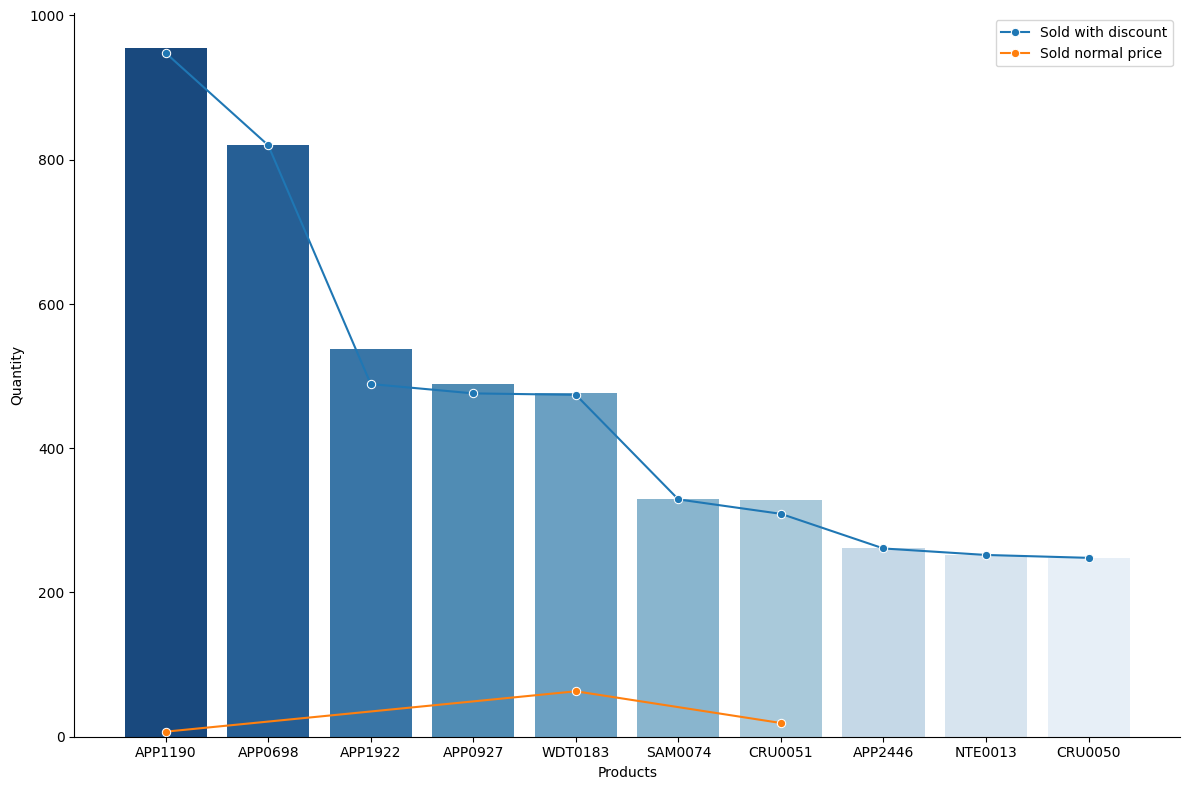

In [1161]:
ol_df.date = pd.to_datetime(ol_df['date'])

products_10_most_sold = (
    ol_p_no_outliers_df_revenue.groupby('sku', as_index=False)
    .agg({'product_quantity': 'sum'})
    .nlargest(10, 'product_quantity')
    [['sku', 'product_quantity']]
)

sns.catplot(kind="bar",
            data=products_10_most_sold,
            x="sku",
            y="product_quantity",
            palette = 'Blues_r',
            height=8,
            aspect=1.5);

sns.lineplot(data=filtered_nb_sku,
             x="sku",
             y="product_quantity",
             marker='o',
             label='Sold with discount')

sns.lineplot(data=quantity_disc_fp,
             x="sku",
             y="product_quantity",
             marker='o',
             label='Sold normal price')

plt.xlabel("Products")
plt.ylabel("Quantity");



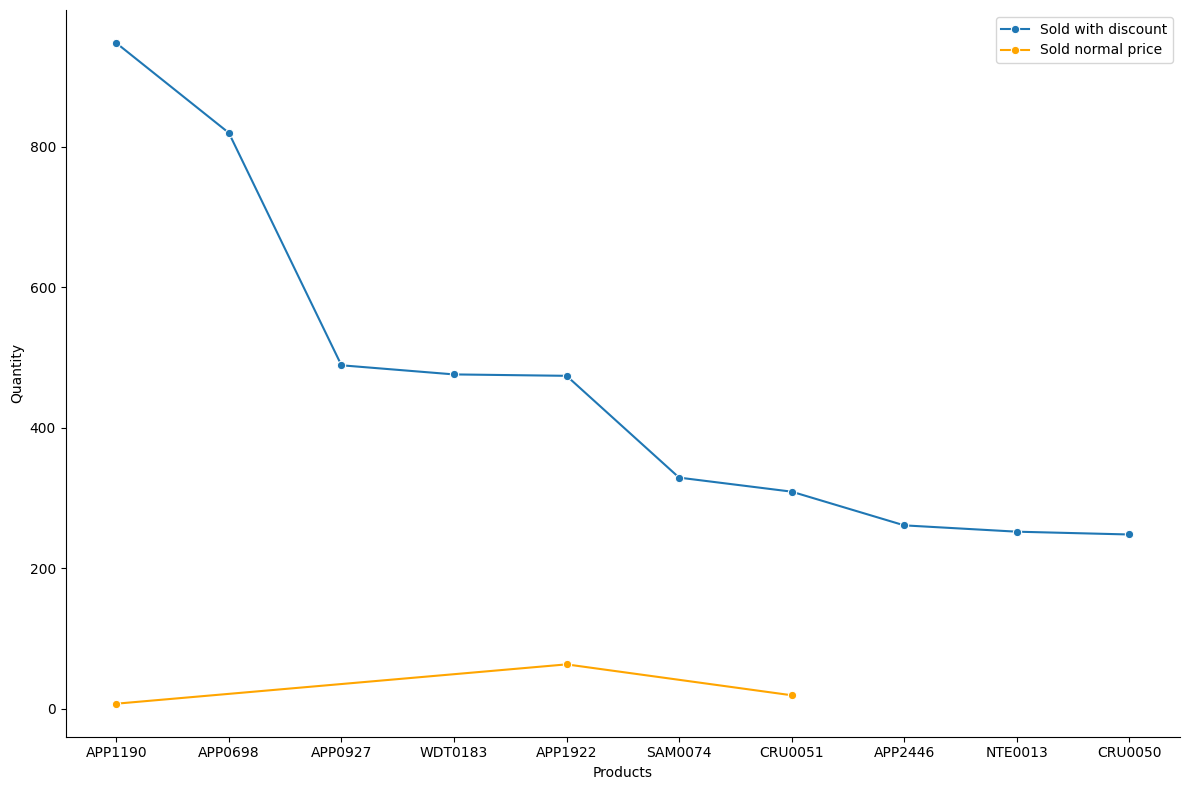

In [1162]:
ol_df.date = pd.to_datetime(ol_df['date'])

products_10_most_sold = (
    ol_df.groupby('sku', as_index=False)
    .agg({'product_quantity': 'sum'})
    .nlargest(10, 'product_quantity')
    [['sku', 'product_quantity']]
)



sns.relplot(kind='line',
            data=filtered_nb_sku,
            x="sku",
            y="product_quantity",
            marker='o',
            label='Sold with discount',
            palette='Blues_r',
            height=8,
            aspect=1.5)

sns.lineplot(data=quantity_disc_fp,
             x="sku",
             y="product_quantity",
             marker='o',
             color='orange',
             label='Sold normal price')

plt.xlabel("Products")
plt.ylabel("Quantity");


In [1163]:
present_skus = most_revenue_17_18['sku'].isin(products_10_most_disc_17_18['sku']) | most_revenue_17_18['sku'].isin(products_10_most_sold_17_18['sku'])

matching_skus = most_revenue_17_18[present_skus]['sku'].unique()

for sku in matching_skus:
    print(f"Le SKU {sku} est présent dans au moins l'un des deux autres DataFrames.")


Le SKU APP2446 est présent dans au moins l'un des deux autres DataFrames.
Le SKU APP1922 est présent dans au moins l'un des deux autres DataFrames.
Le SKU WDT0183 est présent dans au moins l'un des deux autres DataFrames.
Le SKU APP1190 est présent dans au moins l'un des deux autres DataFrames.
Le SKU SAM0074 est présent dans au moins l'un des deux autres DataFrames.
Le SKU MAT0010 est présent dans au moins l'un des deux autres DataFrames.


In [1164]:
if most_revenue_17_18['sku'].isin(products_10_most_disc_17_18['sku']).any() or most_revenue_17_18['sku'].isin(products_10_most_sold_17_18['sku']).any():
    for sku in most_revenue_17_18['sku']:
        relation = ""
        if sku in products_10_most_disc_17_18['sku'].values:
            relation += " in products_10_most_disc_17_18 "
        if sku in products_10_most_sold_17_18['sku'].values:
            relation += " in products_10_most_sold_17_18 df3"
        if relation:
            print(f"product {sku} is {relation}.")



product APP2446 is  in products_10_most_sold_17_18 df3.
product APP1922 is  in products_10_most_sold_17_18 df3.
product WDT0183 is  in products_10_most_sold_17_18 df3.
product APP1190 is  in products_10_most_sold_17_18 df3.
product APP1922 is  in products_10_most_sold_17_18 df3.
product WDT0183 is  in products_10_most_sold_17_18 df3.
product SAM0074 is  in products_10_most_sold_17_18 df3.
product MAT0010 is  in products_10_most_sold_17_18 df3.


In [1165]:
if products_10_most_disc_17_18['sku'].isin(most_revenue_17_18['sku']).any() or products_10_most_disc_17_18['sku'].isin(products_10_most_sold_17_18['sku']).any():
    for sku in products_10_most_disc_17_18['sku']:
        relation = ""
        if sku in most_revenue_17_18['sku'].values:
            relation += " in most_revenue_17_18 "
        if sku in products_10_most_sold_17_18['sku'].values:
            relation += " in products_10_most_sold_17_18 df3"
        if relation:
            print(f"product {sku} is {relation}.")



In [1166]:
if products_10_most_sold_17_18['sku'].isin(most_revenue_17_18['sku']).any() or products_10_most_sold_17_18['sku'].isin(products_10_most_disc_17_18['sku']).any():
    for sku in products_10_most_sold_17_18['sku']:
        relation = ""
        if sku in most_revenue_17_18['sku'].values:
            relation += " in most_revenue_17_18 "
        if sku in products_10_most_disc_17_18['sku'].values:
            relation += " in products_10_most_disc_17_18 df3"
        if relation:
            print(f"product {sku} is {relation}.")



product APP1190 is  in most_revenue_17_18 .
product APP1922 is  in most_revenue_17_18 .
product WDT0183 is  in most_revenue_17_18 .
product APP2446 is  in most_revenue_17_18 .
product SAM0074 is  in most_revenue_17_18 .
product MAT0010 is  in most_revenue_17_18 .
product APP1190 is  in most_revenue_17_18 .
product WDT0183 is  in most_revenue_17_18 .
product APP1922 is  in most_revenue_17_18 .
product SAM0074 is  in most_revenue_17_18 .


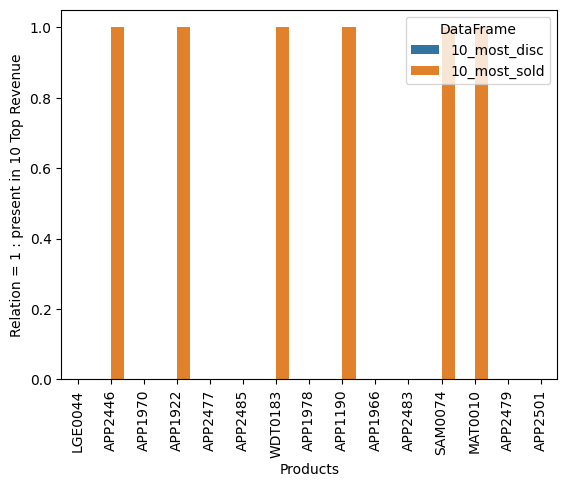

In [1167]:
most_revenue_17_18['10_most_disc'] = most_revenue_17_18['sku'].isin(products_10_most_disc_17_18['sku'])
most_revenue_17_18['10_most_sold'] = most_revenue_17_18['sku'].isin(products_10_most_sold_17_18['sku'])

df_relation = most_revenue_17_18[['sku', '10_most_disc', '10_most_sold']]

# Melt the DataFrame to convert 'present_in_products_10_most_disc_17_18' and 'present_in_products_10_most_sold_17_18' into a single column
df_relation_melted = df_relation.melt(id_vars='sku', var_name='DataFrame', value_name='Relation')

sns.barplot(data=df_relation_melted,
            x='sku',
            y='Relation',
            hue='DataFrame')
plt.xlabel('Products')
plt.ylabel('Relation = 1 : present in 10 Top Revenue')
plt.xticks(rotation=90);

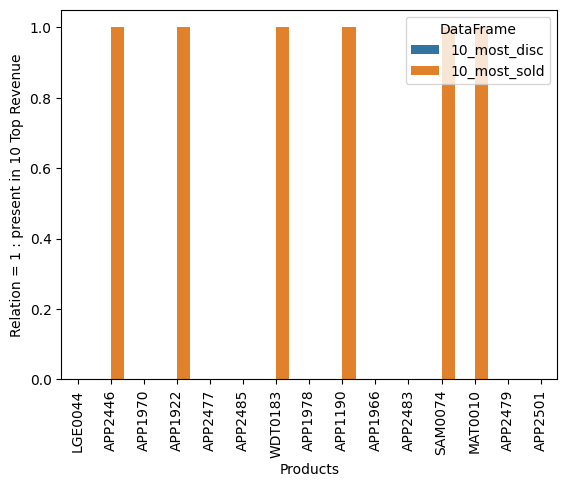

In [1168]:
most_revenue_17_18['10_most_disc'] = most_revenue_17_18['sku'].isin(products_10_most_disc_17_18['sku'])
most_revenue_17_18['10_most_sold'] = most_revenue_17_18['sku'].isin(products_10_most_sold_17_18['sku'])

df_relation = most_revenue_17_18[['sku', '10_most_disc', '10_most_sold']]

# Melt the DataFrame to convert 'present_in_products_10_most_disc_17_18' and 'present_in_products_10_most_sold_17_18' into a single column
df_relation_melted = df_relation.melt(id_vars='sku', var_name='DataFrame', value_name='Relation')

sns.barplot(data=df_relation_melted,
            x='sku',
            y='Relation',
            hue='DataFrame')
plt.xlabel('Products')
plt.ylabel('Relation = 1 : present in 10 Top Revenue')
plt.xticks(rotation=90);

In [1169]:
most_revenue_17_18

sku                date   revenue  year  10_most_disc  10_most_sold
1920  LGE0044 2017-01-05 19:27:47 114493.50  2017         False         False
576   APP2446 2017-07-13 18:27:39  89375.08  2017         False          True
491   APP1970 2017-04-23 13:12:48  72292.56  2017         False         False
483   APP1922 2017-05-09 12:00:01  68129.71  2017         False          True
581   APP2477 2017-09-25 18:53:42  67946.93  2017         False         False
589   APP2485 2017-09-25 13:41:13  50214.79  2017         False         False
3948  WDT0183 2017-01-01 12:00:57  48420.49  2017         False          True
501   APP1978 2017-04-17 22:10:07  44085.75  2017         False         False
300   APP1190 2017-01-02 23:46:35  43221.39  2017         False          True
487   APP1966 2017-04-22 20:28:32  42884.27  2017         False         False
1038  LGE0044 2018-01-01 21:54:24  20882.33  2018         False         False
288   APP2485 2018-01-02 21:48:46  20507.00  2018         False         False
286   APP2483 2018-01-02 16:37:11  18748.85  2018         False         False
223   APP1922 2018-01-29 14:02:46  18343.55  2018         False          True
279   APP2477 2018-01-02 11:38:03  17355.00  2018         False         False
2220  WDT0183 2018-01-02 10:39:17  17169.47  2018         False          True
1711  SAM0074 2018-01-01 17:50:32  15308.94  2018         False          True
1134  MAT0010 2018-01-01 13:54:23  15010.82  2018         False          True
281   APP2479 2018-01-03 08:28:06  14183.00  2018         False         False
301   APP2501 2018-01-01 18:57:08  12842.03  2018         False         False

In [1170]:
products_10_most_disc_17_18

sku                date  Discount_%  year
84      AP20124 2017-08-07 16:57:21       86.00  2017
1290    GRT0459 2017-06-30 12:02:51       84.50  2017
1944  LIF0038-A 2017-01-29 12:37:20       84.00  2017
1295    GRT0465 2017-06-19 20:46:39       83.50  2017
2391  NTE0039-A 2017-01-11 13:57:37       83.50  2017
85      AP20125 2017-09-18 13:54:50       83.00  2017
1294    GRT0464 2017-04-12 08:53:11       82.87  2017
1296    GRT0466 2017-04-12 10:22:19       82.05  2017
2636    OWC0087 2017-06-09 08:43:03       82.00  2017
1292    GRT0462 2017-05-11 08:50:29       81.78  2017
1156    MOP0107 2018-02-15 22:20:40       90.04  2018
1157    MOP0108 2018-02-16 09:01:04       89.75  2018
1158    MOP0109 2018-02-07 20:32:45       88.80  2018
1312  NTE0039-A 2018-02-03 15:18:06       87.00  2018
49      AP20124 2018-01-01 22:13:30       86.00  2018
720     GRT0464 2018-01-09 23:00:12       84.87  2018
1313  NTE0040-A 2018-01-19 09:09:29       83.00  2018
1380  OTT0126-A 2018-01-19 11:33:36       80.00  2018
1321    NTE0058 2018-01-19 16:51:40       79.00  2018
1315    NTE0046 2018-01-01 12:07:36       78.43  2018

In [1171]:
ol_p_no_outliers_df

id  id_order  product_id  product_quantity        sku  unit_price  \
0      1119116    299545           0                 1    OWC0100       47.49   
1      1120182    299404           0                 1    OWC0100       47.49   
2      1121550    300650           0                 1    OWC0100       49.99   
3      1121801    300760           0                 1    OWC0100       49.99   
4      1124334    301975           0                 1    OWC0100       49.99   
...        ...       ...         ...               ...        ...         ...   
53225  1647125    525925           0                 1  GRT0371-A       35.09   
53226  1647280    526003           0                 1    NET0028      404.99   
53227  1647425    526066           0                 1    WAC0254       83.99   
53228  1647495    526093           0                 1    WAC0252       83.99   
53230  1648457    526512           0                 1  DLK0044-A       84.32   

                     date                                               name  \
0     2017-01-01 01:46:16  OWC In-line Digital Temperature Sensor Kit HDD...   
1     2017-01-01 22:50:39  OWC In-line Digital Temperature Sensor Kit HDD...   
2     2017-01-02 15:31:09  OWC In-line Digital Temperature Sensor Kit HDD...   
3     2017-01-02 17:20:31  OWC In-line Digital Temperature Sensor Kit HDD...   
4     2017-01-03 20:04:54  OWC In-line Digital Temperature Sensor Kit HDD...   
...                   ...                                                ...   
53225 2018-03-12 13:37:34  Open - Griffin Survivor All-Terrain iPad Mini ...   
53226 2018-03-12 15:59:19  Netgear Wifi Orbi System kit and satellite net...   
53227 2018-03-12 17:45:42  Education - Wacom Intuos Graphics Tablet S Blu...   
53228 2018-03-12 18:32:29  Education - Wacom Intuos Graphics Tablet S Blu...   
53230 2018-03-13 16:19:18  Open - D-Link DCS-5020L wireless surveillance ...   

                                                    desc  price promo_price  \
0      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
1      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
2      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
3      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
4      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
...                                                  ...    ...         ...   
53225  Reconditioned Case iPad Mini 4 ultra resistant...  59.99       35.09   
53226  System RBK50 Mesh WiFi network kit compact and... 429.99     404.987   
53227  small-edge graphics tablet with Bluetooth inte...  99.00     839.897   
53228  small-edge graphics tablet with Bluetooth inte...  99.00     839.897   
53230  Reconditioned surveillance camera with Wi-Fi r... 139.99     843.179   

       in_stock      type short_brand  Discount  Discount_%  
0             1  12755395         OWC     14.00       23.00  
1             1  12755395         OWC     14.00       23.00  
2             1  12755395         OWC     11.00       18.00  
3             1  12755395         OWC     11.00       18.00  
4             1  12755395         OWC     11.00       18.00  
...         ...       ...         ...       ...         ...  
53225         0  12635403         GRT     25.00       42.00  
53226         0      1334         NET     25.00        6.00  
53227         1      1405         WAC     15.00       15.00  
53228         1      1405         WAC     15.00       15.00  
53230         0      9094         DLK     56.00       40.00  

[49232 rows x 16 columns]

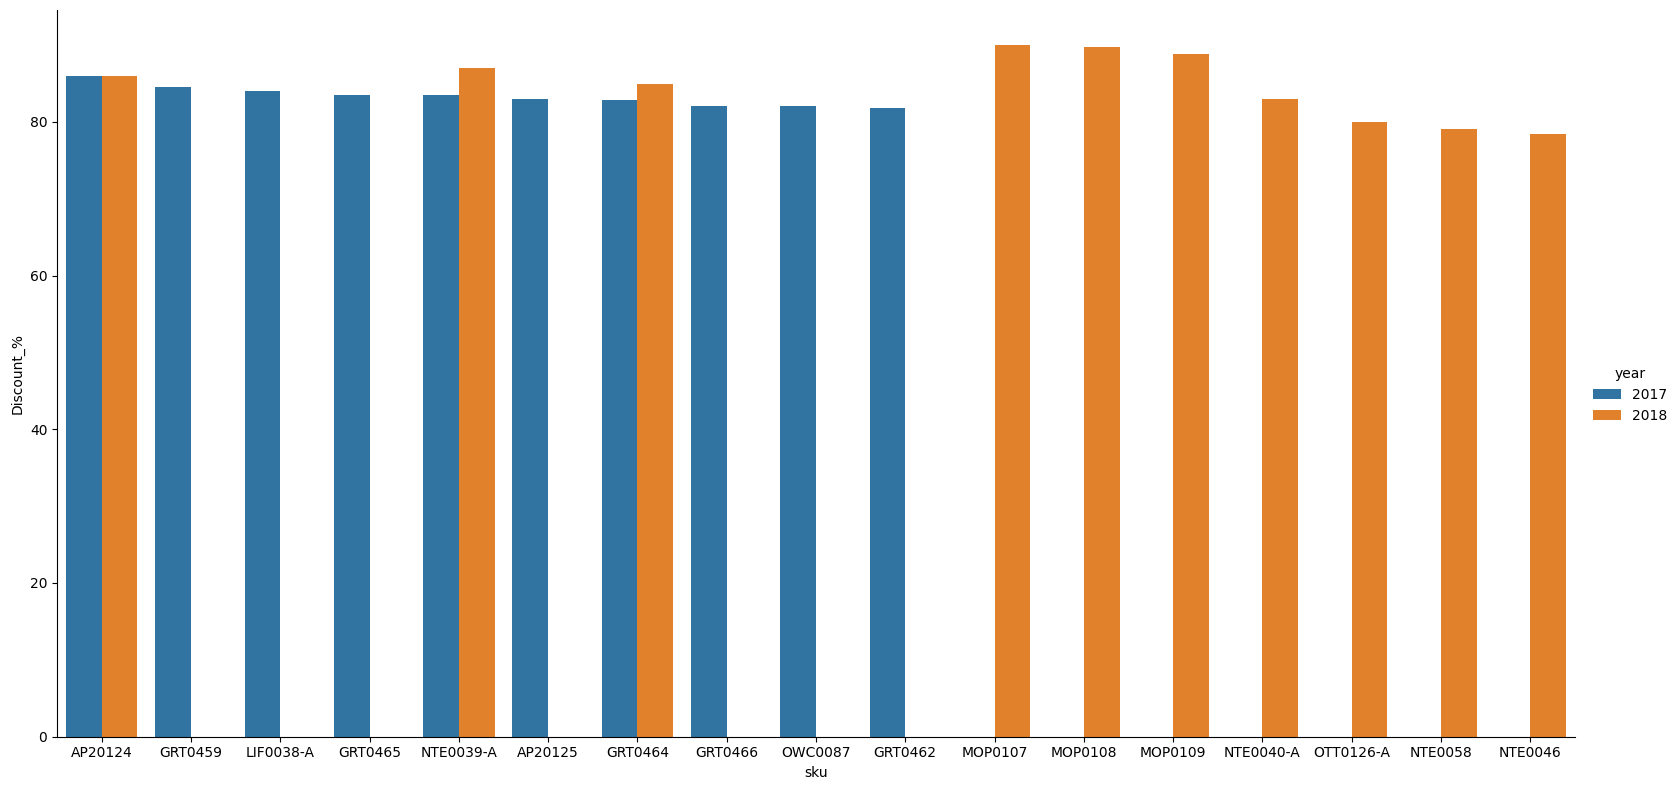

In [1172]:
ol_df.date = pd.to_datetime(ol_df['date'])

products_10_most_disc_17 = (
    ol_p_no_outliers_df.query('date.dt.year == 2017')
    .groupby('sku', as_index=False)
    .agg({'date': 'first', 'Discount_%': 'mean'})
    .nlargest(10, 'Discount_%')

)

products_10_most_disc_18 = (
    ol_p_no_outliers_df.query('date.dt.year == 2018')
    .groupby('sku', as_index=False)
    .agg({'date': 'first', 'Discount_%': 'mean'})
    .nlargest(10, 'Discount_%')
)

products_10_most_disc_17_18 = pd.concat([products_10_most_disc_17
                                               .assign(year=2017),
                                               products_10_most_disc_18
                                               .assign(year=2018)])

sns.catplot(kind="bar",
            data=products_10_most_disc_17_18,
            x="sku",
            y="Discount_%",
            hue='year',
            height=8,
            aspect=2);

In [1173]:
ol_p_no_outliers_df['Revenue'] = ol_p_no_outliers_df['Discount'] * ol_p_no_outliers_df['product_quantity']
total_revenue = ol_p_no_outliers_df['Revenue'].sum()
total_revenue
#revenue for each product
ol_p_no_outliers_df['Revenue'] = ol_p_no_outliers_df['Discount'] * ol_p_no_outliers_df['product_quantity']

#otal revenue
total_revenue = ol_p_no_outliers_df['Revenue'].sum()

#revenue percentage of the total revenue
revenue_percentage = (total_revenue / total_revenue) * 100

In [1174]:
ol_p_no_outliers_df

id  id_order  product_id  product_quantity        sku  unit_price  \
0      1119116    299545           0                 1    OWC0100       47.49   
1      1120182    299404           0                 1    OWC0100       47.49   
2      1121550    300650           0                 1    OWC0100       49.99   
3      1121801    300760           0                 1    OWC0100       49.99   
4      1124334    301975           0                 1    OWC0100       49.99   
...        ...       ...         ...               ...        ...         ...   
53225  1647125    525925           0                 1  GRT0371-A       35.09   
53226  1647280    526003           0                 1    NET0028      404.99   
53227  1647425    526066           0                 1    WAC0254       83.99   
53228  1647495    526093           0                 1    WAC0252       83.99   
53230  1648457    526512           0                 1  DLK0044-A       84.32   

                     date                                               name  \
0     2017-01-01 01:46:16  OWC In-line Digital Temperature Sensor Kit HDD...   
1     2017-01-01 22:50:39  OWC In-line Digital Temperature Sensor Kit HDD...   
2     2017-01-02 15:31:09  OWC In-line Digital Temperature Sensor Kit HDD...   
3     2017-01-02 17:20:31  OWC In-line Digital Temperature Sensor Kit HDD...   
4     2017-01-03 20:04:54  OWC In-line Digital Temperature Sensor Kit HDD...   
...                   ...                                                ...   
53225 2018-03-12 13:37:34  Open - Griffin Survivor All-Terrain iPad Mini ...   
53226 2018-03-12 15:59:19  Netgear Wifi Orbi System kit and satellite net...   
53227 2018-03-12 17:45:42  Education - Wacom Intuos Graphics Tablet S Blu...   
53228 2018-03-12 18:32:29  Education - Wacom Intuos Graphics Tablet S Blu...   
53230 2018-03-13 16:19:18  Open - D-Link DCS-5020L wireless surveillance ...   

                                                    desc  price promo_price  \
0      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
1      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
2      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
3      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
4      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
...                                                  ...    ...         ...   
53225  Reconditioned Case iPad Mini 4 ultra resistant...  59.99       35.09   
53226  System RBK50 Mesh WiFi network kit compact and... 429.99     404.987   
53227  small-edge graphics tablet with Bluetooth inte...  99.00     839.897   
53228  small-edge graphics tablet with Bluetooth inte...  99.00     839.897   
53230  Reconditioned surveillance camera with Wi-Fi r... 139.99     843.179   

       in_stock      type short_brand  Discount  Discount_%  Revenue  
0             1  12755395         OWC     14.00       23.00    14.00  
1             1  12755395         OWC     14.00       23.00    14.00  
2             1  12755395         OWC     11.00       18.00    11.00  
3             1  12755395         OWC     11.00       18.00    11.00  
4             1  12755395         OWC     11.00       18.00    11.00  
...         ...       ...         ...       ...         ...      ...  
53225         0  12635403         GRT     25.00       42.00    25.00  
53226         0      1334         NET     25.00        6.00    25.00  
53227         1      1405         WAC     15.00       15.00    15.00  
53228         1      1405         WAC     15.00       15.00    15.00  
53230         0      9094         DLK     56.00       40.00    56.00  

[49232 rows x 17 columns]

In [1175]:
orderlines_qu

id  id_order  product_id  product_quantity        sku  unit_price  \
0      1119116    299545           0                 1    OWC0100       47.49   
1      1119119    299546           0                 1    IOT0014       18.99   
2      1119120    295347           0                 1    APP0700       72.19   
3      1119134    299556           0                 1  CRU0039-A       60.90   
4      1119145    299561           0                 1    PEB0015      142.49   
...        ...       ...         ...               ...        ...         ...   
53226  1649447    527035           0                 1    APP0698        9.99   
53227  1649512    527070           0                 2    APP0698        9.99   
53228  1649522    527074           0                 2    APP0698        9.99   
53229  1649565    527096           0                 3    APP0698        9.99   
53230  1649593    527112           0                 1    APP0698        9.99   

                     date  
0     2017-01-01 01:46:16  
1     2017-01-01 01:50:34  
2     2017-01-01 01:54:11  
3     2017-01-01 02:20:14  
4     2017-01-01 02:38:50  
...                   ...  
53226 2018-03-14 11:42:41  
53227 2018-03-14 11:49:01  
53228 2018-03-14 11:49:36  
53229 2018-03-14 11:54:35  
53230 2018-03-14 11:58:13  

[53231 rows x 7 columns]

#PROPORTION OF REVENUE
The top 10 products in revenue for 17/18 represent 13% of the total revenu

In [1176]:
most_revenue = (
    ol_p_no_outliers_df_revenue.groupby('sku', as_index=False)
    .agg({'revenue': 'sum'})
    .sort_values(by="revenue", ascending=False)
    .nlargest(10, 'revenue')
)
most_revenue.revenue.sum()

789687.5799999998

In [1177]:
most_revenue.agg({'revenue': 'sum'})

revenue   789687.58
dtype: float64

In [1178]:
total_revenue = (
    ol_p_no_outliers_df_revenue.groupby('sku', as_index=False)
    .agg({'revenue': 'sum'})
    .sort_values(by="revenue", ascending=False)
)

In [1179]:
total_revenue.agg({'revenue': 'sum'})

revenue   6062258.16
dtype: float64

In [1180]:
ol_p_no_outliers_df_revenue

id  id_order  product_id  product_quantity        sku  unit_price  \
0      1119116    299545           0                 1    OWC0100       47.49   
1      1120182    299404           0                 1    OWC0100       47.49   
2      1121550    300650           0                 1    OWC0100       49.99   
3      1121801    300760           0                 1    OWC0100       49.99   
4      1124334    301975           0                 1    OWC0100       49.99   
...        ...       ...         ...               ...        ...         ...   
53225  1647125    525925           0                 1  GRT0371-A       35.09   
53226  1647280    526003           0                 1    NET0028      404.99   
53227  1647425    526066           0                 1    WAC0254       83.99   
53228  1647495    526093           0                 1    WAC0252       83.99   
53230  1648457    526512           0                 1  DLK0044-A       84.32   

                     date                                               name  \
0     2017-01-01 01:46:16  OWC In-line Digital Temperature Sensor Kit HDD...   
1     2017-01-01 22:50:39  OWC In-line Digital Temperature Sensor Kit HDD...   
2     2017-01-02 15:31:09  OWC In-line Digital Temperature Sensor Kit HDD...   
3     2017-01-02 17:20:31  OWC In-line Digital Temperature Sensor Kit HDD...   
4     2017-01-03 20:04:54  OWC In-line Digital Temperature Sensor Kit HDD...   
...                   ...                                                ...   
53225 2018-03-12 13:37:34  Open - Griffin Survivor All-Terrain iPad Mini ...   
53226 2018-03-12 15:59:19  Netgear Wifi Orbi System kit and satellite net...   
53227 2018-03-12 17:45:42  Education - Wacom Intuos Graphics Tablet S Blu...   
53228 2018-03-12 18:32:29  Education - Wacom Intuos Graphics Tablet S Blu...   
53230 2018-03-13 16:19:18  Open - D-Link DCS-5020L wireless surveillance ...   

                                                    desc  price promo_price  \
0      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
1      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
2      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
3      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
4      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
...                                                  ...    ...         ...   
53225  Reconditioned Case iPad Mini 4 ultra resistant...  59.99       35.09   
53226  System RBK50 Mesh WiFi network kit compact and... 429.99     404.987   
53227  small-edge graphics tablet with Bluetooth inte...  99.00     839.897   
53228  small-edge graphics tablet with Bluetooth inte...  99.00     839.897   
53230  Reconditioned surveillance camera with Wi-Fi r... 139.99     843.179   

       in_stock      type short_brand  Discount  Discount_%  revenue  
0             1  12755395         OWC     14.00       23.00    47.49  
1             1  12755395         OWC     14.00       23.00    47.49  
2             1  12755395         OWC     11.00       18.00    49.99  
3             1  12755395         OWC     11.00       18.00    49.99  
4             1  12755395         OWC     11.00       18.00    49.99  
...         ...       ...         ...       ...         ...      ...  
53225         0  12635403         GRT     25.00       42.00    35.09  
53226         0      1334         NET     25.00        6.00   404.99  
53227         1      1405         WAC     15.00       15.00    83.99  
53228         1      1405         WAC     15.00       15.00    83.99  
53230         0      9094         DLK     56.00       40.00    84.32  

[49232 rows x 17 columns]

#10 Top revenue represent 13% of the revenue

In [1181]:
proportion_revenue = ((most_revenue.revenue.sum() / total_revenue.agg({'revenue': 'sum'}))*100).round()
proportion_revenue

revenue   13.00
dtype: float64

#PORPORTION OF QUANTITY SOLD
The top 10 products in quantity sold for 17/18 represent 9% of the quantity sold

In [1182]:
ol_p_no_outliers_df_revenue

id  id_order  product_id  product_quantity        sku  unit_price  \
0      1119116    299545           0                 1    OWC0100       47.49   
1      1120182    299404           0                 1    OWC0100       47.49   
2      1121550    300650           0                 1    OWC0100       49.99   
3      1121801    300760           0                 1    OWC0100       49.99   
4      1124334    301975           0                 1    OWC0100       49.99   
...        ...       ...         ...               ...        ...         ...   
53225  1647125    525925           0                 1  GRT0371-A       35.09   
53226  1647280    526003           0                 1    NET0028      404.99   
53227  1647425    526066           0                 1    WAC0254       83.99   
53228  1647495    526093           0                 1    WAC0252       83.99   
53230  1648457    526512           0                 1  DLK0044-A       84.32   

                     date                                               name  \
0     2017-01-01 01:46:16  OWC In-line Digital Temperature Sensor Kit HDD...   
1     2017-01-01 22:50:39  OWC In-line Digital Temperature Sensor Kit HDD...   
2     2017-01-02 15:31:09  OWC In-line Digital Temperature Sensor Kit HDD...   
3     2017-01-02 17:20:31  OWC In-line Digital Temperature Sensor Kit HDD...   
4     2017-01-03 20:04:54  OWC In-line Digital Temperature Sensor Kit HDD...   
...                   ...                                                ...   
53225 2018-03-12 13:37:34  Open - Griffin Survivor All-Terrain iPad Mini ...   
53226 2018-03-12 15:59:19  Netgear Wifi Orbi System kit and satellite net...   
53227 2018-03-12 17:45:42  Education - Wacom Intuos Graphics Tablet S Blu...   
53228 2018-03-12 18:32:29  Education - Wacom Intuos Graphics Tablet S Blu...   
53230 2018-03-13 16:19:18  Open - D-Link DCS-5020L wireless surveillance ...   

                                                    desc  price promo_price  \
0      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
1      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
2      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
3      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
4      Kit temperature sensor for HDD iMac 21 inch an...  60.99     499.899   
...                                                  ...    ...         ...   
53225  Reconditioned Case iPad Mini 4 ultra resistant...  59.99       35.09   
53226  System RBK50 Mesh WiFi network kit compact and... 429.99     404.987   
53227  small-edge graphics tablet with Bluetooth inte...  99.00     839.897   
53228  small-edge graphics tablet with Bluetooth inte...  99.00     839.897   
53230  Reconditioned surveillance camera with Wi-Fi r... 139.99     843.179   

       in_stock      type short_brand  Discount  Discount_%  revenue  
0             1  12755395         OWC     14.00       23.00    47.49  
1             1  12755395         OWC     14.00       23.00    47.49  
2             1  12755395         OWC     11.00       18.00    49.99  
3             1  12755395         OWC     11.00       18.00    49.99  
4             1  12755395         OWC     11.00       18.00    49.99  
...         ...       ...         ...       ...         ...      ...  
53225         0  12635403         GRT     25.00       42.00    35.09  
53226         0      1334         NET     25.00        6.00   404.99  
53227         1      1405         WAC     15.00       15.00    83.99  
53228         1      1405         WAC     15.00       15.00    83.99  
53230         0      9094         DLK     56.00       40.00    84.32  

[49232 rows x 17 columns]

In [1183]:
products_quantity_total = (
    ol_p_no_outliers_df_revenue.groupby('sku', as_index=False)
    .agg({'product_quantity': 'sum', 'revenue' : 'sum','Discount_%' : 'mean', 'Discount' : 'sum'})
    .sort_values(by='product_quantity', ascending=False)
    [['sku', 'product_quantity','revenue','Discount_%', 'Discount']]
)
products_quantity_total

sku  product_quantity  revenue  Discount_%  Discount
321   APP1190               955 51954.97       22.16  13493.00
238   APP0698               820  8181.84       60.04   7175.00
519   APP1922               537 86473.26        9.99   9129.00
255   APP0927               489  8352.84       51.02   6747.00
4417  WDT0183               476 65589.96       18.34   8971.00
...       ...               ...      ...         ...       ...
2393  MOS0105                 1    19.99        0.00      0.00
2391  MOS0102                 1    22.99       49.00     22.00
2390  MOS0087                 1    25.99       53.00     29.00
2387  MOS0084                 1    19.99       13.00      3.00
4593  ZEP0007                 1   125.99       16.00     24.00

[4594 rows x 5 columns]

In [1184]:
products_quantity_10 = (
    ol_p_no_outliers_df_revenue.groupby('sku', as_index=False)
   .agg({'product_quantity': 'sum', 'revenue' : 'sum','Discount_%' : 'mean', 'Discount' : 'sum'})
    .nlargest(10, 'product_quantity')
    [['sku', 'product_quantity','revenue','Discount_%','Discount']]
)
products_quantity_10

sku  product_quantity   revenue  Discount_%  Discount
321   APP1190               955  51954.97       22.16  13493.00
238   APP0698               820   8181.84       60.04   7175.00
519   APP1922               537  86473.26        9.99   9129.00
255   APP0927               489   8352.84       51.02   6747.00
4417  WDT0183               476  65589.96       18.34   8971.00
3476  SAM0074               329  50181.18       15.20   8144.00
1063  CRU0051               328  44355.75       14.46   6224.00
622   APP2446               261 101161.16       13.48  15506.00
2648  NTE0013               252   4917.07       27.80   1535.00
1062  CRU0050               248  21112.51       11.79   1898.00

In [1185]:
products_quantity_10.product_quantity.sum()

4695

In [1186]:
products_quantity_total.product_quantity.sum()

55640

#10 Top quantity represente 8% of the total quantity sold

In [1187]:
proportion_top_sell = ((products_quantity_10.product_quantity.sum() / products_quantity_total.product_quantity.sum())*100).round()
proportion_top_sell

8.0

#Choosing the first 25% of sold quantity

In [1188]:
products_quantity_total.product_quantity.sum()

55640

In [1189]:
# Calculer la somme totale de product_quantity pour chaque SKU
#products_quantity_total = (
#   ol_p_no_outliers_df_revenue.groupby('sku', as_index=False)
#    .agg({'product_quantity': 'sum', 'revenue' : 'sum','Discount_%' : 'mean'})
#    .sort_values(by='product_quantity', ascending=False)
#    [['sku', 'product_quantity','revenue','Discount_%']]
#)

# Calculer la somme totale de product_quantity pour toute la DataFrame
products_quantity_total_sum = products_quantity_total['product_quantity'].sum()

# Calculer le 25e percentile total de la somme des product_quantity
twenty_five_percentile = products_quantity_total_sum * 0.25

# Calculer la somme cumulative des product_quantity triées par ordre décroissant
products_quantity_total['cumulative_quantity'] = products_quantity_total['product_quantity'].cumsum()

# Filtrer le DataFrame pour inclure uniquement les SKUs avec les 25% des quantités les plus élevées
top_25_percent_quantity = products_quantity_total[products_quantity_total['cumulative_quantity'] <= twenty_five_percentile]


In [1190]:
top_25_percent_quantity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 321 to 3505
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sku                  68 non-null     object 
 1   product_quantity     68 non-null     int64  
 2   revenue              68 non-null     float64
 3   Discount_%           68 non-null     float64
 4   Discount             68 non-null     float64
 5   cumulative_quantity  68 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 3.7+ KB


In [1191]:
top_25_percent_quantity

sku  product_quantity   revenue  Discount_%  Discount  \
321     APP1190               955  51954.97       22.16  13493.00   
238     APP0698               820   8181.84       60.04   7175.00   
519     APP1922               537  86473.26        9.99   9129.00   
255     APP0927               489   8352.84       51.02   6747.00   
4417    WDT0183               476  65589.96       18.34   8971.00   
3476    SAM0074               329  50181.18       15.20   8144.00   
1063    CRU0051               328  44355.75       14.46   6224.00   
622     APP2446               261 101161.16       13.48  15506.00   
2648    NTE0013               252   4917.07       27.80   1535.00   
1062    CRU0050               248  21112.51       11.79   1898.00   
4352    WAC0171               246  14316.80       27.73   3804.00   
4413    WDT0141               239  25871.53       16.09   3333.00   
2135    LGE0044               239 135375.83        5.28   6401.00   
2321    MAT0010               237  16308.14        1.72    225.00   
527     APP1970               221  80037.41       13.40  12391.00   
331     APP1214               220  17878.91        8.74   1606.00   
1044  CRU0026-2               214  29623.12       15.51   5129.00   
2889  OWC0035-2               212  17353.03        7.26   1274.00   
3475    SAM0073               208  19721.73       12.06   2422.00   
4584    ZAG0032               207   7515.63       63.33  12413.00   
3635    SAT0054               206  15665.94       15.48   2455.00   
2890  OWC0036-2               205  17407.35        9.68   1449.00   
2686    NTE0062               196  20263.94       21.70   5096.00   
2318    MAT0007               195  19571.39       18.81   3504.00   
4431    WDT0249               190  41175.57       15.30   4440.00   
2055    LAC0212               184  22431.47       12.62   2980.00   
776     BEL0198               180   2976.53       52.36   3038.00   
844     BEL0270               178  14681.22       17.08   2818.00   
3279    PAC2477               171   3510.26       65.95   5868.00   
2312    MAC0144               168   4198.32       38.00   1995.00   
2875    OWC0013               165    536.25       52.56    604.00   
2022    LAC0181               163  17602.75       19.90   4192.00   
1037  CRU0016-2               155  14245.46       14.99   2377.00   
4412    WDT0140               151  12973.51       12.66   1165.00   
3527    SAN0135               151  10879.96       28.08   3735.00   
3672    SEA0039               149  10401.86       22.66   1774.00   
1683    IFX0181               146  10237.56       22.01   2845.00   
2574    NEA0009               146  20034.69       23.68   5822.00   
4532    WOE0007               144   1168.30       18.65    248.00   
516     APP1919               142   7526.54        9.88    754.00   
2582    NEA0020               140  10441.43        6.65    269.00   
523     APP1966               140  50984.12       13.09   7595.00   
237     APP0697               139   1088.26       68.37   2034.00   
1581    IFX0022               138   2870.68       32.81   1402.00   
2982    OWC0153               136   6736.14       19.04   1162.00   
2953    OWC0100               134   6599.98       19.39   1444.00   
4583    ZAG0030               133   2764.92       74.29   7188.00   
1067    CRU0053               133  34395.99       10.87   3669.00   
338     APP1221               131  14103.85        1.26    166.00   
1039  CRU0017-2               131  12516.71       11.25   1360.00   
3679    SEA0053               131  14996.19       14.97   1486.00   
4069    TOS0022               127  12887.99       27.57   4242.00   
537     APP1978               126  47971.75        5.74   2483.00   
3612    SAT0031               124   1148.76       48.63    886.00   
1592    IFX0034               123   2935.15        4.39    135.00   
2027    LAC0185               123  22516.95       11.25   2566.00   
4067    TOS0018               123   6719.78        7.51    432.00   
3610    SA

In [1192]:
top_25_percent_quantity

sku  product_quantity   revenue  Discount_%  Discount  \
321     APP1190               955  51954.97       22.16  13493.00   
238     APP0698               820   8181.84       60.04   7175.00   
519     APP1922               537  86473.26        9.99   9129.00   
255     APP0927               489   8352.84       51.02   6747.00   
4417    WDT0183               476  65589.96       18.34   8971.00   
3476    SAM0074               329  50181.18       15.20   8144.00   
1063    CRU0051               328  44355.75       14.46   6224.00   
622     APP2446               261 101161.16       13.48  15506.00   
2648    NTE0013               252   4917.07       27.80   1535.00   
1062    CRU0050               248  21112.51       11.79   1898.00   
4352    WAC0171               246  14316.80       27.73   3804.00   
4413    WDT0141               239  25871.53       16.09   3333.00   
2135    LGE0044               239 135375.83        5.28   6401.00   
2321    MAT0010               237  16308.14        1.72    225.00   
527     APP1970               221  80037.41       13.40  12391.00   
331     APP1214               220  17878.91        8.74   1606.00   
1044  CRU0026-2               214  29623.12       15.51   5129.00   
2889  OWC0035-2               212  17353.03        7.26   1274.00   
3475    SAM0073               208  19721.73       12.06   2422.00   
4584    ZAG0032               207   7515.63       63.33  12413.00   
3635    SAT0054               206  15665.94       15.48   2455.00   
2890  OWC0036-2               205  17407.35        9.68   1449.00   
2686    NTE0062               196  20263.94       21.70   5096.00   
2318    MAT0007               195  19571.39       18.81   3504.00   
4431    WDT0249               190  41175.57       15.30   4440.00   
2055    LAC0212               184  22431.47       12.62   2980.00   
776     BEL0198               180   2976.53       52.36   3038.00   
844     BEL0270               178  14681.22       17.08   2818.00   
3279    PAC2477               171   3510.26       65.95   5868.00   
2312    MAC0144               168   4198.32       38.00   1995.00   
2875    OWC0013               165    536.25       52.56    604.00   
2022    LAC0181               163  17602.75       19.90   4192.00   
1037  CRU0016-2               155  14245.46       14.99   2377.00   
4412    WDT0140               151  12973.51       12.66   1165.00   
3527    SAN0135               151  10879.96       28.08   3735.00   
3672    SEA0039               149  10401.86       22.66   1774.00   
1683    IFX0181               146  10237.56       22.01   2845.00   
2574    NEA0009               146  20034.69       23.68   5822.00   
4532    WOE0007               144   1168.30       18.65    248.00   
516     APP1919               142   7526.54        9.88    754.00   
2582    NEA0020               140  10441.43        6.65    269.00   
523     APP1966               140  50984.12       13.09   7595.00   
237     APP0697               139   1088.26       68.37   2034.00   
1581    IFX0022               138   2870.68       32.81   1402.00   
2982    OWC0153               136   6736.14       19.04   1162.00   
2953    OWC0100               134   6599.98       19.39   1444.00   
4583    ZAG0030               133   2764.92       74.29   7188.00   
1067    CRU0053               133  34395.99       10.87   3669.00   
338     APP1221               131  14103.85        1.26    166.00   
1039  CRU0017-2               131  12516.71       11.25   1360.00   
3679    SEA0053               131  14996.19       14.97   1486.00   
4069    TOS0022               127  12887.99       27.57   4242.00   
537     APP1978               126  47971.75        5.74   2483.00   
3612    SAT0031               124   1148.76       48.63    886.00   
1592    IFX0034               123   2935.15        4.39    135.00   
2027    LAC0185               123  22516.95       11.25   2566.00   
4067    TOS0018               123   6719.78        7.51    432.00   
3610    SA

In [1193]:
top_25_percent_quantity.product_quantity.sum()

13836

In [1194]:
products_quantity_total.product_quantity.sum()

55640

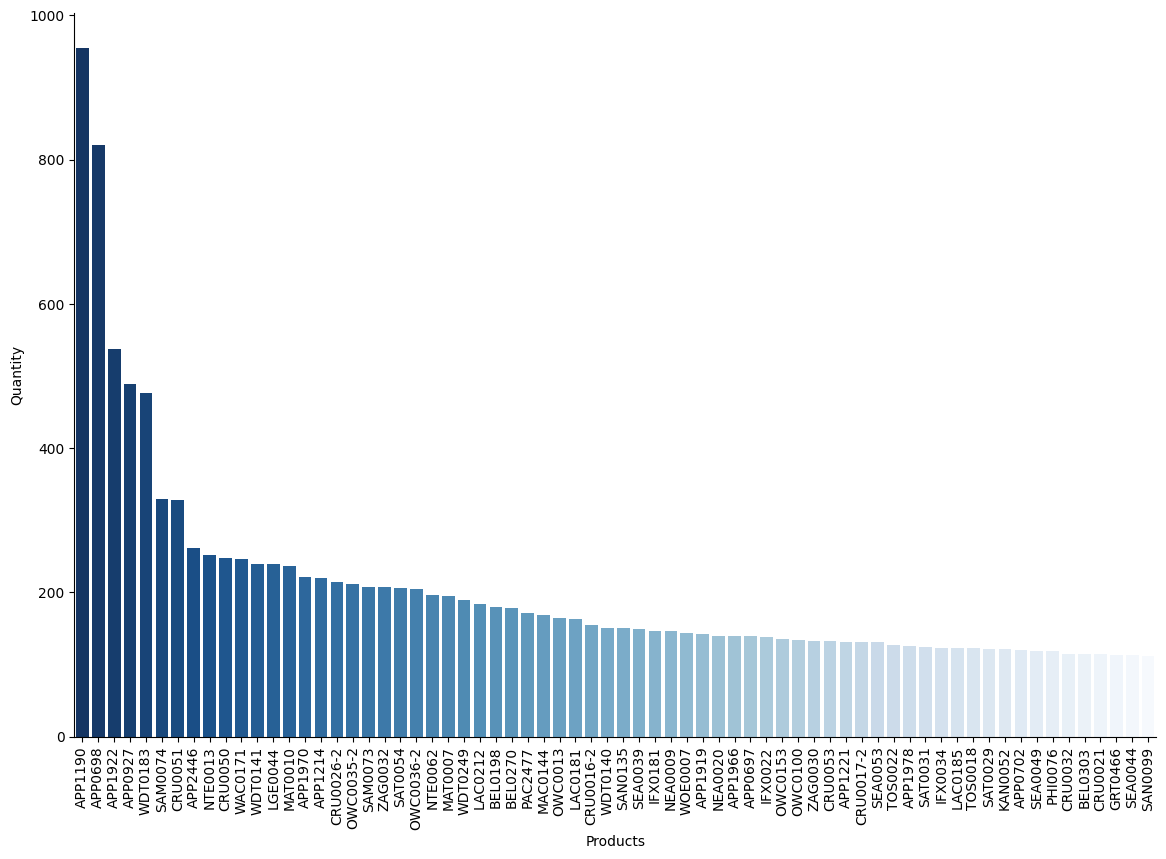

In [1195]:
sns.catplot(kind="bar",
            data=top_25_percent_quantity,
            x="sku",
            y="product_quantity",
            palette = 'Blues_r',
            height=8,
            aspect=1.5);

#sns.lineplot(data=filtered_nb_sku,
#             x="sku",
#             y="product_quantity",
#             marker='o',
#             label='Sold with discount')

#sns.lineplot(data=quantity_disc_fp,
#             x="sku",
#             y="product_quantity",
#             marker='o',
#             label='Sold normal price')

plt.xticks(rotation=90)
plt.xlabel("Products")
plt.ylabel("Quantity");



In [1196]:
top_25_percent_quantity.describe()

product_quantity   revenue  Discount_%  Discount  cumulative_quantity
count             68.00     68.00       68.00     68.00                68.00
mean             203.47  20321.77       24.20   3549.26              8975.21
std              147.71  25274.17       18.87   3389.57              3417.42
min              112.00    536.25        1.26    135.00               955.00
25%              130.00   5340.40       12.48   1338.50              6470.00
50%              151.00  12702.35       18.15   2438.50              9520.50
75%              212.50  20476.08       27.98   4604.00             11840.75
max              955.00 135375.83       82.05  15506.00             13836.00

In [1197]:
products_quantity_10.describe()

product_quantity   revenue  Discount_%  Discount
count             10.00     10.00       10.00     10.00
mean             469.50  44228.05       24.43   7882.20
std              245.66  33736.84       17.32   4384.92
min              248.00   4917.07        9.99   1535.00
25%              277.75  11542.76       13.73   6354.75
50%              402.50  47268.46       16.77   7659.50
75%              525.00  62181.21       26.39   9089.50
max              955.00 101161.16       60.04  15506.00

In [1198]:
top_25_percent_quantity_aggr_disc = top_25_percent_quantity.query('`Discount_%` >=40')
top_25_percent_quantity_aggr_disc

sku  product_quantity  revenue  Discount_%  Discount  \
238   APP0698               820  8181.84       60.04   7175.00   
255   APP0927               489  8352.84       51.02   6747.00   
4584  ZAG0032               207  7515.63       63.33  12413.00   
776   BEL0198               180  2976.53       52.36   3038.00   
3279  PAC2477               171  3510.26       65.95   5868.00   
2875  OWC0013               165   536.25       52.56    604.00   
237   APP0697               139  1088.26       68.37   2034.00   
4583  ZAG0030               133  2764.92       74.29   7188.00   
3612  SAT0031               124  1148.76       48.63    886.00   
1862  KAN0052               121  1107.40       48.38    908.00   
875   BEL0303               114  2708.86       58.59   3622.00   
1441  GRT0466               113   654.30       82.05   2160.00   

      cumulative_quantity  
238                  1775  
255                  2801  
4584                 6938  
776                  8294  
3279                 8643  
2875                 8976  
237                 10742  
4583                11283  
3612                12186  
1862                12798  
875                 13384  
1441                13611

In [1199]:
top_25_percent_quantity_aggr_disc.describe()

product_quantity  revenue  Discount_%  Discount  cumulative_quantity
count             12.00    12.00       12.00     12.00                12.00
mean             231.33  3378.82       60.46   4386.92              9285.92
std              211.88  2966.64       10.72   3559.51              3906.04
min              113.00   536.25       48.38    604.00              1775.00
25%              123.25  1102.62       52.02   1752.50              7955.00
50%              152.00  2736.89       59.32   3330.00              9859.00
75%              186.75  4511.60       66.55   6854.00             12339.00
max              820.00  8352.84       82.05  12413.00             13611.00

In [1200]:
top_25_percent_quantity_aggr_disc.product_quantity.sum()

2776

In [1201]:
top_25_percent_quantity.product_quantity.sum()

13836

In [1202]:
top_25_percent_quantity_10 = top_25_percent_quantity.nlargest(10, 'product_quantity')


In [1203]:
top_25_percent_quantity_10.describe()

product_quantity   revenue  Discount_%  Discount  cumulative_quantity
count             10.00     10.00       10.00     10.00                10.00
mean             469.50  44228.05       24.43   7882.20              3199.70
std              245.66  33736.84       17.32   4384.92              1225.11
min              248.00   4917.07        9.99   1535.00               955.00
25%              277.75  11542.76       13.73   6354.75              2434.25
50%              402.50  47268.46       16.77   7659.50              3441.50
75%              525.00  62181.21       26.39   9089.50              4129.75
max              955.00 101161.16       60.04  15506.00              4695.00

In [1204]:
top_25_percent_quantity_10

sku  product_quantity   revenue  Discount_%  Discount  \
321   APP1190               955  51954.97       22.16  13493.00   
238   APP0698               820   8181.84       60.04   7175.00   
519   APP1922               537  86473.26        9.99   9129.00   
255   APP0927               489   8352.84       51.02   6747.00   
4417  WDT0183               476  65589.96       18.34   8971.00   
3476  SAM0074               329  50181.18       15.20   8144.00   
1063  CRU0051               328  44355.75       14.46   6224.00   
622   APP2446               261 101161.16       13.48  15506.00   
2648  NTE0013               252   4917.07       27.80   1535.00   
1062  CRU0050               248  21112.51       11.79   1898.00   

      cumulative_quantity  
321                   955  
238                  1775  
519                  2312  
255                  2801  
4417                 3277  
3476                 3606  
1063                 3934  
622                  4195  
2648                 4447  
1062                 4695

In [1205]:
# rajoute colonne aggr_disc pour coleur dans le plot
top_25_percent_quantity_10['aggr_disc'] = top_25_percent_quantity_10['Discount_%'].apply(lambda x: True if x >= 40 else False)


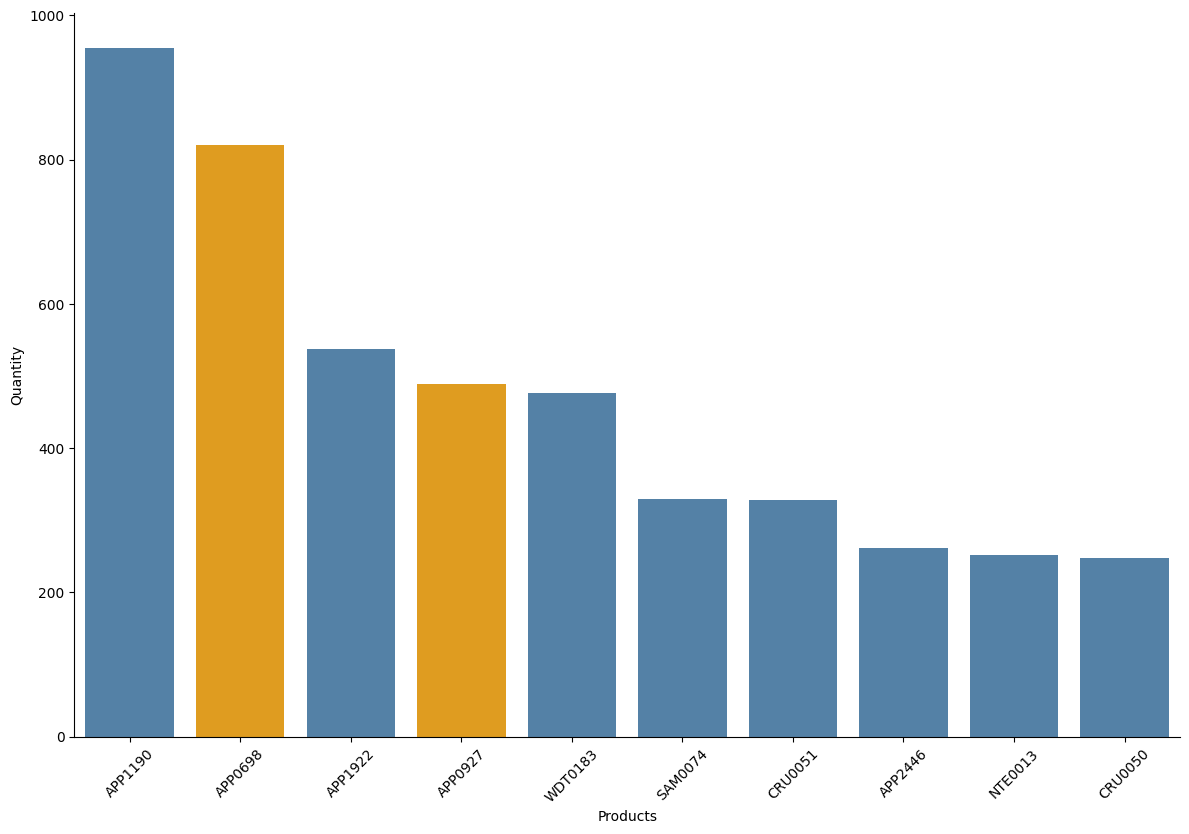

In [1206]:
sns.catplot(kind="bar",
            data=top_25_percent_quantity_10,
            x="sku",
            y="product_quantity",
            palette= ['orange' if sku in ["APP0927", "APP0698"] else 'steelblue' for sku in top_25_percent_quantity_10['sku']],
            height=8,
            aspect=1.5);


#sns.lineplot(data=filtered_nb_sku,
#             x="sku",
#             y="product_quantity",
#             marker='o',
#             label='Sold with discount')

#sns.lineplot(data=quantity_disc_fp,
#             x="sku",
#             y="product_quantity",
#             marker='o',
#             label='Sold normal price')

plt.xticks(rotation=45)
plt.xlabel("Products")
plt.ylabel("Quantity");

#Choosing the first 25% of sold revenue

In [1207]:
nb_2 = ol_p_no_outliers_df_revenue[ol_p_no_outliers_df_revenue['sku'].isin(products_revenue_10['sku'])][['sku','product_quantity','unit_price','price','Discount','Discount_%']]

sum(nb.Discount > 0), sum(nb.Discount <= 0)

filtered_nb = nb[nb['Discount'] > 0]
filtered_nb

filtered_nb_fp = nb[nb['Discount'] <= 0]

In [1208]:
products_revenue_total = (
    ol_p_no_outliers_df_revenue
    .groupby('sku', as_index=False)
    .agg({'product_quantity': 'sum', 'revenue' : 'sum','Discount_%' : 'mean', 'Discount' : 'sum'})
    .sort_values(by="revenue", ascending=False)
    [['sku', 'product_quantity','revenue','Discount_%','Discount']]
)

In [1209]:
products_revenue_total.describe()

product_quantity   revenue  Discount_%  Discount
count           4594.00   4594.00     4594.00   4594.00
mean              12.11   1319.60       20.09    196.34
std               32.95   5063.32       16.38    685.07
min                1.00      1.99      -91.29   -282.00
25%                1.00     70.70        8.50     14.00
50%                4.00    216.38       17.00     41.00
75%               11.00    764.70       28.00    121.75
max              955.00 135375.83       90.04  15506.00

In [1210]:
products_revenue_10 = (
    ol_p_no_outliers_df_revenue
    .groupby('sku', as_index=False)
    .agg({'product_quantity': 'sum', 'revenue' : 'sum','Discount_%' : 'mean', 'Discount' : 'sum'})
    .sort_values(by="revenue", ascending=False)
    .nlargest(10, 'revenue')
    [['sku', 'product_quantity','revenue','Discount_%','Discount']]
)

In [1211]:
products_revenue_10

sku  product_quantity   revenue  Discount_%  Discount
2135  LGE0044               239 135375.83        5.28   6401.00
622   APP2446               261 101161.16       13.48  15506.00
519   APP1922               537  86473.26        9.99   9129.00
628   APP2477               108  85301.93        2.36   1953.00
527   APP1970               221  80037.41       13.40  12391.00
637   APP2485                79  70721.79        2.41   1864.00
4417  WDT0183               476  65589.96       18.34   8971.00
635   APP2483                67  60090.08        2.32   1432.00
630   APP2479                67  52981.19        2.27   1212.00
321   APP1190               955  51954.97       22.16  13493.00

In [1212]:
products_revenue_10.describe()

product_quantity   revenue  Discount_%  Discount
count             10.00     10.00       10.00     10.00
mean             301.00  78968.76        9.20   7235.20
std              283.22  25342.84        7.39   5458.44
min               67.00  51954.97        2.27   1212.00
25%               86.25  61465.05        2.37   1886.25
50%              230.00  75379.60        7.64   7686.00
75%              422.25  86180.43       13.46  11575.50
max              955.00 135375.83       22.16  15506.00

In [1213]:
# Calculer la somme totale de product_quantity pour chaque SKU
#products_quantity_total = (
#   ol_p_no_outliers_df_revenue.groupby('sku', as_index=False)
#    .agg({'product_quantity': 'sum', 'revenue' : 'sum','Discount_%' : 'mean'})
#    .sort_values(by='product_quantity', ascending=False)
#    [['sku', 'product_quantity','revenue','Discount_%']]
#)
products_revenue_total = (
    ol_p_no_outliers_df_revenue
    .groupby('sku', as_index=False)
    .agg({'product_quantity': 'sum', 'revenue' : 'sum','Discount_%' : 'mean', 'Discount' : 'sum'})
    .sort_values(by="revenue", ascending=False)
    [['sku', 'product_quantity','revenue','Discount_%','Discount']]
)
# Calculer la somme totale de revenue pour toute la DataFrame
products_revenue_total_sum = products_revenue_total['revenue'].sum()

# Calculer le 25e percentile total de la somme des product_quantity
twenty_five_percentile_revenue = products_revenue_total_sum * 0.25

# Calculer la somme cumulative des product_quantity triées par ordre décroissant
products_revenue_total['cumulative_revenue'] = products_revenue_total['revenue'].cumsum()

# Filtrer le DataFrame pour inclure uniquement les SKUs avec les 25% des quantités les plus élevées
top_25_percent_revenue = products_revenue_total[products_revenue_total['cumulative_revenue'] <= twenty_five_percentile_revenue]


In [1214]:
top_25_percent_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 2135 to 2012
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sku                 30 non-null     object 
 1   product_quantity    30 non-null     int64  
 2   revenue             30 non-null     float64
 3   Discount_%          30 non-null     float64
 4   Discount            30 non-null     float64
 5   cumulative_revenue  30 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.6+ KB


In [1215]:
top_25_percent_revenue.revenue.sum()

1495880.56

In [1216]:
products_revenue_total.revenue.sum()

6062258.16

In [1217]:
top_25_percent_revenue.product_quantity.sum()

5490

In [1218]:
top_25_percent_revenue_aggr_disc  = top_25_percent_revenue.query('`Discount_%` >= 40')
top_25_percent_revenue_aggr_disc

Empty DataFrame
Columns: [sku, product_quantity, revenue, Discount_%, Discount, cumulative_revenue]
Index: []

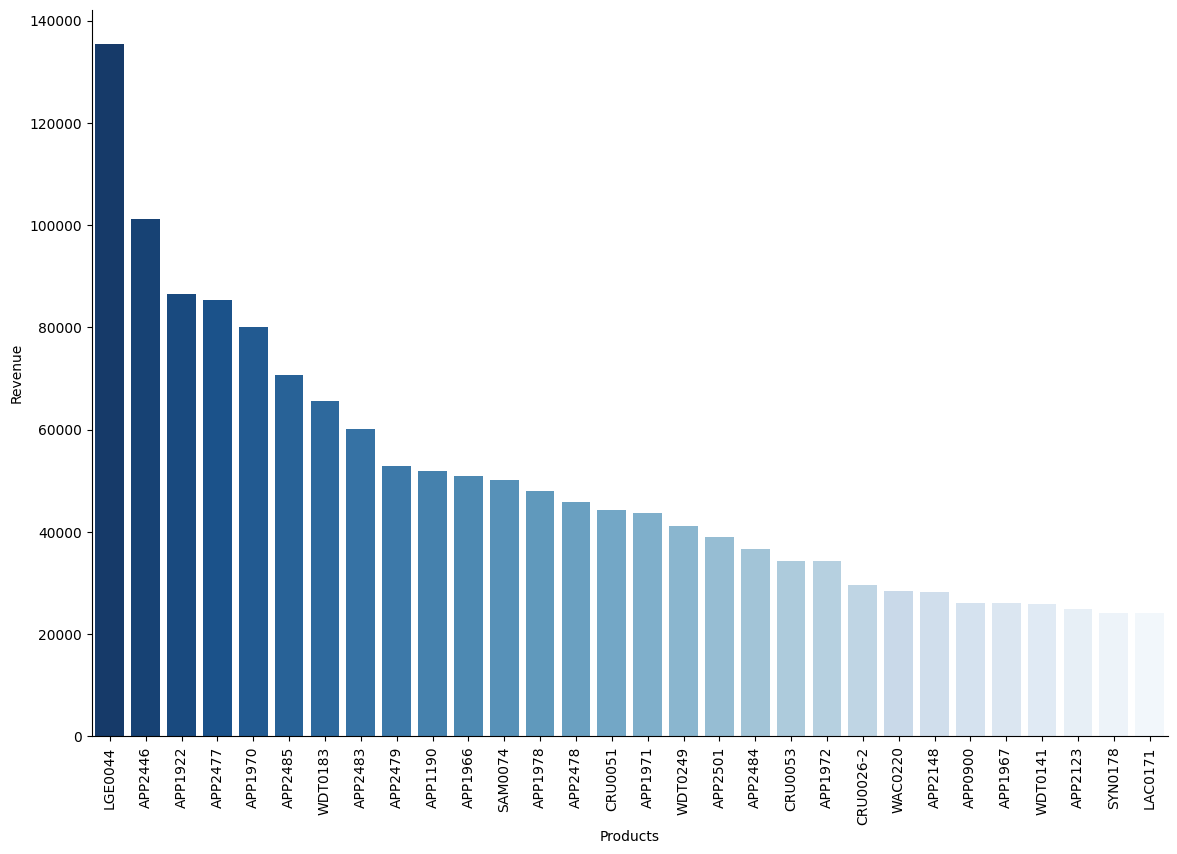

In [1219]:

sns.catplot(kind="bar",
            data=top_25_percent_revenue,
            x="sku",
            y="revenue",
            palette = 'Blues_r',
            height=8,
            aspect=1.5);

#sns.lineplot(data=filtered_nb_sku,
#             x="sku",
#             y="product_quantity",
#             marker='o',
#             label='Sold with discount')

#sns.lineplot(data=quantity_disc_fp,
#             x="sku",
#             y="product_quantity",
#             marker='o',
#             label='Sold normal price')

plt.xticks(rotation=90)
plt.xlabel("Products")
plt.ylabel("Revenue");



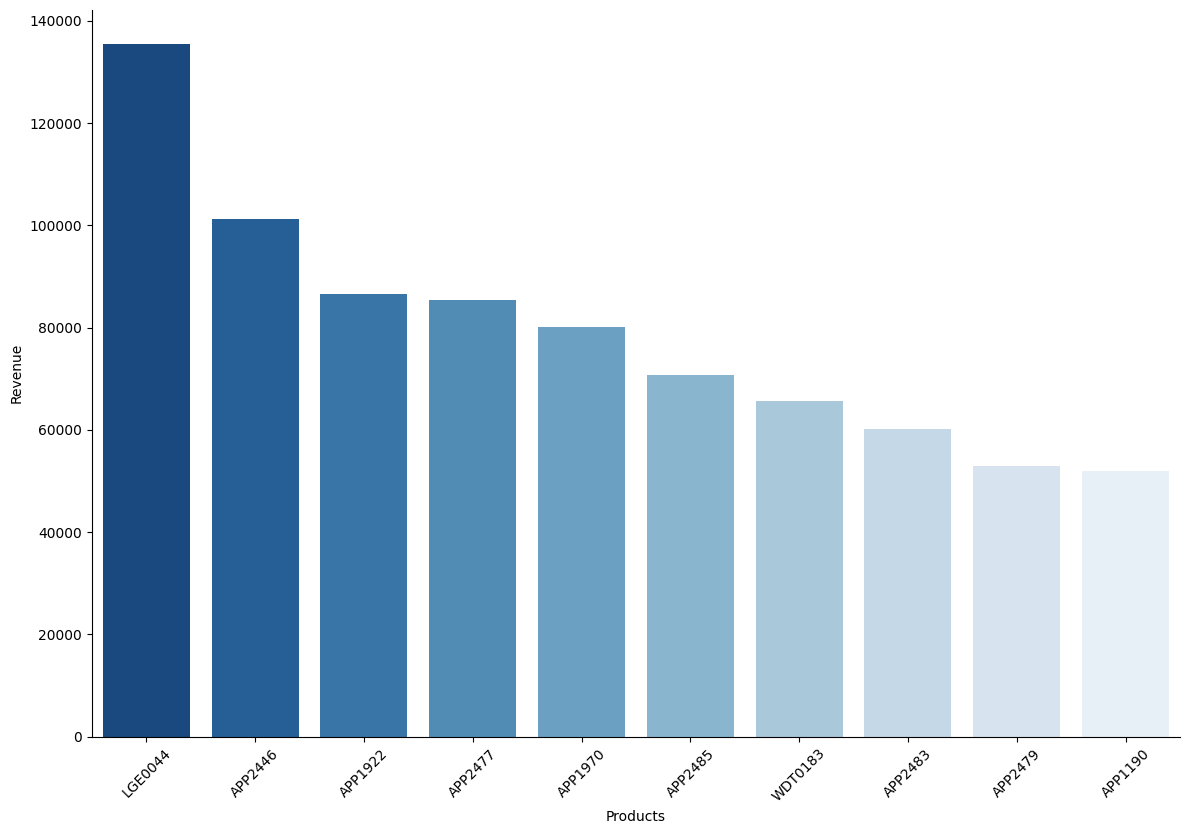

In [1220]:
top_25_percent_revenue_10=(
    ol_p_no_outliers_df_revenue
    .groupby('sku', as_index=False)
    .agg({'product_quantity': 'sum', 'revenue' : 'sum','Discount_%' : 'mean', 'Discount' : 'sum'})
    .sort_values(by="revenue", ascending=False)
    .nlargest(10, 'revenue')
    [['sku', 'product_quantity','revenue','Discount_%','Discount']]
)


sns.catplot(kind="bar",
            data=top_25_percent_revenue_10,
            x="sku",
            y="revenue",
            palette = 'Blues_r',
            height=8,
            aspect=1.5);

#sns.lineplot(data=filtered_nb_sku,
#             x="sku",
#             y="product_quantity",
#             marker='o',
#             label='Sold with discount')

#sns.lineplot(data=quantity_disc_fp,
#             x="sku",
#             y="product_quantity",
#             marker='o',
#             label='Sold normal price')

plt.xticks(rotation=45)
plt.xlabel("Products")
plt.ylabel("Revenue");



In [1221]:
top_25_percent_revenue.describe()

product_quantity   revenue  Discount_%  Discount  cumulative_revenue
count             30.00     30.00       30.00     30.00               30.00
mean             183.00  49862.69        9.34   4699.67           974542.34
std              193.97  26375.12        5.75   3988.59           398652.45
min               29.00  24212.56        2.27    911.00           135375.83
25%               67.00  28674.38        3.38   1540.00           697996.72
50%              108.00  44040.82       10.32   3344.50          1050893.94
75%              234.50  58312.86       13.46   6356.75          1309140.48
max              955.00 135375.83       22.16  15506.00          1495880.56

In [1222]:
top_25_percent_revenue.revenue.sum()

1495880.56

#PROPORTION OF DISCOUNT PRODUCT

In [1223]:
products_10_most_disc_17_18 = pd.concat([products_10_most_disc_17
                                               .assign(year=2017),
                                               products_10_most_disc_18
                                               .assign(year=2018)])


In [1224]:
products_most_disc = (
    ol_p_no_outliers_df
    .groupby('sku', as_index=False)
    .agg({'Discount_%': 'mean'})
)

products_most_disc['Discount_%'].count()

4594

In [1225]:
ol_p_no_outliers_df_revenue.revenue.sum()

6062258.159999999

In [1226]:
ol_p_no_outliers_df_revenue.revenue.sum()

6062258.159999999

In [1227]:
ol_p_no_outliers_df_revenue.groupby('sku').size()

sku
8MO0001-A     1
8MO0003-A     1
8MO0007       7
8MO0008      10
8MO0009       5
             ..
ZAG0038       1
ZAG0040       1
ZAG0041       1
ZAG0042       1
ZEP0007       1
Length: 4594, dtype: int64

In [1228]:
ol_p_no_outliers_df_revenue.nunique()

id                  49232
id_order            37766
product_id              1
product_quantity       27
sku                  4594
unit_price           3522
date                48892
name                 4578
desc                 3380
price                 843
promo_price          1677
in_stock                2
type                  103
short_brand           193
Discount              105
Discount_%            121
revenue              4569
dtype: int64

#Agressive Discounts

In [1229]:
ol_agr_disc = ol_p_no_outliers_df_revenue.query('`Discount_%` >= 40').sort_values('Discount_%', ascending = False)

In [1230]:
7168 / 37766 * 100

18.980034952073293

In [1231]:
ol_agr_disc

id  id_order  product_id  product_quantity        sku  unit_price  \
52617  1616752    512862           0                 2    MOP0109        2.00   
52798  1615984    512531           0                 2    MOP0107        3.99   
52805  1616180    512618           0                 2    MOP0107        3.99   
52876  1616465    512742           0                 2    MOP0108        3.99   
52878  1616569    512773           0                 2    MOP0108        3.99   
...        ...       ...         ...               ...        ...         ...   
17055  1605325    507937           0                 1    SAT0008       47.49   
17054  1605092    506488           0                 1    SAT0008       47.49   
17038  1532535    479659           0                 1    SAT0008       48.44   
17005  1182477    324958           0                 1    SAT0008       47.99   
53230  1648457    526512           0                 1  DLK0044-A       84.32   

                     date                                               name  \
52617 2018-02-16 12:47:23  Mophie Powerstation Mini Universal 4000mAh Bat...   
52798 2018-02-16 09:06:25  Mophie Powerstation 4000mAh Battery Plus Mini ...   
52805 2018-02-16 09:40:49  Mophie Powerstation 4000mAh Battery Plus Mini ...   
52876 2018-02-16 10:52:53  Mophie Powerstation Mini Universal 4000mAh Bat...   
52878 2018-02-16 11:25:43  Mophie Powerstation Mini Universal 4000mAh Bat...   
...                   ...                                                ...   
17055 2018-02-07 23:35:04  Satechi USB Hub Slim-C to USB-A / HDMI 4K / US...   
17054 2018-02-07 20:18:20  Satechi USB Hub Slim-C to USB-A / HDMI 4K / US...   
17038 2018-01-02 13:52:21  Satechi USB Hub Slim-C to USB-A / HDMI 4K / US...   
17005 2017-02-15 22:57:11  Satechi USB Hub Slim-C to USB-A / HDMI 4K / US...   
53230 2018-03-13 16:19:18  Open - D-Link DCS-5020L wireless surveillance ...   

                                                    desc  price promo_price  \
52617  external battery capacity 4000mAh output volta...  69.95     269.903   
52798  external battery capacity 4000mAh output volta...  69.95     269.903   
52805  external battery capacity 4000mAh output volta...  69.95     269.903   
52876  external battery capacity 4000mAh output volta...  69.95      79.896   
52878  external battery capacity 4000mAh output volta...  69.95      79.896   
...                                                  ...    ...         ...   
17055  Aluminum adapter with USB Type-C 4K HDMI port ...  79.99     499.899   
17054  Aluminum adapter with USB Type-C 4K HDMI port ...  79.99     499.899   
17038  Aluminum adapter with USB Type-C 4K HDMI port ...  79.99     499.899   
17005  Aluminum adapter with USB Type-C 4K HDMI port ...  79.99     499.899   
53230  Reconditioned surveillance camera with Wi-Fi r... 139.99     843.179   

       in_stock      type short_brand  Discount  Discount_%  revenue  
52617         0      1515         MOP     68.00       97.00     4.00  
52798         0      1515         MOP     66.00       94.00     7.98  
52805         0      1515         MOP     66.00       94.00     7.98  
52876         0      1515         MOP     66.00       94.00     7.98  
52878         0      1515         MOP     66.00       94.00     7.98  
...         ...       ...         ...       ...         ...      ...  
17055         1  12585395         SAT     32.00       40.00    47.49  
17054         1  12585395         SAT     32.00       40.00    47.49  
17038         1  12585395         SAT     32.00       40.00    48.44  
17005         1  12585395         SAT     32.00       40.00    47.99  
53230         0      9094         DLK     56.00       40.00    84.32  

[7168 rows x 17 columns]

In [1232]:
ol_agr_disc.describe()

id  id_order  product_id  product_quantity  unit_price   price  \
count    7168.00   7168.00     7168.00           7168.00     7168.00 7168.00   
mean  1370283.75 407720.06        0.00              1.15       21.65   48.68   
std    156381.29  67792.19        0.00              0.78       15.36   29.89   
min   1119448.00 245595.00        0.00              1.00        2.00    4.99   
25%   1245643.75 353010.25        0.00              1.00        9.99   25.00   
50%   1362677.00 403894.00        0.00              1.00       17.99   35.00   
75%   1511658.75 469583.00        0.00              1.00       29.99   69.90   
max   1649593.00 527112.00        0.00             35.00      101.97  169.99   

       in_stock  Discount  Discount_%  revenue  
count   7168.00   7168.00     7168.00  7168.00  
mean       0.55     27.05       55.41    24.16  
std        0.50     17.74       12.11    24.11  
min        0.00      2.00       40.00     2.49  
25%        0.00     15.00       45.00    11.12  
50%        1.00     20.00       54.00    19.98  
75%        1.00     37.00       61.00    29.99  
max        1.00     70.00       97.00  1049.65

In [1233]:
ol_agr_disc.revenue.sum()

173202.69

In [1234]:
(ol_agr_disc.price * ol_agr_disc.product_quantity).sum()

389879.32

In [1235]:
ol_agr_disc.price.sum()

348906.80000000005

In [1236]:
ol_agr_disc.Discount.sum()

193890.0

In [1237]:
ol_agr_disc.price.sum() - ol_agr_disc.Discount.sum()

155016.80000000005

In [1238]:
((ol_agr_disc.price.sum() - ol_agr_disc.revenue.sum()) / ol_agr_disc.Discount.sum()) * 100

90.62051163030587

In [1239]:
(ol_agr_disc.revenue.sum() / ((ol_agr_disc.price * ol_agr_disc.product_quantity).sum())) *100

44.424692748515106

In [1240]:
lost_agr_disc = ((ol_agr_disc.price * ol_agr_disc.product_quantity).sum()) - ol_agr_disc.revenue.sum()
lost_agr_disc

216676.63

In [1241]:
benef = ol_p_no_outliers_df_revenue.revenue.sum()
benef

6062258.159999999

In [1242]:
lost_agr_disc / benef *100

3.574190083650282

In [1243]:
lost_disc = ((ol_p_no_outliers_df_revenue.price * ol_p_no_outliers_df_revenue.product_quantity).sum()) - ol_p_no_outliers_df_revenue.revenue.sum()
lost_disc

1000839.2600000007

In [1244]:
lost_disc / benef * 100

16.50934740133206

In [1245]:
ol_small_disc = ol_p_no_outliers_df_revenue.query('`Discount_%` < = 40').sort_values('Discount_%', ascending = False)

In [1246]:
lost_small_disc = ((ol_small_disc.price * ol_small_disc.product_quantity).sum()) - ol_small_disc.revenue.sum()
lost_small_disc

799825.790000001

In [1247]:
lost_small_disc / benef * 100

13.193529026484102